In [1]:
import warnings
warnings.filterwarnings("ignore")

import requests
import numpy as np
import pandas as pd
import geopandas as gpd # GeoPandas library for spatial analytics
from shapely.geometry import shape

from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('../data/station_status_2022-06.csv')

In [3]:
df = df[df['station_status']=='active']
df = df.reset_index(drop=True)

In [4]:
time= []
for i in range(len(df)):
    time.append(datetime.fromtimestamp(df['last_reported'][i])) 
df['date_time'] = time

In [5]:
df=df.sort_values('date_time')
df.head()

,last_reported,num_docks_disabled,num_bikes_available,is_renting,station_status,station_id,is_returning,is_installed,num_bikes_disabled,num_ebikes_available,...,date,year,month,day,hour,minute,station_latitude,station_longitude,station_name,date_time
132,1654056002,0,13,1,active,3564,1,1,0,0,...,19144,2022,6,1,0,0,40.760185,-73.936273,21 St & 36 Ave,2022-06-01 00:00:02
101,1654056004,0,23,1,active,3285,1,1,2,2,...,19144,2022,6,1,0,0,40.788390,-73.974700,W 87 St & Amsterdam Ave,2022-06-01 00:00:04
173,1654056009,0,18,1,active,3822,1,1,1,3,...,19144,2022,6,1,0,0,40.700760,-73.936410,Bushwick Ave & Forrest St,2022-06-01 00:00:09
41,1654056009,1,42,1,active,426,1,1,35,1,...,19144,2022,6,1,0,0,40.717548,-74.013221,West St & Chambers St,2022-06-01 00:00:09
43,1654056010,0,40,1,active,439,1,1,2,0,...,19144,2022,6,1,0,0,40.726281,-73.989780,E 4 St & 2 Ave,2022-06-01 00:00:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082605,1656647993,0,36,1,active,4236,1,1,4,0,...,19173,2022,6,30,23,59,40.768333,-73.992573,W 54 St & 11 Ave,2022-06-30 23:59:53
4082606,1656647994,0,0,1,active,4591,1,1,29,0,...,19173,2022,6,30,23,59,40.702709,-73.992530,Dock St & Front St,2022-06-30 23:59:54
4082602,1656647995,0,7,1,active,3220,1,1,0,5,...,19173,2022,6,30,23,59,40.734961,-74.059503,5 Corners Library,2022-06-30 23:59:55
4082603,1656647995,0,18,1,active,3899,1,1,0,1,...,19173,2022,6,30,23,59,40.720840,-73.948440,Manhattan Av & Leonard St,2022-06-30 23:59:55


In [6]:
df_0601 = df[(df['date_time']>='2022-06-01') & (df['date_time']<'2022-06-03') & 
             (df['station_name'].str.contains('West Broadway'))]

In [7]:
df_0601.head(10)

,last_reported,num_docks_disabled,num_bikes_available,is_renting,station_status,station_id,is_returning,is_installed,num_bikes_disabled,num_ebikes_available,...,date,year,month,day,hour,minute,station_latitude,station_longitude,station_name,date_time
251,1654056188,0,14,1,active,4714,1,1,0,0,...,19144,2022,6,1,0,3,40.72323,-74.00314,West Broadway & Watts St,2022-06-01 00:03:08
952,1654056985,0,13,1,active,4714,1,1,0,0,...,19144,2022,6,1,0,16,40.72323,-74.00314,West Broadway & Watts St,2022-06-01 00:16:25
1994,1654058469,0,13,1,active,4714,1,1,0,0,...,19144,2022,6,1,0,41,40.72323,-74.00314,West Broadway & Watts St,2022-06-01 00:41:09
2186,1654058931,0,11,1,active,4714,1,1,0,0,...,19144,2022,6,1,0,48,40.72323,-74.00314,West Broadway & Watts St,2022-06-01 00:48:51
2386,1654059083,0,10,1,active,4714,1,1,0,0,...,19144,2022,6,1,0,51,40.72323,-74.00314,West Broadway & Watts St,2022-06-01 00:51:23
4852,1654063556,0,9,1,active,4714,1,1,0,0,...,19144,2022,6,1,2,5,40.72323,-74.00314,West Broadway & Watts St,2022-06-01 02:05:56
8852,1654073369,0,9,1,active,4714,1,1,0,0,...,19144,2022,6,1,4,49,40.72323,-74.00314,West Broadway & Watts St,2022-06-01 04:49:29
9227,1654074170,0,10,1,active,4714,1,1,0,1,...,19144,2022,6,1,5,2,40.72323,-74.00314,West Broadway & Watts St,2022-06-01 05:02:50
11398,1654077728,0,11,1,active,4714,1,1,0,2,...,19144,2022,6,1,6,2,40.72323,-74.00314,West Broadway & Watts St,2022-06-01 06:02:08
11639,1654077999,0,10,1,active,4714,1,1,0,1,...,19144,2022,6,1,6,6,40.72323,-74.00314,West Broadway & Watts St,2022-06-01 06:06:39


<AxesSubplot:xlabel='date_time'>

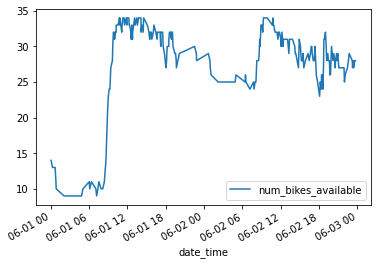

In [8]:
df_0601[['num_bikes_available','date_time']].plot(x='date_time',y='num_bikes_available')

# station that valet serves

#Manhattan#

1 Ave & E 68 St (Weill Cornell Medicine, Memorial Sloan Kettering Cancer Center)
Monday - Friday: 7:00AM - 11:00AM, 4:00PM - 8:00PM

E 59 St & Madison Ave
Monday - Friday: 7:00AM - 11:00AM, 4:00PM - 8:00PM

E 47 St & Park Ave
Monday - Friday: 7:00AM - 11:00AM, 4:00PM - 8:00PM

W 51 St & Rockefeller Plaza
Monday - Friday: 7:00AM - 11:00AM, 4:00PM - 8:00PM

1 Ave & E 30 St
Monday - Friday: 7:00AM - 11:00AM, 4:00PM - 8:00PM

Fulton St & Broadway
Monday - Friday: 7:00AM - 11:00AM, 4:00PM - 8:00PM

8 Ave & W 31 St
Monday - Friday: 7:00AM - 11:00AM, 4:00PM - 8:00PM

Old Slip & South St
Monday - Friday: 7:00AM - 11:00AM, 4:00PM - 8:00PM

N Moore St & Greenwich St
Monday - Friday: 6:00AM - 10:00AM, 4:00PM - 8:00PM

#Brooklyn#

Dock 72 Way & Market St
Monday - Friday: 7:00AM - 11:00AM, 4:00PM - 8:00PM

<AxesSubplot:xlabel='date_time'>

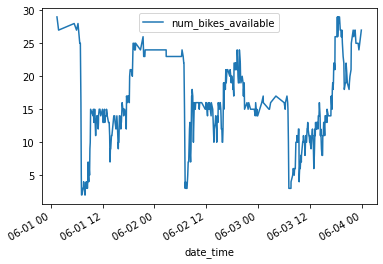

In [9]:
df_06 = df[(df['date_time']>='2022-06-01') & (df['date_time']<'2022-06-04') & 
             (df['station_name'].str.contains('Fulton St & Broadway'))]
df_06[['num_bikes_available','date_time']].plot(x='date_time',y='num_bikes_available')

<AxesSubplot:xlabel='date_time'>

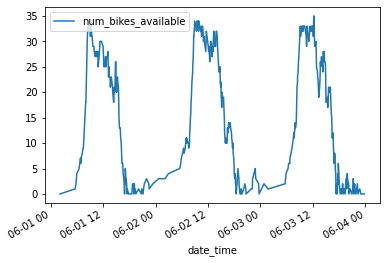

In [10]:
df_06 = df[(df['date_time']>='2022-06-01') & (df['date_time']<'2022-06-04') & 
             (df['station_name'].str.contains('E 59 St & Madison Ave'))]
df_06[['num_bikes_available','date_time']].plot(x='date_time',y='num_bikes_available')

<AxesSubplot:xlabel='date_time'>

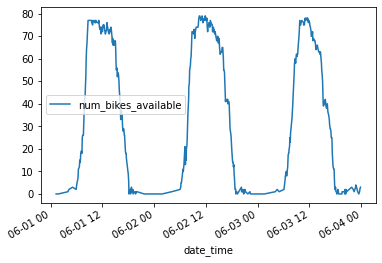

In [11]:
df_06 = df[(df['date_time']>='2022-06-01') & (df['date_time']<'2022-06-04') & 
             (df['station_name'].str.contains('E 47 St & Park Ave'))]
df_06[['num_bikes_available','date_time']].plot(x='date_time',y='num_bikes_available')

# station that are not served by valet

## Greenpoint

<AxesSubplot:xlabel='date_time'>

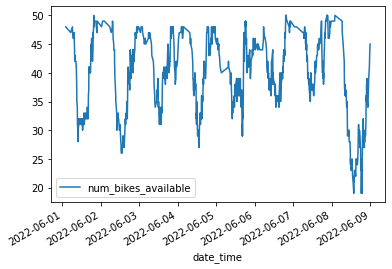

In [12]:
# Biggest capacity station in the residential neighborhood. maybe the most people's destination
# off work peak hour
df_06 = df[(df['date_time']>='2022-06-01') & (df['date_time']<'2022-06-09') & 
             (df['station_name'].str.contains('Nassau Ave & Russell St'))]
df_06[['num_bikes_available','date_time']].plot(x='date_time',y='num_bikes_available')

<AxesSubplot:xlabel='date_time'>

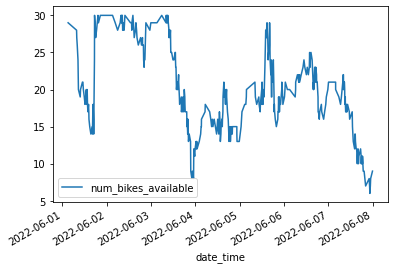

In [13]:
# Commercial Area 
df_06 = df[(df['date_time']>='2022-06-01') & (df['date_time']<'2022-06-08') & 
             (df['station_name'].str.contains('Morgan Ave & Lombardy St'))]
df_06[['num_bikes_available','date_time']].plot(x='date_time',y='num_bikes_available')

## Isolated Region above greenpoint

<AxesSubplot:xlabel='date_time'>

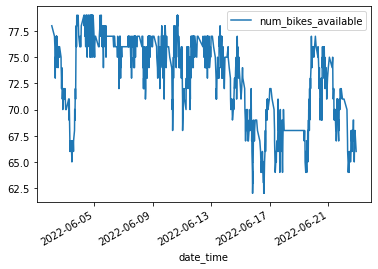

In [14]:
# LIC bar area near the river. Big Usage on the weekend
df_06 = df[(df['date_time']>='2022-06-02') & (df['date_time']<'2022-06-23') & 
             (df['station_name'].str.contains('48 Ave & 5 St'))]
df_06[['num_bikes_available','date_time']].plot(x='date_time',y='num_bikes_available')

# Manhattan

<AxesSubplot:xlabel='date_time'>

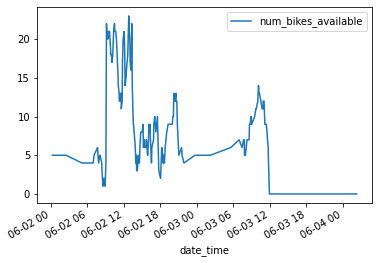

In [15]:
# close to the Met
df_06 = df[(df['date_time']>='2022-06-02') & (df['date_time']<'2022-06-05') & 
             (df['station_name'].str.contains('5 Ave & E 78 St'))]
df_06[['num_bikes_available','date_time']].plot(x='date_time',y='num_bikes_available')

<AxesSubplot:xlabel='date_time'>

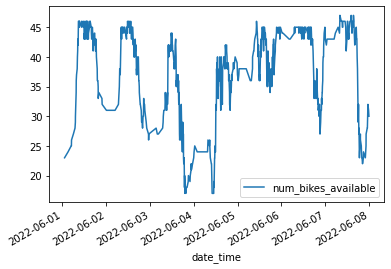

In [16]:
# close to Wall Street
# working office area

df_06 = df[(df['date_time']>='2022-06-01') & (df['date_time']<'2022-06-8') & 
             (df['station_name'].str.contains('Broadway & Morris St'))]
df_06[['num_bikes_available','date_time']].plot(x='date_time',y='num_bikes_available')


<AxesSubplot:xlabel='date_time'>

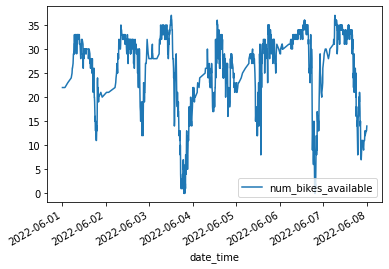

In [17]:
# close to wtc and terminal
# commute?

df_06 = df[(df['date_time']>='2022-06-01') & (df['date_time']<'2022-06-8') & 
             (df['station_name'].str.contains('Vesey Pl & River Terrace'))]
df_06[['num_bikes_available','date_time']].plot(x='date_time',y='num_bikes_available')

Station

In [18]:
station = df['station_id'].drop_duplicates()
station = station.reset_index(drop=True)
station

0       3564
1       3285
2       3822
3        426
4        439
        ... 
1628    4763
1629    4873
1630    4765
1631    4768
1632    4766
Name: station_id, Length: 1633, dtype: int64

In [19]:
pd.set_option('display.max_columns', None)

# Set Weekday

In [28]:
df['weekday'] = df['date_time'].dt.dayofweek
df_weekday = df[(df['weekday']!=5)&(df['weekday']!=6)]
df_weekday['weekday'].unique()

array([2, 3, 4, 0, 1])

In [29]:
df_weekday.head()

,last_reported,num_docks_disabled,num_bikes_available,is_renting,station_status,station_id,is_returning,is_installed,num_bikes_disabled,num_ebikes_available,num_docks_available,date,year,month,day,hour,minute,station_latitude,station_longitude,station_name,date_time,weekday,isPeak,isLowPeak
132,1654056002,0,13,1,active,3564,1,1,0,0,6,19144,2022,6,1,0,0,40.760185,-73.936273,21 St & 36 Ave,2022-06-01 00:00:02,2,NaN,NaN
101,1654056004,0,23,1,active,3285,1,1,2,2,18,19144,2022,6,1,0,0,40.788390,-73.974700,W 87 St & Amsterdam Ave,2022-06-01 00:00:04,2,NaN,NaN
173,1654056009,0,18,1,active,3822,1,1,1,3,1,19144,2022,6,1,0,0,40.700760,-73.936410,Bushwick Ave & Forrest St,2022-06-01 00:00:09,2,NaN,NaN
41,1654056009,1,42,1,active,426,1,1,35,1,3,19144,2022,6,1,0,0,40.717548,-74.013221,West St & Chambers St,2022-06-01 00:00:09,2,NaN,NaN
43,1654056010,0,40,1,active,439,1,1,2,0,1,19144,2022,6,1,0,0,40.726281,-73.989780,E 4 St & 2 Ave,2022-06-01 00:00:10,2,NaN,NaN


# find peak

In [23]:
from scipy.signal import find_peaks
import plotly.graph_objects as go

In [27]:
#finding high and lower peak

peak_list=[]
peak_index=[]

for _, i in enumerate(station): 
#     print(i)
    df_each = df[df['station_id']==i]
    df_each = df_each.reset_index()
    bike = df_each['num_bikes_available']
    q75 = df_each['num_bikes_available'].quantile(q=0.75)
    peaks,_ = find_peaks(bike, height=q75)
    peak_rows = df_each.iloc[peaks]
    
    
    q75_dock = df_each['num_docks_available'].quantile(q=0.75)
    dock = df_each['num_docks_available']
    lower_peaks,_ = find_peaks(dock, height=q75_dock)
    lower_peak_rows = df_each.iloc[lower_peaks]
    
    df.loc[list(peak_rows['index']),'isPeak'] = 1
    df.loc[list(lower_peak_rows['index']),'isLowPeak'] = 1

3564
3285
3822
426
439
3697
3126
472
3396
3207
3699
4131
4483
3286
3167
3909
236
3619
3874
4617
386
515
373
3745
358
4085
3443
4023
3314
4505
4063
4658
3924
251
4651
4348
3069
3674
3288
4424
4238
4513
4738
460
4440
4438
4737
4726
3635
4733
4703
239
397
3779
119
4321
3690
2008
3534
323
390
4045
3391
3574
3580
212
3348
4347
3088
4075
3116
453
4351
4229
4559
471
457
3813
3063
4712
3823
3896
3929
4011
3493
3945
3555
469
3213
3044
507
3424
3895
3360
3082
3154
3792
3739
360
3973
512
4629
4373
3905
326
3351
4591
401
4660
275
3246
505
3916
4027
3569
3769
3885
3378
3712
3123
4701
3134
312
3881
361
270
3357
545
3047
364
4195
532
3767
3755
511
4393
2002
391
410
4297
420
311
3440
4482
504
4261
3721
120
321
3746
3170
3350
3142
4341
4472
3165
3888
3121
4714
4215
3785
3543
307
4194
4611
3777
4104
3727
3255
3618
3383
252
464
3942
3691
4262
4478
4696
3494
4118
3921
3147
4715
3538
341
3584
3175
3081
3520
432
316
477
3789
3087
380
3429
3787
496
474
3232
3151
4700
259
3749
285
3726
3581
4337
3437
244
509


In [30]:
#assgin the empty column zero
df.loc[pd.isna(df['isPeak']),'isPeak']=0
df.loc[pd.isna(df['isLowPeak']),'isLowPeak']=0

## Test the peak finding result with station 3285

In [38]:
df[(df['station_id']==3285)&(df['isLowPeak']==1)].head(5)

,last_reported,num_docks_disabled,num_bikes_available,is_renting,station_status,station_id,is_returning,is_installed,num_bikes_disabled,num_ebikes_available,num_docks_available,date,year,month,day,hour,minute,station_latitude,station_longitude,station_name,date_time,weekday,isPeak,isLowPeak
24834,1654086220,0,1,1,active,3285,1,1,2,0,40,19144,2022,6,1,8,23,40.78839,-73.9747,W 87 St & Amsterdam Ave,2022-06-01 08:23:40,2,0.0,1.0
30779,1654088854,0,0,1,active,3285,1,1,1,0,42,19144,2022,6,1,9,7,40.78839,-73.9747,W 87 St & Amsterdam Ave,2022-06-01 09:07:34,2,0.0,1.0
33095,1654090068,0,0,1,active,3285,1,1,1,0,42,19144,2022,6,1,9,27,40.78839,-73.9747,W 87 St & Amsterdam Ave,2022-06-01 09:27:48,2,0.0,1.0
43168,1654095913,0,0,1,active,3285,1,1,1,0,42,19144,2022,6,1,11,5,40.78839,-73.9747,W 87 St & Amsterdam Ave,2022-06-01 11:05:13,2,0.0,1.0
46115,1654097795,0,0,1,active,3285,1,1,1,0,42,19144,2022,6,1,11,36,40.78839,-73.9747,W 87 St & Amsterdam Ave,2022-06-01 11:36:35,2,0.0,1.0


In [37]:
df[(df['station_id']==3285)&(df['isPeak']==0)].head(5)

,last_reported,num_docks_disabled,num_bikes_available,is_renting,station_status,station_id,is_returning,is_installed,num_bikes_disabled,num_ebikes_available,num_docks_available,date,year,month,day,hour,minute,station_latitude,station_longitude,station_name,date_time,weekday,isPeak,isLowPeak
101,1654056004,0,23,1,active,3285,1,1,2,2,18,19144,2022,6,1,0,0,40.78839,-73.9747,W 87 St & Amsterdam Ave,2022-06-01 00:00:04,2,0.0,0.0
1470,1654057827,0,23,1,active,3285,1,1,2,1,18,19144,2022,6,1,0,30,40.78839,-73.9747,W 87 St & Amsterdam Ave,2022-06-01 00:30:27,2,0.0,0.0
2279,1654059132,0,21,1,active,3285,1,1,2,0,20,19144,2022,6,1,0,52,40.78839,-73.9747,W 87 St & Amsterdam Ave,2022-06-01 00:52:12,2,0.0,0.0
3906,1654061997,0,21,1,active,3285,1,1,2,0,20,19144,2022,6,1,1,39,40.78839,-73.9747,W 87 St & Amsterdam Ave,2022-06-01 01:39:57,2,0.0,0.0
5292,1654064860,0,23,1,active,3285,1,1,2,2,18,19144,2022,6,1,2,27,40.78839,-73.9747,W 87 St & Amsterdam Ave,2022-06-01 02:27:40,2,0.0,0.0


<AxesSubplot:xlabel='date_time', ylabel='num_bikes_available'>

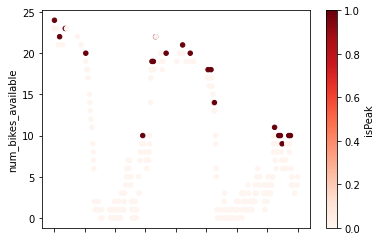

In [39]:
df[(df['station_id']==3285)&(df['date_time']<='2022-06-03')].plot.scatter(
    x='date_time',y='num_bikes_available', c='isPeak',cmap='Reds')

<AxesSubplot:xlabel='date_time', ylabel='num_bikes_available'>

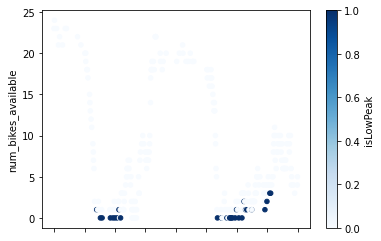

In [40]:
df[(df['station_id']==3285)&(df['date_time']<='2022-06-03')].plot.scatter(
    x='date_time',y='num_bikes_available', c='isLowPeak',cmap='Blues')

# Make 15 min interval Dataset

# 15 min interval

In [41]:
#turn the timestamp into 15 min interval 
df['timein 15 Interval'] = df['date_time'].dt.floor("15min")
df.head()

,last_reported,num_docks_disabled,num_bikes_available,is_renting,station_status,station_id,is_returning,is_installed,num_bikes_disabled,num_ebikes_available,num_docks_available,date,year,month,day,hour,minute,station_latitude,station_longitude,station_name,date_time,weekday,isPeak,isLowPeak,timein 15 Interval
132,1654056002,0,13,1,active,3564,1,1,0,0,6,19144,2022,6,1,0,0,40.760185,-73.936273,21 St & 36 Ave,2022-06-01 00:00:02,2,0.0,0.0,2022-06-01
101,1654056004,0,23,1,active,3285,1,1,2,2,18,19144,2022,6,1,0,0,40.788390,-73.974700,W 87 St & Amsterdam Ave,2022-06-01 00:00:04,2,0.0,0.0,2022-06-01
173,1654056009,0,18,1,active,3822,1,1,1,3,1,19144,2022,6,1,0,0,40.700760,-73.936410,Bushwick Ave & Forrest St,2022-06-01 00:00:09,2,0.0,0.0,2022-06-01
41,1654056009,1,42,1,active,426,1,1,35,1,3,19144,2022,6,1,0,0,40.717548,-74.013221,West St & Chambers St,2022-06-01 00:00:09,2,0.0,0.0,2022-06-01
43,1654056010,0,40,1,active,439,1,1,2,0,1,19144,2022,6,1,0,0,40.726281,-73.989780,E 4 St & 2 Ave,2022-06-01 00:00:10,2,0.0,0.0,2022-06-01


In [42]:
#checking 15 min interval column is created succesfully
df[df['station_id']==3564].head()

,last_reported,num_docks_disabled,num_bikes_available,is_renting,station_status,station_id,is_returning,is_installed,num_bikes_disabled,num_ebikes_available,num_docks_available,date,year,month,day,hour,minute,station_latitude,station_longitude,station_name,date_time,weekday,isPeak,isLowPeak,timein 15 Interval
132,1654056002,0,13,1,active,3564,1,1,0,0,6,19144,2022,6,1,0,0,40.760185,-73.936273,21 St & 36 Ave,2022-06-01 00:00:02,2,0.0,0.0,2022-06-01 00:00:00
1699,1654058091,0,14,1,active,3564,1,1,0,1,5,19144,2022,6,1,0,34,40.760185,-73.936273,21 St & 36 Ave,2022-06-01 00:34:51,2,0.0,0.0,2022-06-01 00:30:00
5902,1654066078,0,14,1,active,3564,1,1,0,1,5,19144,2022,6,1,2,47,40.760185,-73.936273,21 St & 36 Ave,2022-06-01 02:47:58,2,0.0,0.0,2022-06-01 02:45:00
9069,1654073975,0,15,1,active,3564,1,1,0,2,4,19144,2022,6,1,4,59,40.760185,-73.936273,21 St & 36 Ave,2022-06-01 04:59:35,2,1.0,0.0,2022-06-01 04:45:00
11784,1654078255,0,14,1,active,3564,1,1,0,1,5,19144,2022,6,1,6,10,40.760185,-73.936273,21 St & 36 Ave,2022-06-01 06:10:55,2,0.0,0.0,2022-06-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043305,1656628191,0,3,1,active,3564,1,1,0,0,16,19173,2022,6,30,18,29,40.760185,-73.936273,21 St & 36 Ave,2022-06-30 18:29:51,3,0.0,0.0,2022-06-30 18:15:00
4075434,1656643007,0,4,1,active,3564,1,1,0,1,15,19173,2022,6,30,22,36,40.760185,-73.936273,21 St & 36 Ave,2022-06-30 22:36:47,3,0.0,0.0,2022-06-30 22:30:00
4076444,1656643572,0,3,1,active,3564,1,1,0,0,16,19173,2022,6,30,22,46,40.760185,-73.936273,21 St & 36 Ave,2022-06-30 22:46:12,3,0.0,1.0,2022-06-30 22:45:00
4078770,1656645221,0,4,1,active,3564,1,1,0,1,15,19173,2022,6,30,23,13,40.760185,-73.936273,21 St & 36 Ave,2022-06-30 23:13:41,3,0.0,0.0,2022-06-30 23:00:00


In [43]:
## Create the bike net changes in 15 min time interval by each station

net_list=[]

for i in station:
    df_each = df[df['station_id']==i]
#     print(i)
    df_each = df_each.sort_values(by=['date_time'])
    time_interval = df_each['timein 15 Interval'].unique()
    for j in time_interval:
        df_j = df_each[df_each['timein 15 Interval']==j]
        net = df_j['num_bikes_available'].iloc[-1]-df_j['num_bikes_available'].iloc[0]
#         print(net)
        Temp_list = {
        "station_id": list(set(df_each['station_id'])),
        "num_bikes_available":df_j['num_bikes_available'].iloc[-1],    
        "num_docks_available":df_j['num_docks_available'].iloc[-1],    
        "net": net,
        "timein 15 Interval": j,
        }
        net_list.append(Temp_list)

3564
3285
3822
426
439
3697
3126
472
3396
3207
3699
4131
4483
3286
3167
3909
236
3619
3874
4617
386
515
373
3745
358
4085
3443
4023
3314
4505
4063
4658
3924
251
4651
4348
3069
3674
3288
4424
4238
4513
4738
460
4440
4438
4737
4726
3635
4733
4703
239
397
3779
119
4321
3690
2008
3534
323
390
4045
3391
3574
3580
212
3348
4347
3088
4075
3116
453
4351
4229
4559
471
457
3813
3063
4712
3823
3896
3929
4011
3493
3945
3555
469
3213
3044
507
3424
3895
3360
3082
3154
3792
3739
360
3973
512
4629
4373
3905
326
3351
4591
401
4660
275
3246
505
3916
4027
3569
3769
3885
3378
3712
3123
4701
3134
312
3881
361
270
3357
545
3047
364
4195
532
3767
3755
511
4393
2002
391
410
4297
420
311
3440
4482
504
4261
3721
120
321
3746
3170
3350
3142
4341
4472
3165
3888
3121
4714
4215
3785
3543
307
4194
4611
3777
4104
3727
3255
3618
3383
252
464
3942
3691
4262
4478
4696
3494
4118
3921
3147
4715
3538
341
3584
3175
3081
3520
432
316
477
3789
3087
380
3429
3787
496
474
3232
3151
4700
259
3749
285
3726
3581
4337
3437
244
509


KeyboardInterrupt: 

In [46]:
net_list = net_list.drop(columns=['Unnamed: 0'])

In [48]:
net_list = net_list.reset_index(drop=True)
net_list.head()

,station_id,num_bikes_available,num_docks_available,net,timein 15 Interval
0,[3564],13,6,0,2022-06-01 00:00:00
1,[3564],14,5,0,2022-06-01 00:30:00
2,[3564],14,5,0,2022-06-01 02:45:00
3,[3564],15,4,0,2022-06-01 04:45:00
4,[3564],14,5,0,2022-06-01 06:00:00


In [ ]:
# net_list.tail(50)

In [ ]:
#Export dataset to csv
# net_list.to_csv('../data/15min_interval_station_2022-06.csv')  

In [49]:
Station_id_list = net_list['station_id'].unique()
Station_id_list

array(['[3564]', '[3285]', '[3822]', ..., '[4765]', '[4768]', '[4766]'],
      dtype=object)

In [50]:
#Station id: turn the list format to string
Station_id_list = net_list['station_id']

for i in range(2247148):
    net_list['station_id'][i] = Station_id_list[i][1:-1]

    print(net_list['station_id'][i],i)


3564 0
3564 1
3564 2
3564 3
3564 4
3564 5
3564 6
3564 7
3564 8
3564 9
3564 10
3564 11
3564 12
3564 13
3564 14
3564 15
3564 16
3564 17
3564 18
3564 19
3564 20
3564 21
3564 22
3564 23
3564 24
3564 25
3564 26
3564 27
3564 28
3564 29
3564 30
3564 31
3564 32
3564 33
3564 34
3564 35
3564 36
3564 37
3564 38
3564 39
3564 40
3564 41
3564 42
3564 43
3564 44
3564 45
3564 46
3564 47
3564 48
3564 49
3564 50
3564 51
3564 52
3564 53
3564 54
3564 55
3564 56
3564 57
3564 58
3564 59
3564 60
3564 61
3564 62
3564 63
3564 64
3564 65
3564 66
3564 67
3564 68
3564 69
3564 70
3564 71
3564 72
3564 73
3564 74
3564 75
3564 76
3564 77
3564 78
3564 79
3564 80
3564 81
3564 82
3564 83
3564 84
3564 85
3564 86
3564 87
3564 88
3564 89
3564 90
3564 91
3564 92
3564 93
3564 94
3564 95
3564 96
3564 97
3564 98
3564 99
3564 100
3564 101
3564 102
3564 103
3564 104
3564 105
3564 106
3564 107
3564 108
3564 109
3564 110
3564 111
3564 112
3564 113
3564 114
3564 115
3564 116
3564 117
3564 118
3564 119
3564 120
3564 121
3564 122
356

3285 949
3285 950
3285 951
3285 952
3285 953
3285 954
3285 955
3285 956
3285 957
3285 958
3285 959
3285 960
3285 961
3285 962
3285 963
3285 964
3285 965
3285 966
3285 967
3285 968
3285 969
3285 970
3285 971
3285 972
3285 973
3285 974
3285 975
3285 976
3285 977
3285 978
3285 979
3285 980
3285 981
3285 982
3285 983
3285 984
3285 985
3285 986
3285 987
3285 988
3285 989
3285 990
3285 991
3285 992
3285 993
3285 994
3285 995
3285 996
3285 997
3285 998
3285 999
3285 1000
3285 1001
3285 1002
3285 1003
3285 1004
3285 1005
3285 1006
3285 1007
3285 1008
3285 1009
3285 1010
3285 1011
3285 1012
3285 1013
3285 1014
3285 1015
3285 1016
3285 1017
3285 1018
3285 1019
3285 1020
3285 1021
3285 1022
3285 1023
3285 1024
3285 1025
3285 1026
3285 1027
3285 1028
3285 1029
3285 1030
3285 1031
3285 1032
3285 1033
3285 1034
3285 1035
3285 1036
3285 1037
3285 1038
3285 1039
3285 1040
3285 1041
3285 1042
3285 1043
3285 1044
3285 1045
3285 1046
3285 1047
3285 1048
3285 1049
3285 1050
3285 1051
3285 1052
3285 1053
3

3285 1781
3285 1782
3285 1783
3285 1784
3285 1785
3285 1786
3285 1787
3285 1788
3285 1789
3285 1790
3285 1791
3285 1792
3285 1793
3285 1794
3285 1795
3285 1796
3285 1797
3285 1798
3285 1799
3285 1800
3285 1801
3285 1802
3285 1803
3285 1804
3285 1805
3285 1806
3285 1807
3285 1808
3285 1809
3285 1810
3285 1811
3285 1812
3285 1813
3285 1814
3285 1815
3285 1816
3285 1817
3285 1818
3285 1819
3285 1820
3285 1821
3285 1822
3285 1823
3285 1824
3285 1825
3285 1826
3285 1827
3285 1828
3285 1829
3285 1830
3285 1831
3285 1832
3285 1833
3285 1834
3285 1835
3285 1836
3285 1837
3285 1838
3285 1839
3285 1840
3285 1841
3285 1842
3285 1843
3285 1844
3285 1845
3285 1846
3285 1847
3285 1848
3285 1849
3285 1850
3285 1851
3285 1852
3285 1853
3285 1854
3285 1855
3285 1856
3285 1857
3285 1858
3285 1859
3285 1860
3285 1861
3285 1862
3285 1863
3285 1864
3285 1865
3285 1866
3285 1867
3285 1868
3285 1869
3285 1870
3285 1871
3285 1872
3285 1873
3285 1874
3285 1875
3285 1876
3285 1877
3285 1878
3285 1879
3285 1880


3285 2625
3285 2626
3285 2627
3285 2628
3285 2629
3285 2630
3285 2631
3285 2632
3285 2633
3285 2634
3285 2635
3285 2636
3285 2637
3285 2638
3285 2639
3285 2640
3285 2641
3285 2642
3285 2643
3285 2644
3285 2645
3285 2646
3285 2647
3285 2648
3285 2649
3285 2650
3285 2651
3285 2652
3285 2653
3285 2654
3285 2655
3285 2656
3285 2657
3285 2658
3285 2659
3285 2660
3285 2661
3285 2662
3285 2663
3285 2664
3285 2665
3285 2666
3285 2667
3285 2668
3285 2669
3285 2670
3285 2671
3285 2672
3285 2673
3285 2674
3285 2675
3285 2676
3285 2677
3285 2678
3285 2679
3285 2680
3285 2681
3285 2682
3285 2683
3285 2684
3285 2685
3285 2686
3285 2687
3285 2688
3285 2689
3285 2690
3285 2691
3285 2692
3285 2693
3285 2694
3285 2695
3285 2696
3285 2697
3285 2698
3285 2699
3285 2700
3285 2701
3285 2702
3285 2703
3285 2704
3285 2705
3285 2706
3285 2707
3285 2708
3285 2709
3285 2710
3285 2711
3285 2712
3285 2713
3285 2714
3285 2715
3285 2716
3285 2717
3285 2718
3285 2719
3285 2720
3285 2721
3285 2722
3285 2723
3285 2724


3822 3458
3822 3459
3822 3460
3822 3461
3822 3462
3822 3463
3822 3464
3822 3465
3822 3466
3822 3467
3822 3468
3822 3469
3822 3470
3822 3471
3822 3472
3822 3473
3822 3474
3822 3475
3822 3476
3822 3477
3822 3478
3822 3479
3822 3480
3822 3481
3822 3482
3822 3483
3822 3484
3822 3485
3822 3486
3822 3487
3822 3488
3822 3489
3822 3490
3822 3491
3822 3492
3822 3493
3822 3494
3822 3495
3822 3496
3822 3497
3822 3498
3822 3499
3822 3500
3822 3501
3822 3502
3822 3503
3822 3504
3822 3505
3822 3506
3822 3507
3822 3508
3822 3509
3822 3510
3822 3511
3822 3512
3822 3513
3822 3514
3822 3515
3822 3516
3822 3517
3822 3518
3822 3519
3822 3520
3822 3521
3822 3522
3822 3523
3822 3524
3822 3525
3822 3526
3822 3527
3822 3528
3822 3529
3822 3530
3822 3531
3822 3532
3822 3533
3822 3534
3822 3535
3822 3536
3822 3537
3822 3538
3822 3539
3822 3540
3822 3541
3822 3542
3822 3543
3822 3544
3822 3545
3822 3546
3822 3547
3822 3548
3822 3549
3822 3550
3822 3551
3822 3552
3822 3553
3822 3554
3822 3555
3822 3556
3822 3557


426 4290
426 4291
426 4292
426 4293
426 4294
426 4295
426 4296
426 4297
426 4298
426 4299
426 4300
426 4301
426 4302
426 4303
426 4304
426 4305
426 4306
426 4307
426 4308
426 4309
426 4310
426 4311
426 4312
426 4313
426 4314
426 4315
426 4316
426 4317
426 4318
426 4319
426 4320
426 4321
426 4322
426 4323
426 4324
426 4325
426 4326
426 4327
426 4328
426 4329
426 4330
426 4331
426 4332
426 4333
426 4334
426 4335
426 4336
426 4337
426 4338
426 4339
426 4340
426 4341
426 4342
426 4343
426 4344
426 4345
426 4346
426 4347
426 4348
426 4349
426 4350
426 4351
426 4352
426 4353
426 4354
426 4355
426 4356
426 4357
426 4358
426 4359
426 4360
426 4361
426 4362
426 4363
426 4364
426 4365
426 4366
426 4367
426 4368
426 4369
426 4370
426 4371
426 4372
426 4373
426 4374
426 4375
426 4376
426 4377
426 4378
426 4379
426 4380
426 4381
426 4382
426 4383
426 4384
426 4385
426 4386
426 4387
426 4388
426 4389
426 4390
426 4391
426 4392
426 4393
426 4394
426 4395
426 4396
426 4397
426 4398
426 4399
426 4400
4

426 5207
426 5208
426 5209
426 5210
426 5211
426 5212
426 5213
426 5214
426 5215
426 5216
426 5217
426 5218
426 5219
426 5220
426 5221
426 5222
426 5223
426 5224
426 5225
426 5226
426 5227
426 5228
426 5229
426 5230
426 5231
426 5232
426 5233
426 5234
426 5235
426 5236
426 5237
426 5238
426 5239
426 5240
426 5241
426 5242
426 5243
426 5244
426 5245
426 5246
426 5247
426 5248
426 5249
426 5250
426 5251
426 5252
426 5253
426 5254
426 5255
426 5256
426 5257
426 5258
426 5259
426 5260
426 5261
426 5262
426 5263
426 5264
426 5265
426 5266
426 5267
426 5268
426 5269
426 5270
426 5271
426 5272
426 5273
426 5274
426 5275
426 5276
426 5277
426 5278
426 5279
426 5280
426 5281
426 5282
426 5283
426 5284
426 5285
426 5286
426 5287
426 5288
426 5289
426 5290
426 5291
426 5292
426 5293
426 5294
426 5295
426 5296
426 5297
426 5298
426 5299
426 5300
426 5301
426 5302
426 5303
426 5304
426 5305
426 5306
426 5307
426 5308
426 5309
426 5310
426 5311
426 5312
426 5313
426 5314
426 5315
426 5316
426 5317
4

426 6131
426 6132
426 6133
426 6134
426 6135
426 6136
426 6137
426 6138
426 6139
426 6140
426 6141
426 6142
426 6143
426 6144
426 6145
426 6146
426 6147
426 6148
426 6149
426 6150
426 6151
426 6152
426 6153
426 6154
426 6155
426 6156
426 6157
426 6158
426 6159
426 6160
426 6161
426 6162
426 6163
426 6164
426 6165
426 6166
426 6167
426 6168
426 6169
426 6170
426 6171
426 6172
426 6173
426 6174
426 6175
426 6176
426 6177
426 6178
426 6179
426 6180
426 6181
426 6182
426 6183
426 6184
426 6185
426 6186
426 6187
426 6188
426 6189
426 6190
426 6191
426 6192
426 6193
426 6194
426 6195
426 6196
426 6197
426 6198
426 6199
426 6200
426 6201
426 6202
426 6203
426 6204
426 6205
426 6206
426 6207
426 6208
426 6209
426 6210
426 6211
426 6212
426 6213
426 6214
426 6215
426 6216
426 6217
426 6218
426 6219
426 6220
426 6221
426 6222
426 6223
426 6224
426 6225
426 6226
426 6227
426 6228
426 6229
426 6230
426 6231
426 6232
426 6233
426 6234
426 6235
426 6236
426 6237
426 6238
426 6239
426 6240
426 6241
4

439 7048
439 7049
439 7050
439 7051
439 7052
439 7053
439 7054
439 7055
439 7056
439 7057
439 7058
439 7059
439 7060
439 7061
439 7062
439 7063
439 7064
439 7065
439 7066
439 7067
439 7068
439 7069
439 7070
439 7071
439 7072
439 7073
439 7074
439 7075
439 7076
439 7077
439 7078
439 7079
439 7080
439 7081
439 7082
439 7083
439 7084
439 7085
439 7086
439 7087
439 7088
439 7089
439 7090
439 7091
439 7092
439 7093
439 7094
439 7095
439 7096
439 7097
439 7098
439 7099
439 7100
439 7101
439 7102
439 7103
439 7104
439 7105
439 7106
439 7107
439 7108
439 7109
439 7110
439 7111
439 7112
439 7113
439 7114
439 7115
439 7116
439 7117
439 7118
439 7119
439 7120
439 7121
439 7122
439 7123
439 7124
439 7125
439 7126
439 7127
439 7128
439 7129
439 7130
439 7131
439 7132
439 7133
439 7134
439 7135
439 7136
439 7137
439 7138
439 7139
439 7140
439 7141
439 7142
439 7143
439 7144
439 7145
439 7146
439 7147
439 7148
439 7149
439 7150
439 7151
439 7152
439 7153
439 7154
439 7155
439 7156
439 7157
439 7158
4

439 7960
439 7961
439 7962
439 7963
439 7964
439 7965
439 7966
439 7967
439 7968
439 7969
439 7970
439 7971
439 7972
439 7973
439 7974
439 7975
439 7976
439 7977
439 7978
439 7979
439 7980
439 7981
439 7982
439 7983
439 7984
439 7985
439 7986
439 7987
439 7988
439 7989
439 7990
439 7991
439 7992
439 7993
439 7994
439 7995
439 7996
439 7997
439 7998
439 7999
439 8000
439 8001
439 8002
439 8003
439 8004
439 8005
439 8006
439 8007
439 8008
439 8009
439 8010
439 8011
439 8012
439 8013
439 8014
439 8015
439 8016
439 8017
439 8018
439 8019
439 8020
439 8021
439 8022
439 8023
439 8024
439 8025
439 8026
439 8027
439 8028
439 8029
439 8030
439 8031
439 8032
439 8033
439 8034
439 8035
439 8036
439 8037
439 8038
439 8039
439 8040
439 8041
439 8042
439 8043
439 8044
439 8045
439 8046
439 8047
439 8048
439 8049
439 8050
439 8051
439 8052
439 8053
439 8054
439 8055
439 8056
439 8057
439 8058
439 8059
439 8060
439 8061
439 8062
439 8063
439 8064
439 8065
439 8066
439 8067
439 8068
439 8069
439 8070
4

439 8875
439 8876
439 8877
439 8878
439 8879
439 8880
439 8881
439 8882
439 8883
439 8884
439 8885
439 8886
439 8887
439 8888
439 8889
439 8890
439 8891
439 8892
439 8893
439 8894
439 8895
439 8896
439 8897
439 8898
439 8899
439 8900
439 8901
439 8902
439 8903
439 8904
439 8905
439 8906
439 8907
439 8908
439 8909
439 8910
439 8911
439 8912
439 8913
439 8914
439 8915
439 8916
439 8917
439 8918
439 8919
439 8920
439 8921
439 8922
439 8923
439 8924
439 8925
439 8926
439 8927
439 8928
439 8929
439 8930
439 8931
439 8932
439 8933
439 8934
439 8935
439 8936
439 8937
439 8938
439 8939
439 8940
439 8941
439 8942
439 8943
439 8944
439 8945
439 8946
439 8947
439 8948
439 8949
439 8950
439 8951
439 8952
439 8953
439 8954
439 8955
439 8956
439 8957
439 8958
439 8959
439 8960
439 8961
439 8962
439 8963
439 8964
439 8965
439 8966
439 8967
439 8968
439 8969
439 8970
439 8971
439 8972
439 8973
439 8974
439 8975
439 8976
439 8977
439 8978
439 8979
439 8980
439 8981
439 8982
439 8983
439 8984
439 8985
4

3697 9732
3697 9733
3697 9734
3697 9735
3697 9736
3697 9737
3697 9738
3697 9739
3697 9740
3697 9741
3697 9742
3697 9743
3697 9744
3697 9745
3697 9746
3697 9747
3697 9748
3697 9749
3697 9750
3697 9751
3697 9752
3697 9753
3697 9754
3697 9755
3697 9756
3697 9757
3697 9758
3697 9759
3697 9760
3697 9761
3697 9762
3697 9763
3697 9764
3697 9765
3697 9766
3697 9767
3697 9768
3697 9769
3697 9770
3697 9771
3697 9772
3697 9773
3697 9774
3697 9775
3697 9776
3697 9777
3697 9778
3697 9779
3697 9780
3697 9781
3697 9782
3697 9783
3697 9784
3697 9785
3697 9786
3697 9787
3697 9788
3697 9789
3697 9790
3697 9791
3697 9792
3697 9793
3697 9794
3697 9795
3697 9796
3697 9797
3697 9798
3697 9799
3697 9800
3697 9801
3697 9802
3697 9803
3697 9804
3697 9805
3697 9806
3697 9807
3697 9808
3697 9809
3697 9810
3697 9811
3697 9812
3697 9813
3697 9814
3697 9815
3697 9816
3697 9817
3697 9818
3697 9819
3697 9820
3697 9821
3697 9822
3697 9823
3697 9824
3697 9825
3697 9826
3697 9827
3697 9828
3697 9829
3697 9830
3697 9831


3697 10515
3697 10516
3697 10517
3697 10518
3697 10519
3697 10520
3697 10521
3697 10522
3697 10523
3697 10524
3697 10525
3697 10526
3697 10527
3697 10528
3697 10529
3697 10530
3697 10531
3697 10532
3697 10533
3697 10534
3697 10535
3697 10536
3697 10537
3697 10538
3697 10539
3697 10540
3697 10541
3697 10542
3697 10543
3697 10544
3697 10545
3697 10546
3697 10547
3697 10548
3697 10549
3697 10550
3697 10551
3697 10552
3697 10553
3697 10554
3697 10555
3697 10556
3697 10557
3697 10558
3697 10559
3697 10560
3697 10561
3697 10562
3697 10563
3697 10564
3697 10565
3697 10566
3697 10567
3697 10568
3697 10569
3697 10570
3697 10571
3697 10572
3697 10573
3697 10574
3697 10575
3697 10576
3697 10577
3697 10578
3697 10579
3697 10580
3697 10581
3697 10582
3697 10583
3697 10584
3697 10585
3697 10586
3697 10587
3697 10588
3697 10589
3697 10590
3697 10591
3697 10592
3697 10593
3697 10594
3697 10595
3697 10596
3697 10597
3697 10598
3697 10599
3697 10600
3697 10601
3697 10602
3697 10603
3697 10604
3697 10605

3697 11277
3697 11278
3697 11279
3697 11280
3697 11281
3697 11282
3697 11283
3697 11284
3697 11285
3697 11286
3697 11287
3697 11288
3697 11289
3697 11290
3697 11291
3697 11292
3697 11293
3697 11294
3697 11295
3697 11296
3697 11297
3697 11298
3697 11299
3697 11300
3697 11301
3697 11302
3697 11303
3697 11304
3126 11305
3126 11306
3126 11307
3126 11308
3126 11309
3126 11310
3126 11311
3126 11312
3126 11313
3126 11314
3126 11315
3126 11316
3126 11317
3126 11318
3126 11319
3126 11320
3126 11321
3126 11322
3126 11323
3126 11324
3126 11325
3126 11326
3126 11327
3126 11328
3126 11329
3126 11330
3126 11331
3126 11332
3126 11333
3126 11334
3126 11335
3126 11336
3126 11337
3126 11338
3126 11339
3126 11340
3126 11341
3126 11342
3126 11343
3126 11344
3126 11345
3126 11346
3126 11347
3126 11348
3126 11349
3126 11350
3126 11351
3126 11352
3126 11353
3126 11354
3126 11355
3126 11356
3126 11357
3126 11358
3126 11359
3126 11360
3126 11361
3126 11362
3126 11363
3126 11364
3126 11365
3126 11366
3126 11367

3126 12028
3126 12029
3126 12030
3126 12031
3126 12032
3126 12033
3126 12034
3126 12035
3126 12036
3126 12037
3126 12038
3126 12039
3126 12040
3126 12041
3126 12042
3126 12043
3126 12044
3126 12045
3126 12046
3126 12047
3126 12048
3126 12049
3126 12050
3126 12051
3126 12052
3126 12053
3126 12054
3126 12055
3126 12056
3126 12057
3126 12058
3126 12059
3126 12060
3126 12061
3126 12062
3126 12063
3126 12064
3126 12065
3126 12066
3126 12067
3126 12068
3126 12069
3126 12070
3126 12071
3126 12072
3126 12073
3126 12074
3126 12075
3126 12076
3126 12077
3126 12078
3126 12079
3126 12080
3126 12081
3126 12082
3126 12083
3126 12084
3126 12085
3126 12086
3126 12087
3126 12088
3126 12089
3126 12090
3126 12091
3126 12092
3126 12093
3126 12094
3126 12095
3126 12096
3126 12097
3126 12098
3126 12099
3126 12100
3126 12101
3126 12102
3126 12103
3126 12104
3126 12105
3126 12106
3126 12107
3126 12108
3126 12109
3126 12110
3126 12111
3126 12112
3126 12113
3126 12114
3126 12115
3126 12116
3126 12117
3126 12118

3126 12798
3126 12799
3126 12800
3126 12801
3126 12802
3126 12803
3126 12804
3126 12805
3126 12806
3126 12807
3126 12808
3126 12809
3126 12810
3126 12811
3126 12812
3126 12813
3126 12814
3126 12815
3126 12816
3126 12817
3126 12818
3126 12819
3126 12820
3126 12821
3126 12822
3126 12823
3126 12824
3126 12825
3126 12826
3126 12827
3126 12828
3126 12829
3126 12830
3126 12831
3126 12832
3126 12833
3126 12834
3126 12835
3126 12836
3126 12837
3126 12838
3126 12839
3126 12840
3126 12841
3126 12842
3126 12843
3126 12844
3126 12845
3126 12846
3126 12847
3126 12848
3126 12849
3126 12850
3126 12851
3126 12852
3126 12853
3126 12854
3126 12855
3126 12856
3126 12857
3126 12858
3126 12859
3126 12860
3126 12861
3126 12862
3126 12863
3126 12864
3126 12865
3126 12866
3126 12867
3126 12868
3126 12869
3126 12870
3126 12871
3126 12872
3126 12873
3126 12874
3126 12875
3126 12876
3126 12877
3126 12878
3126 12879
3126 12880
3126 12881
3126 12882
3126 12883
3126 12884
3126 12885
3126 12886
3126 12887
3126 12888

472 13574
472 13575
472 13576
472 13577
472 13578
472 13579
472 13580
472 13581
472 13582
472 13583
472 13584
472 13585
472 13586
472 13587
472 13588
472 13589
472 13590
472 13591
472 13592
472 13593
472 13594
472 13595
472 13596
472 13597
472 13598
472 13599
472 13600
472 13601
472 13602
472 13603
472 13604
472 13605
472 13606
472 13607
472 13608
472 13609
472 13610
472 13611
472 13612
472 13613
472 13614
472 13615
472 13616
472 13617
472 13618
472 13619
472 13620
472 13621
472 13622
472 13623
472 13624
472 13625
472 13626
472 13627
472 13628
472 13629
472 13630
472 13631
472 13632
472 13633
472 13634
472 13635
472 13636
472 13637
472 13638
472 13639
472 13640
472 13641
472 13642
472 13643
472 13644
472 13645
472 13646
472 13647
472 13648
472 13649
472 13650
472 13651
472 13652
472 13653
472 13654
472 13655
472 13656
472 13657
472 13658
472 13659
472 13660
472 13661
472 13662
472 13663
472 13664
472 13665
472 13666
472 13667
472 13668
472 13669
472 13670
472 13671
472 13672
472 13673


472 14416
472 14417
472 14418
472 14419
472 14420
472 14421
472 14422
472 14423
472 14424
472 14425
472 14426
472 14427
472 14428
472 14429
472 14430
472 14431
472 14432
472 14433
472 14434
472 14435
472 14436
472 14437
472 14438
472 14439
472 14440
472 14441
472 14442
472 14443
472 14444
472 14445
472 14446
472 14447
472 14448
472 14449
472 14450
472 14451
472 14452
472 14453
472 14454
472 14455
472 14456
472 14457
472 14458
472 14459
472 14460
472 14461
472 14462
472 14463
472 14464
472 14465
472 14466
472 14467
472 14468
472 14469
472 14470
472 14471
472 14472
472 14473
472 14474
472 14475
472 14476
472 14477
472 14478
472 14479
472 14480
472 14481
472 14482
472 14483
472 14484
472 14485
472 14486
472 14487
472 14488
472 14489
472 14490
472 14491
472 14492
472 14493
472 14494
472 14495
472 14496
472 14497
472 14498
472 14499
472 14500
472 14501
472 14502
472 14503
472 14504
472 14505
472 14506
472 14507
472 14508
472 14509
472 14510
472 14511
472 14512
472 14513
472 14514
472 14515


472 15258
472 15259
472 15260
472 15261
472 15262
472 15263
472 15264
472 15265
472 15266
472 15267
472 15268
472 15269
472 15270
472 15271
472 15272
472 15273
472 15274
472 15275
472 15276
472 15277
472 15278
472 15279
472 15280
472 15281
472 15282
472 15283
472 15284
472 15285
472 15286
472 15287
472 15288
472 15289
472 15290
472 15291
472 15292
472 15293
472 15294
472 15295
472 15296
472 15297
472 15298
472 15299
472 15300
472 15301
472 15302
472 15303
472 15304
472 15305
472 15306
472 15307
472 15308
472 15309
472 15310
472 15311
472 15312
472 15313
472 15314
472 15315
472 15316
472 15317
472 15318
472 15319
472 15320
472 15321
472 15322
472 15323
472 15324
472 15325
472 15326
472 15327
472 15328
472 15329
472 15330
472 15331
472 15332
472 15333
472 15334
472 15335
472 15336
472 15337
472 15338
472 15339
472 15340
472 15341
472 15342
472 15343
472 15344
472 15345
472 15346
472 15347
472 15348
472 15349
472 15350
472 15351
472 15352
472 15353
472 15354
472 15355
472 15356
472 15357


3396 16056
3396 16057
3396 16058
3396 16059
3396 16060
3396 16061
3396 16062
3396 16063
3396 16064
3396 16065
3396 16066
3396 16067
3396 16068
3396 16069
3396 16070
3396 16071
3396 16072
3396 16073
3396 16074
3396 16075
3396 16076
3396 16077
3396 16078
3396 16079
3396 16080
3396 16081
3396 16082
3396 16083
3396 16084
3396 16085
3396 16086
3396 16087
3396 16088
3396 16089
3396 16090
3396 16091
3396 16092
3396 16093
3396 16094
3396 16095
3396 16096
3396 16097
3396 16098
3396 16099
3396 16100
3396 16101
3396 16102
3396 16103
3396 16104
3396 16105
3396 16106
3396 16107
3396 16108
3396 16109
3396 16110
3396 16111
3396 16112
3396 16113
3396 16114
3396 16115
3396 16116
3396 16117
3396 16118
3396 16119
3396 16120
3396 16121
3396 16122
3396 16123
3396 16124
3396 16125
3396 16126
3396 16127
3396 16128
3396 16129
3396 16130
3396 16131
3396 16132
3396 16133
3396 16134
3396 16135
3396 16136
3396 16137
3396 16138
3396 16139
3396 16140
3396 16141
3396 16142
3396 16143
3396 16144
3396 16145
3396 16146

3396 16803
3396 16804
3396 16805
3396 16806
3396 16807
3396 16808
3396 16809
3396 16810
3396 16811
3396 16812
3396 16813
3396 16814
3396 16815
3396 16816
3396 16817
3396 16818
3396 16819
3396 16820
3396 16821
3396 16822
3396 16823
3396 16824
3396 16825
3396 16826
3396 16827
3396 16828
3396 16829
3396 16830
3396 16831
3396 16832
3396 16833
3396 16834
3396 16835
3396 16836
3396 16837
3396 16838
3396 16839
3396 16840
3396 16841
3396 16842
3396 16843
3396 16844
3396 16845
3396 16846
3396 16847
3396 16848
3396 16849
3396 16850
3396 16851
3396 16852
3396 16853
3396 16854
3396 16855
3396 16856
3396 16857
3396 16858
3396 16859
3396 16860
3396 16861
3396 16862
3396 16863
3396 16864
3396 16865
3396 16866
3396 16867
3396 16868
3396 16869
3396 16870
3396 16871
3396 16872
3396 16873
3396 16874
3396 16875
3396 16876
3396 16877
3396 16878
3396 16879
3396 16880
3396 16881
3396 16882
3396 16883
3396 16884
3396 16885
3396 16886
3396 16887
3396 16888
3396 16889
3396 16890
3396 16891
3396 16892
3396 16893

3207 17575
3207 17576
3207 17577
3207 17578
3207 17579
3207 17580
3207 17581
3207 17582
3207 17583
3207 17584
3207 17585
3207 17586
3207 17587
3207 17588
3207 17589
3207 17590
3207 17591
3207 17592
3207 17593
3207 17594
3207 17595
3207 17596
3207 17597
3207 17598
3207 17599
3207 17600
3207 17601
3207 17602
3207 17603
3207 17604
3207 17605
3207 17606
3207 17607
3207 17608
3207 17609
3207 17610
3207 17611
3207 17612
3207 17613
3207 17614
3207 17615
3207 17616
3207 17617
3207 17618
3207 17619
3207 17620
3207 17621
3207 17622
3207 17623
3207 17624
3207 17625
3207 17626
3207 17627
3207 17628
3207 17629
3207 17630
3207 17631
3207 17632
3207 17633
3207 17634
3207 17635
3207 17636
3207 17637
3207 17638
3207 17639
3207 17640
3207 17641
3207 17642
3207 17643
3207 17644
3207 17645
3207 17646
3207 17647
3207 17648
3207 17649
3207 17650
3207 17651
3207 17652
3207 17653
3207 17654
3207 17655
3207 17656
3207 17657
3207 17658
3207 17659
3207 17660
3207 17661
3207 17662
3207 17663
3207 17664
3207 17665

3207 18341
3207 18342
3207 18343
3207 18344
3207 18345
3207 18346
3207 18347
3207 18348
3207 18349
3207 18350
3207 18351
3207 18352
3207 18353
3207 18354
3207 18355
3207 18356
3207 18357
3207 18358
3207 18359
3207 18360
3207 18361
3207 18362
3207 18363
3207 18364
3207 18365
3207 18366
3207 18367
3207 18368
3207 18369
3207 18370
3207 18371
3207 18372
3207 18373
3207 18374
3207 18375
3207 18376
3207 18377
3207 18378
3207 18379
3207 18380
3207 18381
3207 18382
3207 18383
3207 18384
3207 18385
3207 18386
3207 18387
3207 18388
3207 18389
3207 18390
3207 18391
3207 18392
3207 18393
3207 18394
3207 18395
3207 18396
3207 18397
3207 18398
3207 18399
3207 18400
3207 18401
3207 18402
3207 18403
3207 18404
3207 18405
3207 18406
3207 18407
3207 18408
3207 18409
3207 18410
3207 18411
3207 18412
3207 18413
3207 18414
3207 18415
3207 18416
3207 18417
3207 18418
3207 18419
3207 18420
3207 18421
3207 18422
3207 18423
3207 18424
3207 18425
3207 18426
3207 18427
3207 18428
3207 18429
3207 18430
3207 18431

3699 19112
3699 19113
3699 19114
3699 19115
3699 19116
3699 19117
3699 19118
3699 19119
3699 19120
3699 19121
3699 19122
3699 19123
3699 19124
3699 19125
3699 19126
3699 19127
3699 19128
3699 19129
3699 19130
3699 19131
3699 19132
3699 19133
3699 19134
3699 19135
3699 19136
3699 19137
3699 19138
3699 19139
3699 19140
3699 19141
3699 19142
3699 19143
3699 19144
3699 19145
3699 19146
3699 19147
3699 19148
3699 19149
3699 19150
3699 19151
3699 19152
3699 19153
3699 19154
3699 19155
3699 19156
3699 19157
3699 19158
3699 19159
3699 19160
3699 19161
3699 19162
3699 19163
3699 19164
3699 19165
3699 19166
3699 19167
3699 19168
3699 19169
3699 19170
3699 19171
3699 19172
3699 19173
3699 19174
3699 19175
3699 19176
3699 19177
3699 19178
3699 19179
3699 19180
3699 19181
3699 19182
3699 19183
3699 19184
3699 19185
3699 19186
3699 19187
3699 19188
3699 19189
3699 19190
3699 19191
3699 19192
3699 19193
3699 19194
3699 19195
3699 19196
3699 19197
3699 19198
3699 19199
3699 19200
3699 19201
3699 19202

3699 19859
3699 19860
3699 19861
3699 19862
3699 19863
3699 19864
3699 19865
3699 19866
3699 19867
3699 19868
3699 19869
3699 19870
3699 19871
3699 19872
3699 19873
3699 19874
3699 19875
3699 19876
3699 19877
3699 19878
3699 19879
3699 19880
3699 19881
3699 19882
3699 19883
3699 19884
3699 19885
3699 19886
3699 19887
3699 19888
3699 19889
3699 19890
3699 19891
3699 19892
3699 19893
3699 19894
3699 19895
3699 19896
3699 19897
3699 19898
3699 19899
3699 19900
3699 19901
3699 19902
3699 19903
3699 19904
3699 19905
3699 19906
3699 19907
3699 19908
3699 19909
3699 19910
3699 19911
3699 19912
3699 19913
3699 19914
3699 19915
3699 19916
3699 19917
3699 19918
3699 19919
3699 19920
3699 19921
3699 19922
3699 19923
3699 19924
3699 19925
3699 19926
3699 19927
3699 19928
3699 19929
3699 19930
3699 19931
3699 19932
3699 19933
3699 19934
3699 19935
3699 19936
3699 19937
3699 19938
3699 19939
3699 19940
3699 19941
3699 19942
3699 19943
3699 19944
3699 19945
3699 19946
3699 19947
3699 19948
3699 19949

3699 20620
3699 20621
3699 20622
3699 20623
3699 20624
3699 20625
3699 20626
3699 20627
3699 20628
3699 20629
3699 20630
3699 20631
3699 20632
3699 20633
3699 20634
3699 20635
3699 20636
3699 20637
3699 20638
3699 20639
3699 20640
3699 20641
3699 20642
3699 20643
3699 20644
3699 20645
3699 20646
3699 20647
3699 20648
3699 20649
3699 20650
3699 20651
3699 20652
3699 20653
3699 20654
3699 20655
3699 20656
3699 20657
3699 20658
3699 20659
3699 20660
3699 20661
3699 20662
3699 20663
3699 20664
3699 20665
3699 20666
3699 20667
3699 20668
3699 20669
3699 20670
3699 20671
3699 20672
3699 20673
3699 20674
3699 20675
3699 20676
3699 20677
3699 20678
3699 20679
3699 20680
3699 20681
3699 20682
4131 20683
4131 20684
4131 20685
4131 20686
4131 20687
4131 20688
4131 20689
4131 20690
4131 20691
4131 20692
4131 20693
4131 20694
4131 20695
4131 20696
4131 20697
4131 20698
4131 20699
4131 20700
4131 20701
4131 20702
4131 20703
4131 20704
4131 20705
4131 20706
4131 20707
4131 20708
4131 20709
4131 20710

4131 21384
4131 21385
4131 21386
4131 21387
4131 21388
4131 21389
4131 21390
4131 21391
4131 21392
4131 21393
4131 21394
4131 21395
4131 21396
4131 21397
4131 21398
4131 21399
4131 21400
4131 21401
4131 21402
4131 21403
4131 21404
4131 21405
4131 21406
4131 21407
4131 21408
4131 21409
4131 21410
4131 21411
4131 21412
4131 21413
4131 21414
4131 21415
4131 21416
4131 21417
4131 21418
4131 21419
4131 21420
4131 21421
4131 21422
4131 21423
4131 21424
4131 21425
4131 21426
4131 21427
4131 21428
4131 21429
4131 21430
4131 21431
4131 21432
4131 21433
4131 21434
4131 21435
4131 21436
4131 21437
4131 21438
4131 21439
4131 21440
4131 21441
4131 21442
4131 21443
4131 21444
4131 21445
4131 21446
4131 21447
4131 21448
4131 21449
4131 21450
4131 21451
4131 21452
4131 21453
4131 21454
4131 21455
4131 21456
4131 21457
4131 21458
4131 21459
4131 21460
4131 21461
4131 21462
4131 21463
4131 21464
4131 21465
4131 21466
4131 21467
4131 21468
4131 21469
4131 21470
4131 21471
4131 21472
4131 21473
4131 21474

4483 22150
4483 22151
4483 22152
4483 22153
4483 22154
4483 22155
4483 22156
4483 22157
4483 22158
4483 22159
4483 22160
4483 22161
4483 22162
4483 22163
4483 22164
4483 22165
4483 22166
4483 22167
4483 22168
4483 22169
4483 22170
4483 22171
4483 22172
4483 22173
4483 22174
4483 22175
4483 22176
4483 22177
4483 22178
4483 22179
4483 22180
4483 22181
4483 22182
4483 22183
4483 22184
4483 22185
4483 22186
4483 22187
4483 22188
4483 22189
4483 22190
4483 22191
4483 22192
4483 22193
4483 22194
4483 22195
4483 22196
4483 22197
4483 22198
4483 22199
4483 22200
4483 22201
4483 22202
4483 22203
4483 22204
4483 22205
4483 22206
4483 22207
4483 22208
4483 22209
4483 22210
4483 22211
4483 22212
4483 22213
4483 22214
4483 22215
4483 22216
4483 22217
4483 22218
4483 22219
4483 22220
4483 22221
4483 22222
4483 22223
4483 22224
4483 22225
4483 22226
4483 22227
4483 22228
4483 22229
4483 22230
4483 22231
4483 22232
4483 22233
4483 22234
4483 22235
4483 22236
4483 22237
4483 22238
4483 22239
4483 22240

4483 22897
4483 22898
4483 22899
4483 22900
4483 22901
4483 22902
4483 22903
4483 22904
4483 22905
4483 22906
4483 22907
4483 22908
4483 22909
4483 22910
4483 22911
4483 22912
4483 22913
4483 22914
4483 22915
4483 22916
4483 22917
4483 22918
4483 22919
4483 22920
4483 22921
4483 22922
4483 22923
4483 22924
4483 22925
4483 22926
4483 22927
4483 22928
4483 22929
4483 22930
4483 22931
4483 22932
4483 22933
4483 22934
4483 22935
4483 22936
4483 22937
4483 22938
4483 22939
4483 22940
4483 22941
4483 22942
4483 22943
4483 22944
4483 22945
4483 22946
4483 22947
4483 22948
4483 22949
4483 22950
4483 22951
4483 22952
4483 22953
4483 22954
4483 22955
4483 22956
4483 22957
4483 22958
4483 22959
4483 22960
4483 22961
4483 22962
4483 22963
4483 22964
4483 22965
4483 22966
4483 22967
3286 22968
3286 22969
3286 22970
3286 22971
3286 22972
3286 22973
3286 22974
3286 22975
3286 22976
3286 22977
3286 22978
3286 22979
3286 22980
3286 22981
3286 22982
3286 22983
3286 22984
3286 22985
3286 22986
3286 22987

3286 23655
3286 23656
3286 23657
3286 23658
3286 23659
3286 23660
3286 23661
3286 23662
3286 23663
3286 23664
3286 23665
3286 23666
3286 23667
3286 23668
3286 23669
3286 23670
3286 23671
3286 23672
3286 23673
3286 23674
3286 23675
3286 23676
3286 23677
3286 23678
3286 23679
3286 23680
3286 23681
3286 23682
3286 23683
3286 23684
3286 23685
3286 23686
3286 23687
3286 23688
3286 23689
3286 23690
3286 23691
3286 23692
3286 23693
3286 23694
3286 23695
3286 23696
3286 23697
3286 23698
3286 23699
3286 23700
3286 23701
3286 23702
3286 23703
3286 23704
3286 23705
3286 23706
3286 23707
3286 23708
3286 23709
3286 23710
3286 23711
3286 23712
3286 23713
3286 23714
3286 23715
3286 23716
3286 23717
3286 23718
3286 23719
3286 23720
3286 23721
3286 23722
3286 23723
3286 23724
3286 23725
3286 23726
3286 23727
3286 23728
3286 23729
3286 23730
3286 23731
3286 23732
3286 23733
3286 23734
3286 23735
3286 23736
3286 23737
3286 23738
3286 23739
3286 23740
3286 23741
3286 23742
3286 23743
3286 23744
3286 23745

3286 24431
3286 24432
3286 24433
3286 24434
3286 24435
3286 24436
3286 24437
3286 24438
3286 24439
3286 24440
3286 24441
3286 24442
3286 24443
3286 24444
3286 24445
3286 24446
3286 24447
3286 24448
3286 24449
3286 24450
3286 24451
3286 24452
3286 24453
3286 24454
3286 24455
3286 24456
3286 24457
3286 24458
3286 24459
3286 24460
3286 24461
3286 24462
3286 24463
3286 24464
3286 24465
3286 24466
3286 24467
3286 24468
3286 24469
3286 24470
3286 24471
3286 24472
3286 24473
3286 24474
3286 24475
3286 24476
3286 24477
3286 24478
3286 24479
3286 24480
3286 24481
3286 24482
3286 24483
3286 24484
3286 24485
3286 24486
3286 24487
3286 24488
3286 24489
3286 24490
3286 24491
3286 24492
3286 24493
3286 24494
3286 24495
3286 24496
3286 24497
3286 24498
3286 24499
3286 24500
3286 24501
3286 24502
3286 24503
3286 24504
3286 24505
3286 24506
3286 24507
3286 24508
3286 24509
3286 24510
3286 24511
3286 24512
3286 24513
3286 24514
3286 24515
3286 24516
3286 24517
3286 24518
3286 24519
3286 24520
3286 24521

3167 25180
3167 25181
3167 25182
3167 25183
3167 25184
3167 25185
3167 25186
3167 25187
3167 25188
3167 25189
3167 25190
3167 25191
3167 25192
3167 25193
3167 25194
3167 25195
3167 25196
3167 25197
3167 25198
3167 25199
3167 25200
3167 25201
3167 25202
3167 25203
3167 25204
3167 25205
3167 25206
3167 25207
3167 25208
3167 25209
3167 25210
3167 25211
3167 25212
3167 25213
3167 25214
3167 25215
3167 25216
3167 25217
3167 25218
3167 25219
3167 25220
3167 25221
3167 25222
3167 25223
3167 25224
3167 25225
3167 25226
3167 25227
3167 25228
3167 25229
3167 25230
3167 25231
3167 25232
3167 25233
3167 25234
3167 25235
3167 25236
3167 25237
3167 25238
3167 25239
3167 25240
3167 25241
3167 25242
3167 25243
3167 25244
3167 25245
3167 25246
3167 25247
3167 25248
3167 25249
3167 25250
3167 25251
3167 25252
3167 25253
3167 25254
3167 25255
3167 25256
3167 25257
3167 25258
3167 25259
3167 25260
3167 25261
3167 25262
3167 25263
3167 25264
3167 25265
3167 25266
3167 25267
3167 25268
3167 25269
3167 25270

3167 25938
3167 25939
3167 25940
3167 25941
3167 25942
3167 25943
3167 25944
3167 25945
3167 25946
3167 25947
3167 25948
3167 25949
3167 25950
3167 25951
3167 25952
3167 25953
3167 25954
3167 25955
3167 25956
3167 25957
3167 25958
3167 25959
3167 25960
3167 25961
3167 25962
3167 25963
3167 25964
3167 25965
3167 25966
3167 25967
3167 25968
3167 25969
3167 25970
3167 25971
3167 25972
3167 25973
3167 25974
3167 25975
3167 25976
3167 25977
3167 25978
3167 25979
3167 25980
3167 25981
3167 25982
3167 25983
3167 25984
3167 25985
3167 25986
3167 25987
3167 25988
3167 25989
3167 25990
3167 25991
3167 25992
3167 25993
3167 25994
3167 25995
3167 25996
3167 25997
3167 25998
3167 25999
3167 26000
3167 26001
3167 26002
3167 26003
3167 26004
3167 26005
3167 26006
3167 26007
3167 26008
3167 26009
3167 26010
3167 26011
3167 26012
3167 26013
3167 26014
3167 26015
3167 26016
3167 26017
3167 26018
3167 26019
3167 26020
3167 26021
3167 26022
3167 26023
3167 26024
3167 26025
3167 26026
3167 26027
3167 26028

3167 26687
3167 26688
3167 26689
3167 26690
3167 26691
3167 26692
3167 26693
3167 26694
3167 26695
3167 26696
3167 26697
3167 26698
3167 26699
3167 26700
3167 26701
3167 26702
3167 26703
3167 26704
3167 26705
3167 26706
3167 26707
3167 26708
3167 26709
3167 26710
3167 26711
3167 26712
3167 26713
3167 26714
3167 26715
3167 26716
3167 26717
3167 26718
3167 26719
3167 26720
3167 26721
3167 26722
3167 26723
3167 26724
3167 26725
3167 26726
3167 26727
3167 26728
3167 26729
3167 26730
3167 26731
3167 26732
3167 26733
3167 26734
3167 26735
3167 26736
3167 26737
3167 26738
3167 26739
3167 26740
3167 26741
3167 26742
3167 26743
3167 26744
3167 26745
3167 26746
3167 26747
3167 26748
3167 26749
3167 26750
3167 26751
3167 26752
3167 26753
3167 26754
3167 26755
3167 26756
3167 26757
3167 26758
3167 26759
3167 26760
3167 26761
3167 26762
3167 26763
3167 26764
3167 26765
3167 26766
3167 26767
3167 26768
3167 26769
3167 26770
3167 26771
3167 26772
3167 26773
3167 26774
3167 26775
3167 26776
3167 26777

3909 27444
3909 27445
3909 27446
3909 27447
3909 27448
3909 27449
3909 27450
3909 27451
3909 27452
3909 27453
3909 27454
3909 27455
3909 27456
3909 27457
3909 27458
3909 27459
3909 27460
3909 27461
3909 27462
3909 27463
3909 27464
3909 27465
3909 27466
3909 27467
3909 27468
3909 27469
3909 27470
3909 27471
3909 27472
3909 27473
3909 27474
3909 27475
3909 27476
3909 27477
3909 27478
3909 27479
3909 27480
3909 27481
3909 27482
3909 27483
3909 27484
3909 27485
3909 27486
3909 27487
3909 27488
3909 27489
3909 27490
3909 27491
3909 27492
3909 27493
3909 27494
3909 27495
3909 27496
3909 27497
3909 27498
3909 27499
3909 27500
3909 27501
3909 27502
3909 27503
3909 27504
3909 27505
3909 27506
3909 27507
3909 27508
3909 27509
3909 27510
3909 27511
3909 27512
3909 27513
3909 27514
3909 27515
3909 27516
3909 27517
3909 27518
3909 27519
3909 27520
3909 27521
3909 27522
3909 27523
3909 27524
3909 27525
3909 27526
3909 27527
3909 27528
3909 27529
3909 27530
3909 27531
3909 27532
3909 27533
3909 27534

3909 28204
3909 28205
3909 28206
3909 28207
3909 28208
3909 28209
3909 28210
3909 28211
3909 28212
3909 28213
3909 28214
3909 28215
3909 28216
3909 28217
3909 28218
3909 28219
3909 28220
3909 28221
3909 28222
3909 28223
3909 28224
3909 28225
3909 28226
3909 28227
3909 28228
3909 28229
3909 28230
3909 28231
3909 28232
3909 28233
3909 28234
3909 28235
3909 28236
3909 28237
3909 28238
3909 28239
3909 28240
3909 28241
3909 28242
3909 28243
3909 28244
3909 28245
3909 28246
3909 28247
3909 28248
3909 28249
3909 28250
3909 28251
3909 28252
3909 28253
3909 28254
3909 28255
3909 28256
3909 28257
3909 28258
3909 28259
3909 28260
3909 28261
3909 28262
3909 28263
3909 28264
3909 28265
3909 28266
3909 28267
3909 28268
3909 28269
3909 28270
3909 28271
3909 28272
3909 28273
3909 28274
3909 28275
3909 28276
3909 28277
3909 28278
3909 28279
3909 28280
3909 28281
3909 28282
3909 28283
3909 28284
3909 28285
3909 28286
3909 28287
3909 28288
3909 28289
3909 28290
3909 28291
3909 28292
3909 28293
3909 28294

236 29003
236 29004
236 29005
236 29006
236 29007
236 29008
236 29009
236 29010
236 29011
236 29012
236 29013
236 29014
236 29015
236 29016
236 29017
236 29018
236 29019
236 29020
236 29021
236 29022
236 29023
236 29024
236 29025
236 29026
236 29027
236 29028
236 29029
236 29030
236 29031
236 29032
236 29033
236 29034
236 29035
236 29036
236 29037
236 29038
236 29039
236 29040
236 29041
236 29042
236 29043
236 29044
236 29045
236 29046
236 29047
236 29048
236 29049
236 29050
236 29051
236 29052
236 29053
236 29054
236 29055
236 29056
236 29057
236 29058
236 29059
236 29060
236 29061
236 29062
236 29063
236 29064
236 29065
236 29066
236 29067
236 29068
236 29069
236 29070
236 29071
236 29072
236 29073
236 29074
236 29075
236 29076
236 29077
236 29078
236 29079
236 29080
236 29081
236 29082
236 29083
236 29084
236 29085
236 29086
236 29087
236 29088
236 29089
236 29090
236 29091
236 29092
236 29093
236 29094
236 29095
236 29096
236 29097
236 29098
236 29099
236 29100
236 29101
236 29102


236 29840
236 29841
236 29842
236 29843
236 29844
236 29845
236 29846
236 29847
236 29848
236 29849
236 29850
236 29851
236 29852
236 29853
236 29854
236 29855
236 29856
236 29857
236 29858
236 29859
236 29860
236 29861
236 29862
236 29863
236 29864
236 29865
236 29866
236 29867
236 29868
236 29869
236 29870
236 29871
236 29872
236 29873
236 29874
236 29875
236 29876
236 29877
236 29878
236 29879
236 29880
236 29881
236 29882
236 29883
236 29884
236 29885
236 29886
236 29887
236 29888
236 29889
236 29890
236 29891
236 29892
236 29893
236 29894
236 29895
236 29896
236 29897
236 29898
236 29899
236 29900
236 29901
236 29902
236 29903
236 29904
236 29905
236 29906
236 29907
236 29908
236 29909
236 29910
236 29911
236 29912
236 29913
236 29914
236 29915
236 29916
236 29917
236 29918
236 29919
236 29920
236 29921
236 29922
236 29923
236 29924
236 29925
236 29926
236 29927
236 29928
236 29929
236 29930
236 29931
236 29932
236 29933
236 29934
236 29935
236 29936
236 29937
236 29938
236 29939


236 30679
236 30680
236 30681
236 30682
236 30683
236 30684
236 30685
236 30686
236 30687
236 30688
236 30689
236 30690
236 30691
236 30692
236 30693
236 30694
236 30695
236 30696
236 30697
236 30698
236 30699
236 30700
236 30701
236 30702
236 30703
236 30704
236 30705
236 30706
236 30707
236 30708
236 30709
236 30710
236 30711
236 30712
236 30713
236 30714
236 30715
236 30716
236 30717
236 30718
236 30719
236 30720
236 30721
236 30722
236 30723
236 30724
236 30725
236 30726
236 30727
236 30728
236 30729
236 30730
236 30731
236 30732
236 30733
236 30734
236 30735
236 30736
236 30737
236 30738
236 30739
236 30740
236 30741
236 30742
236 30743
236 30744
236 30745
236 30746
236 30747
236 30748
236 30749
236 30750
236 30751
236 30752
236 30753
236 30754
236 30755
236 30756
236 30757
236 30758
236 30759
236 30760
236 30761
236 30762
236 30763
236 30764
236 30765
236 30766
236 30767
236 30768
236 30769
236 30770
3619 30771
3619 30772
3619 30773
3619 30774
3619 30775
3619 30776
3619 30777
361

3619 31438
3619 31439
3619 31440
3619 31441
3619 31442
3619 31443
3619 31444
3619 31445
3619 31446
3619 31447
3619 31448
3619 31449
3619 31450
3619 31451
3619 31452
3619 31453
3619 31454
3619 31455
3619 31456
3619 31457
3619 31458
3619 31459
3619 31460
3619 31461
3619 31462
3619 31463
3619 31464
3619 31465
3619 31466
3619 31467
3619 31468
3619 31469
3619 31470
3619 31471
3619 31472
3619 31473
3619 31474
3619 31475
3619 31476
3619 31477
3619 31478
3619 31479
3619 31480
3619 31481
3619 31482
3619 31483
3619 31484
3619 31485
3619 31486
3619 31487
3619 31488
3619 31489
3619 31490
3619 31491
3619 31492
3619 31493
3619 31494
3619 31495
3619 31496
3619 31497
3619 31498
3619 31499
3619 31500
3619 31501
3619 31502
3619 31503
3619 31504
3619 31505
3619 31506
3619 31507
3619 31508
3619 31509
3619 31510
3619 31511
3619 31512
3619 31513
3619 31514
3619 31515
3619 31516
3619 31517
3619 31518
3619 31519
3619 31520
3619 31521
3619 31522
3619 31523
3619 31524
3619 31525
3619 31526
3619 31527
3619 31528

3619 32192
3619 32193
3619 32194
3619 32195
3619 32196
3619 32197
3619 32198
3619 32199
3619 32200
3619 32201
3619 32202
3619 32203
3619 32204
3874 32205
3874 32206
3874 32207
3874 32208
3874 32209
3874 32210
3874 32211
3874 32212
3874 32213
3874 32214
3874 32215
3874 32216
3874 32217
3874 32218
3874 32219
3874 32220
3874 32221
3874 32222
3874 32223
3874 32224
3874 32225
3874 32226
3874 32227
3874 32228
3874 32229
3874 32230
3874 32231
3874 32232
3874 32233
3874 32234
3874 32235
3874 32236
3874 32237
3874 32238
3874 32239
3874 32240
3874 32241
3874 32242
3874 32243
3874 32244
3874 32245
3874 32246
3874 32247
3874 32248
3874 32249
3874 32250
3874 32251
3874 32252
3874 32253
3874 32254
3874 32255
3874 32256
3874 32257
3874 32258
3874 32259
3874 32260
3874 32261
3874 32262
3874 32263
3874 32264
3874 32265
3874 32266
3874 32267
3874 32268
3874 32269
3874 32270
3874 32271
3874 32272
3874 32273
3874 32274
3874 32275
3874 32276
3874 32277
3874 32278
3874 32279
3874 32280
3874 32281
3874 32282

4617 32951
4617 32952
4617 32953
4617 32954
4617 32955
4617 32956
4617 32957
4617 32958
4617 32959
4617 32960
4617 32961
4617 32962
4617 32963
4617 32964
4617 32965
4617 32966
4617 32967
4617 32968
4617 32969
4617 32970
4617 32971
4617 32972
4617 32973
4617 32974
4617 32975
4617 32976
4617 32977
4617 32978
4617 32979
4617 32980
4617 32981
4617 32982
4617 32983
4617 32984
4617 32985
4617 32986
4617 32987
4617 32988
4617 32989
4617 32990
4617 32991
4617 32992
4617 32993
4617 32994
4617 32995
4617 32996
4617 32997
4617 32998
4617 32999
4617 33000
4617 33001
4617 33002
4617 33003
4617 33004
4617 33005
4617 33006
4617 33007
4617 33008
4617 33009
4617 33010
4617 33011
4617 33012
4617 33013
4617 33014
4617 33015
4617 33016
4617 33017
4617 33018
4617 33019
4617 33020
4617 33021
4617 33022
4617 33023
4617 33024
4617 33025
4617 33026
4617 33027
4617 33028
4617 33029
4617 33030
4617 33031
4617 33032
4617 33033
4617 33034
4617 33035
4617 33036
4617 33037
4617 33038
4617 33039
4617 33040
4617 33041

4617 33712
4617 33713
4617 33714
4617 33715
4617 33716
4617 33717
4617 33718
4617 33719
4617 33720
4617 33721
4617 33722
4617 33723
4617 33724
4617 33725
4617 33726
4617 33727
4617 33728
4617 33729
4617 33730
4617 33731
4617 33732
4617 33733
4617 33734
4617 33735
4617 33736
4617 33737
4617 33738
4617 33739
4617 33740
4617 33741
4617 33742
4617 33743
4617 33744
4617 33745
4617 33746
4617 33747
4617 33748
4617 33749
4617 33750
4617 33751
4617 33752
4617 33753
4617 33754
4617 33755
4617 33756
4617 33757
4617 33758
4617 33759
4617 33760
4617 33761
4617 33762
4617 33763
4617 33764
4617 33765
4617 33766
4617 33767
4617 33768
4617 33769
4617 33770
4617 33771
4617 33772
4617 33773
4617 33774
4617 33775
4617 33776
4617 33777
4617 33778
4617 33779
4617 33780
4617 33781
4617 33782
4617 33783
4617 33784
4617 33785
4617 33786
4617 33787
4617 33788
4617 33789
4617 33790
4617 33791
4617 33792
4617 33793
4617 33794
4617 33795
4617 33796
4617 33797
4617 33798
4617 33799
4617 33800
4617 33801
4617 33802

386 34503
386 34504
386 34505
386 34506
386 34507
386 34508
386 34509
386 34510
386 34511
386 34512
386 34513
386 34514
386 34515
386 34516
386 34517
386 34518
386 34519
386 34520
386 34521
386 34522
386 34523
386 34524
386 34525
386 34526
386 34527
386 34528
386 34529
386 34530
386 34531
386 34532
386 34533
386 34534
386 34535
386 34536
386 34537
386 34538
386 34539
386 34540
386 34541
386 34542
386 34543
386 34544
386 34545
386 34546
386 34547
386 34548
386 34549
386 34550
386 34551
386 34552
386 34553
386 34554
386 34555
386 34556
386 34557
386 34558
386 34559
386 34560
386 34561
386 34562
386 34563
386 34564
386 34565
386 34566
386 34567
386 34568
386 34569
386 34570
386 34571
386 34572
386 34573
386 34574
386 34575
386 34576
386 34577
386 34578
386 34579
386 34580
386 34581
386 34582
386 34583
386 34584
386 34585
386 34586
386 34587
386 34588
386 34589
386 34590
386 34591
386 34592
386 34593
386 34594
386 34595
386 34596
386 34597
386 34598
386 34599
386 34600
386 34601
386 34602


386 35334
386 35335
386 35336
386 35337
386 35338
386 35339
386 35340
386 35341
386 35342
386 35343
386 35344
386 35345
386 35346
386 35347
386 35348
386 35349
386 35350
386 35351
386 35352
386 35353
386 35354
386 35355
386 35356
386 35357
386 35358
386 35359
386 35360
386 35361
386 35362
386 35363
386 35364
386 35365
386 35366
386 35367
386 35368
386 35369
386 35370
386 35371
386 35372
386 35373
386 35374
386 35375
386 35376
386 35377
386 35378
386 35379
386 35380
386 35381
386 35382
386 35383
386 35384
386 35385
386 35386
386 35387
386 35388
386 35389
386 35390
386 35391
386 35392
386 35393
386 35394
386 35395
386 35396
386 35397
386 35398
386 35399
386 35400
386 35401
386 35402
386 35403
386 35404
386 35405
386 35406
386 35407
386 35408
386 35409
386 35410
386 35411
386 35412
386 35413
386 35414
386 35415
386 35416
386 35417
386 35418
386 35419
386 35420
386 35421
386 35422
386 35423
386 35424
386 35425
386 35426
386 35427
386 35428
386 35429
386 35430
386 35431
386 35432
386 35433


386 36164
386 36165
386 36166
386 36167
386 36168
386 36169
386 36170
386 36171
386 36172
386 36173
386 36174
386 36175
386 36176
386 36177
386 36178
386 36179
386 36180
386 36181
386 36182
386 36183
386 36184
386 36185
386 36186
386 36187
386 36188
386 36189
386 36190
386 36191
386 36192
386 36193
386 36194
386 36195
386 36196
386 36197
386 36198
386 36199
386 36200
386 36201
386 36202
386 36203
386 36204
386 36205
386 36206
386 36207
386 36208
386 36209
386 36210
386 36211
386 36212
386 36213
386 36214
386 36215
386 36216
386 36217
386 36218
386 36219
386 36220
386 36221
386 36222
386 36223
386 36224
386 36225
386 36226
386 36227
386 36228
386 36229
386 36230
386 36231
386 36232
386 36233
386 36234
386 36235
386 36236
386 36237
386 36238
386 36239
386 36240
386 36241
386 36242
386 36243
386 36244
386 36245
386 36246
386 36247
386 36248
386 36249
386 36250
386 36251
386 36252
386 36253
386 36254
386 36255
386 36256
386 36257
386 36258
386 36259
386 36260
386 36261
386 36262
386 36263


515 37006
515 37007
515 37008
515 37009
515 37010
515 37011
515 37012
515 37013
515 37014
515 37015
515 37016
515 37017
515 37018
515 37019
515 37020
515 37021
515 37022
515 37023
515 37024
515 37025
515 37026
515 37027
515 37028
515 37029
515 37030
515 37031
515 37032
515 37033
515 37034
515 37035
515 37036
515 37037
515 37038
515 37039
515 37040
515 37041
515 37042
515 37043
515 37044
515 37045
515 37046
515 37047
515 37048
515 37049
515 37050
515 37051
515 37052
515 37053
515 37054
515 37055
515 37056
515 37057
515 37058
515 37059
515 37060
515 37061
515 37062
515 37063
515 37064
515 37065
515 37066
515 37067
515 37068
515 37069
515 37070
515 37071
515 37072
515 37073
515 37074
515 37075
515 37076
515 37077
515 37078
515 37079
515 37080
515 37081
515 37082
515 37083
515 37084
515 37085
515 37086
515 37087
515 37088
515 37089
515 37090
515 37091
515 37092
515 37093
515 37094
515 37095
515 37096
515 37097
515 37098
515 37099
515 37100
515 37101
515 37102
515 37103
515 37104
515 37105


515 37837
515 37838
515 37839
515 37840
515 37841
515 37842
515 37843
515 37844
515 37845
515 37846
515 37847
515 37848
515 37849
515 37850
515 37851
515 37852
515 37853
515 37854
515 37855
515 37856
515 37857
515 37858
515 37859
515 37860
515 37861
515 37862
515 37863
515 37864
515 37865
515 37866
515 37867
515 37868
515 37869
515 37870
515 37871
515 37872
515 37873
515 37874
515 37875
515 37876
515 37877
515 37878
515 37879
515 37880
515 37881
515 37882
515 37883
515 37884
515 37885
515 37886
515 37887
515 37888
515 37889
515 37890
515 37891
515 37892
515 37893
515 37894
515 37895
515 37896
515 37897
515 37898
515 37899
515 37900
515 37901
515 37902
515 37903
515 37904
515 37905
515 37906
515 37907
515 37908
515 37909
515 37910
515 37911
515 37912
515 37913
515 37914
515 37915
515 37916
515 37917
515 37918
515 37919
515 37920
515 37921
515 37922
515 37923
515 37924
515 37925
515 37926
515 37927
515 37928
515 37929
515 37930
515 37931
515 37932
515 37933
515 37934
515 37935
515 37936


515 38678
515 38679
515 38680
515 38681
515 38682
515 38683
515 38684
515 38685
515 38686
515 38687
515 38688
515 38689
515 38690
515 38691
515 38692
515 38693
515 38694
515 38695
515 38696
515 38697
515 38698
515 38699
515 38700
515 38701
515 38702
515 38703
515 38704
515 38705
515 38706
515 38707
515 38708
515 38709
515 38710
515 38711
515 38712
515 38713
515 38714
515 38715
515 38716
515 38717
515 38718
515 38719
515 38720
515 38721
515 38722
515 38723
515 38724
515 38725
515 38726
515 38727
515 38728
515 38729
515 38730
515 38731
515 38732
515 38733
515 38734
515 38735
515 38736
515 38737
515 38738
515 38739
515 38740
515 38741
515 38742
515 38743
515 38744
515 38745
515 38746
515 38747
515 38748
515 38749
515 38750
515 38751
515 38752
515 38753
515 38754
515 38755
515 38756
515 38757
515 38758
515 38759
515 38760
515 38761
515 38762
515 38763
515 38764
515 38765
515 38766
515 38767
515 38768
515 38769
515 38770
515 38771
515 38772
515 38773
515 38774
515 38775
515 38776
515 38777


373 39508
373 39509
373 39510
373 39511
373 39512
373 39513
373 39514
373 39515
373 39516
373 39517
373 39518
373 39519
373 39520
373 39521
373 39522
373 39523
373 39524
373 39525
373 39526
373 39527
373 39528
373 39529
373 39530
373 39531
373 39532
373 39533
373 39534
373 39535
373 39536
373 39537
373 39538
373 39539
373 39540
373 39541
373 39542
373 39543
373 39544
373 39545
373 39546
373 39547
373 39548
373 39549
373 39550
373 39551
373 39552
373 39553
373 39554
373 39555
373 39556
373 39557
373 39558
373 39559
373 39560
373 39561
373 39562
373 39563
373 39564
373 39565
373 39566
373 39567
373 39568
373 39569
373 39570
373 39571
373 39572
373 39573
373 39574
373 39575
373 39576
373 39577
373 39578
373 39579
373 39580
373 39581
373 39582
373 39583
373 39584
373 39585
373 39586
373 39587
373 39588
373 39589
373 39590
373 39591
373 39592
373 39593
373 39594
373 39595
373 39596
373 39597
373 39598
373 39599
373 39600
373 39601
373 39602
373 39603
373 39604
373 39605
373 39606
373 39607


3745 40334
3745 40335
3745 40336
3745 40337
3745 40338
3745 40339
3745 40340
3745 40341
3745 40342
3745 40343
3745 40344
3745 40345
3745 40346
3745 40347
3745 40348
3745 40349
3745 40350
3745 40351
3745 40352
3745 40353
3745 40354
3745 40355
3745 40356
3745 40357
3745 40358
3745 40359
3745 40360
3745 40361
3745 40362
3745 40363
3745 40364
3745 40365
3745 40366
3745 40367
3745 40368
3745 40369
3745 40370
3745 40371
3745 40372
3745 40373
3745 40374
3745 40375
3745 40376
3745 40377
3745 40378
3745 40379
3745 40380
3745 40381
3745 40382
3745 40383
3745 40384
3745 40385
3745 40386
3745 40387
3745 40388
3745 40389
3745 40390
3745 40391
3745 40392
3745 40393
3745 40394
3745 40395
3745 40396
3745 40397
3745 40398
3745 40399
3745 40400
3745 40401
3745 40402
3745 40403
3745 40404
3745 40405
3745 40406
3745 40407
3745 40408
3745 40409
3745 40410
3745 40411
3745 40412
3745 40413
3745 40414
3745 40415
3745 40416
3745 40417
3745 40418
3745 40419
3745 40420
3745 40421
3745 40422
3745 40423
3745 40424

3745 41098
3745 41099
3745 41100
3745 41101
3745 41102
3745 41103
3745 41104
3745 41105
3745 41106
3745 41107
3745 41108
3745 41109
3745 41110
3745 41111
3745 41112
3745 41113
3745 41114
3745 41115
3745 41116
3745 41117
3745 41118
3745 41119
3745 41120
3745 41121
3745 41122
3745 41123
3745 41124
3745 41125
3745 41126
3745 41127
3745 41128
3745 41129
3745 41130
3745 41131
3745 41132
3745 41133
3745 41134
3745 41135
3745 41136
3745 41137
3745 41138
3745 41139
3745 41140
3745 41141
3745 41142
3745 41143
3745 41144
3745 41145
3745 41146
3745 41147
3745 41148
3745 41149
3745 41150
3745 41151
3745 41152
3745 41153
3745 41154
3745 41155
3745 41156
3745 41157
3745 41158
3745 41159
3745 41160
3745 41161
3745 41162
3745 41163
3745 41164
3745 41165
3745 41166
3745 41167
3745 41168
3745 41169
3745 41170
3745 41171
3745 41172
3745 41173
3745 41174
3745 41175
3745 41176
3745 41177
3745 41178
3745 41179
3745 41180
3745 41181
3745 41182
3745 41183
3745 41184
3745 41185
3745 41186
3745 41187
3745 41188

3745 41863
3745 41864
3745 41865
3745 41866
3745 41867
3745 41868
3745 41869
3745 41870
3745 41871
3745 41872
3745 41873
3745 41874
3745 41875
3745 41876
3745 41877
3745 41878
3745 41879
3745 41880
3745 41881
3745 41882
3745 41883
358 41884
358 41885
358 41886
358 41887
358 41888
358 41889
358 41890
358 41891
358 41892
358 41893
358 41894
358 41895
358 41896
358 41897
358 41898
358 41899
358 41900
358 41901
358 41902
358 41903
358 41904
358 41905
358 41906
358 41907
358 41908
358 41909
358 41910
358 41911
358 41912
358 41913
358 41914
358 41915
358 41916
358 41917
358 41918
358 41919
358 41920
358 41921
358 41922
358 41923
358 41924
358 41925
358 41926
358 41927
358 41928
358 41929
358 41930
358 41931
358 41932
358 41933
358 41934
358 41935
358 41936
358 41937
358 41938
358 41939
358 41940
358 41941
358 41942
358 41943
358 41944
358 41945
358 41946
358 41947
358 41948
358 41949
358 41950
358 41951
358 41952
358 41953
358 41954
358 41955
358 41956
358 41957
358 41958
358 41959
358 41960

358 42687
358 42688
358 42689
358 42690
358 42691
358 42692
358 42693
358 42694
358 42695
358 42696
358 42697
358 42698
358 42699
358 42700
358 42701
358 42702
358 42703
358 42704
358 42705
358 42706
358 42707
358 42708
358 42709
358 42710
358 42711
358 42712
358 42713
358 42714
358 42715
358 42716
358 42717
358 42718
358 42719
358 42720
358 42721
358 42722
358 42723
358 42724
358 42725
358 42726
358 42727
358 42728
358 42729
358 42730
358 42731
358 42732
358 42733
358 42734
358 42735
358 42736
358 42737
358 42738
358 42739
358 42740
358 42741
358 42742
358 42743
358 42744
358 42745
358 42746
358 42747
358 42748
358 42749
358 42750
358 42751
358 42752
358 42753
358 42754
358 42755
358 42756
358 42757
358 42758
358 42759
358 42760
358 42761
358 42762
358 42763
358 42764
358 42765
358 42766
358 42767
358 42768
358 42769
358 42770
358 42771
358 42772
358 42773
358 42774
358 42775
358 42776
358 42777
358 42778
358 42779
358 42780
358 42781
358 42782
358 42783
358 42784
358 42785
358 42786


358 43513
358 43514
358 43515
358 43516
358 43517
358 43518
358 43519
358 43520
358 43521
358 43522
358 43523
358 43524
358 43525
358 43526
358 43527
358 43528
358 43529
358 43530
358 43531
358 43532
358 43533
358 43534
358 43535
358 43536
358 43537
358 43538
358 43539
358 43540
358 43541
358 43542
358 43543
358 43544
358 43545
358 43546
358 43547
358 43548
358 43549
358 43550
358 43551
358 43552
358 43553
358 43554
358 43555
358 43556
358 43557
358 43558
358 43559
358 43560
358 43561
358 43562
358 43563
358 43564
358 43565
358 43566
358 43567
358 43568
358 43569
358 43570
358 43571
358 43572
358 43573
358 43574
358 43575
358 43576
358 43577
358 43578
358 43579
358 43580
358 43581
358 43582
358 43583
358 43584
358 43585
358 43586
358 43587
358 43588
358 43589
358 43590
358 43591
358 43592
358 43593
358 43594
358 43595
358 43596
358 43597
358 43598
358 43599
358 43600
358 43601
358 43602
358 43603
358 43604
358 43605
358 43606
358 43607
358 43608
358 43609
358 43610
358 43611
358 43612


4085 44319
4085 44320
4085 44321
4085 44322
4085 44323
4085 44324
4085 44325
4085 44326
4085 44327
4085 44328
4085 44329
4085 44330
4085 44331
4085 44332
4085 44333
4085 44334
4085 44335
4085 44336
4085 44337
4085 44338
4085 44339
4085 44340
4085 44341
4085 44342
4085 44343
4085 44344
4085 44345
4085 44346
4085 44347
4085 44348
4085 44349
4085 44350
4085 44351
4085 44352
4085 44353
4085 44354
4085 44355
4085 44356
4085 44357
4085 44358
4085 44359
4085 44360
4085 44361
4085 44362
4085 44363
4085 44364
4085 44365
4085 44366
4085 44367
4085 44368
4085 44369
4085 44370
4085 44371
4085 44372
4085 44373
4085 44374
4085 44375
4085 44376
4085 44377
4085 44378
4085 44379
4085 44380
4085 44381
4085 44382
4085 44383
4085 44384
4085 44385
4085 44386
4085 44387
4085 44388
4085 44389
4085 44390
4085 44391
4085 44392
4085 44393
4085 44394
4085 44395
4085 44396
4085 44397
4085 44398
4085 44399
4085 44400
4085 44401
4085 44402
4085 44403
4085 44404
4085 44405
4085 44406
4085 44407
4085 44408
4085 44409

3443 45066
3443 45067
3443 45068
3443 45069
3443 45070
3443 45071
3443 45072
3443 45073
3443 45074
3443 45075
3443 45076
3443 45077
3443 45078
3443 45079
3443 45080
3443 45081
3443 45082
3443 45083
3443 45084
3443 45085
3443 45086
3443 45087
3443 45088
3443 45089
3443 45090
3443 45091
3443 45092
3443 45093
3443 45094
3443 45095
3443 45096
3443 45097
3443 45098
3443 45099
3443 45100
3443 45101
3443 45102
3443 45103
3443 45104
3443 45105
3443 45106
3443 45107
3443 45108
3443 45109
3443 45110
3443 45111
3443 45112
3443 45113
3443 45114
3443 45115
3443 45116
3443 45117
3443 45118
3443 45119
3443 45120
3443 45121
3443 45122
3443 45123
3443 45124
3443 45125
3443 45126
3443 45127
3443 45128
3443 45129
3443 45130
3443 45131
3443 45132
3443 45133
3443 45134
3443 45135
3443 45136
3443 45137
3443 45138
3443 45139
3443 45140
3443 45141
3443 45142
3443 45143
3443 45144
3443 45145
3443 45146
3443 45147
3443 45148
3443 45149
3443 45150
3443 45151
3443 45152
3443 45153
3443 45154
3443 45155
3443 45156

3443 45831
3443 45832
3443 45833
3443 45834
3443 45835
3443 45836
3443 45837
3443 45838
3443 45839
3443 45840
3443 45841
3443 45842
3443 45843
3443 45844
3443 45845
3443 45846
3443 45847
3443 45848
3443 45849
3443 45850
3443 45851
3443 45852
3443 45853
3443 45854
3443 45855
3443 45856
3443 45857
3443 45858
3443 45859
3443 45860
3443 45861
3443 45862
3443 45863
3443 45864
3443 45865
3443 45866
3443 45867
3443 45868
3443 45869
3443 45870
3443 45871
3443 45872
3443 45873
3443 45874
3443 45875
3443 45876
3443 45877
3443 45878
3443 45879
3443 45880
3443 45881
3443 45882
3443 45883
3443 45884
3443 45885
3443 45886
3443 45887
3443 45888
3443 45889
3443 45890
3443 45891
3443 45892
3443 45893
3443 45894
3443 45895
3443 45896
3443 45897
3443 45898
3443 45899
3443 45900
3443 45901
3443 45902
3443 45903
3443 45904
3443 45905
3443 45906
3443 45907
3443 45908
3443 45909
3443 45910
3443 45911
3443 45912
3443 45913
3443 45914
3443 45915
3443 45916
3443 45917
3443 45918
3443 45919
3443 45920
3443 45921

4023 46588
4023 46589
4023 46590
4023 46591
4023 46592
4023 46593
4023 46594
4023 46595
4023 46596
4023 46597
4023 46598
4023 46599
4023 46600
4023 46601
4023 46602
4023 46603
4023 46604
4023 46605
4023 46606
4023 46607
4023 46608
4023 46609
4023 46610
4023 46611
4023 46612
4023 46613
4023 46614
4023 46615
4023 46616
4023 46617
4023 46618
4023 46619
4023 46620
4023 46621
4023 46622
4023 46623
4023 46624
4023 46625
4023 46626
4023 46627
4023 46628
4023 46629
4023 46630
4023 46631
4023 46632
4023 46633
4023 46634
4023 46635
4023 46636
4023 46637
4023 46638
4023 46639
4023 46640
4023 46641
4023 46642
4023 46643
4023 46644
4023 46645
4023 46646
4023 46647
4023 46648
4023 46649
4023 46650
4023 46651
4023 46652
4023 46653
4023 46654
4023 46655
4023 46656
4023 46657
4023 46658
4023 46659
4023 46660
4023 46661
4023 46662
4023 46663
4023 46664
4023 46665
4023 46666
4023 46667
4023 46668
4023 46669
4023 46670
4023 46671
4023 46672
4023 46673
4023 46674
4023 46675
4023 46676
4023 46677
4023 46678

4023 47347
4023 47348
4023 47349
4023 47350
4023 47351
4023 47352
4023 47353
4023 47354
4023 47355
4023 47356
4023 47357
4023 47358
4023 47359
4023 47360
4023 47361
4023 47362
4023 47363
4023 47364
4023 47365
4023 47366
4023 47367
4023 47368
4023 47369
4023 47370
4023 47371
4023 47372
4023 47373
4023 47374
4023 47375
4023 47376
4023 47377
4023 47378
4023 47379
4023 47380
4023 47381
4023 47382
4023 47383
4023 47384
4023 47385
4023 47386
4023 47387
4023 47388
4023 47389
4023 47390
4023 47391
4023 47392
4023 47393
4023 47394
4023 47395
4023 47396
4023 47397
4023 47398
4023 47399
4023 47400
4023 47401
4023 47402
4023 47403
4023 47404
4023 47405
4023 47406
4023 47407
4023 47408
4023 47409
4023 47410
4023 47411
4023 47412
4023 47413
4023 47414
4023 47415
4023 47416
4023 47417
4023 47418
4023 47419
4023 47420
4023 47421
4023 47422
4023 47423
4023 47424
4023 47425
4023 47426
4023 47427
4023 47428
4023 47429
4023 47430
4023 47431
4023 47432
4023 47433
4023 47434
4023 47435
4023 47436
4023 47437

3314 48107
3314 48108
3314 48109
3314 48110
3314 48111
3314 48112
3314 48113
3314 48114
3314 48115
3314 48116
3314 48117
3314 48118
3314 48119
3314 48120
3314 48121
3314 48122
3314 48123
3314 48124
3314 48125
3314 48126
3314 48127
3314 48128
3314 48129
3314 48130
3314 48131
3314 48132
3314 48133
3314 48134
3314 48135
3314 48136
3314 48137
3314 48138
3314 48139
3314 48140
3314 48141
3314 48142
3314 48143
3314 48144
3314 48145
3314 48146
3314 48147
3314 48148
3314 48149
3314 48150
3314 48151
3314 48152
3314 48153
3314 48154
3314 48155
3314 48156
3314 48157
3314 48158
3314 48159
3314 48160
3314 48161
3314 48162
3314 48163
3314 48164
3314 48165
3314 48166
3314 48167
3314 48168
3314 48169
3314 48170
3314 48171
3314 48172
3314 48173
3314 48174
3314 48175
3314 48176
3314 48177
3314 48178
3314 48179
3314 48180
3314 48181
3314 48182
3314 48183
3314 48184
3314 48185
3314 48186
3314 48187
3314 48188
3314 48189
3314 48190
3314 48191
3314 48192
3314 48193
3314 48194
3314 48195
3314 48196
3314 48197

3314 48875
3314 48876
3314 48877
3314 48878
3314 48879
3314 48880
3314 48881
3314 48882
3314 48883
3314 48884
3314 48885
3314 48886
3314 48887
3314 48888
3314 48889
3314 48890
3314 48891
3314 48892
3314 48893
3314 48894
3314 48895
3314 48896
3314 48897
3314 48898
3314 48899
3314 48900
3314 48901
3314 48902
3314 48903
3314 48904
3314 48905
3314 48906
3314 48907
3314 48908
3314 48909
3314 48910
3314 48911
3314 48912
3314 48913
3314 48914
3314 48915
3314 48916
3314 48917
3314 48918
3314 48919
3314 48920
3314 48921
3314 48922
3314 48923
3314 48924
3314 48925
3314 48926
3314 48927
3314 48928
3314 48929
3314 48930
3314 48931
3314 48932
3314 48933
3314 48934
3314 48935
3314 48936
3314 48937
3314 48938
3314 48939
3314 48940
3314 48941
3314 48942
3314 48943
3314 48944
3314 48945
3314 48946
3314 48947
3314 48948
3314 48949
3314 48950
3314 48951
3314 48952
3314 48953
3314 48954
3314 48955
3314 48956
3314 48957
3314 48958
3314 48959
3314 48960
3314 48961
3314 48962
3314 48963
3314 48964
3314 48965

3314 49620
3314 49621
3314 49622
3314 49623
3314 49624
3314 49625
3314 49626
3314 49627
3314 49628
3314 49629
3314 49630
3314 49631
3314 49632
3314 49633
3314 49634
3314 49635
3314 49636
3314 49637
3314 49638
3314 49639
3314 49640
3314 49641
3314 49642
3314 49643
3314 49644
3314 49645
3314 49646
3314 49647
3314 49648
3314 49649
3314 49650
3314 49651
3314 49652
3314 49653
3314 49654
3314 49655
3314 49656
3314 49657
3314 49658
3314 49659
3314 49660
3314 49661
3314 49662
3314 49663
3314 49664
3314 49665
3314 49666
3314 49667
3314 49668
3314 49669
3314 49670
3314 49671
3314 49672
3314 49673
3314 49674
3314 49675
3314 49676
3314 49677
3314 49678
3314 49679
3314 49680
3314 49681
3314 49682
3314 49683
3314 49684
3314 49685
3314 49686
3314 49687
3314 49688
3314 49689
3314 49690
3314 49691
3314 49692
3314 49693
3314 49694
3314 49695
3314 49696
3314 49697
3314 49698
3314 49699
3314 49700
3314 49701
3314 49702
3314 49703
3314 49704
3314 49705
3314 49706
3314 49707
3314 49708
3314 49709
3314 49710

4505 50382
4505 50383
4505 50384
4505 50385
4505 50386
4505 50387
4505 50388
4505 50389
4505 50390
4505 50391
4505 50392
4505 50393
4505 50394
4505 50395
4505 50396
4505 50397
4505 50398
4505 50399
4505 50400
4505 50401
4505 50402
4505 50403
4505 50404
4505 50405
4505 50406
4505 50407
4505 50408
4505 50409
4505 50410
4505 50411
4505 50412
4505 50413
4505 50414
4505 50415
4505 50416
4505 50417
4505 50418
4505 50419
4505 50420
4505 50421
4505 50422
4505 50423
4505 50424
4505 50425
4505 50426
4505 50427
4505 50428
4505 50429
4505 50430
4505 50431
4505 50432
4505 50433
4505 50434
4505 50435
4505 50436
4505 50437
4505 50438
4505 50439
4505 50440
4505 50441
4505 50442
4505 50443
4505 50444
4505 50445
4505 50446
4505 50447
4505 50448
4505 50449
4505 50450
4505 50451
4505 50452
4505 50453
4505 50454
4505 50455
4505 50456
4505 50457
4505 50458
4505 50459
4505 50460
4505 50461
4505 50462
4505 50463
4505 50464
4505 50465
4505 50466
4505 50467
4505 50468
4505 50469
4505 50470
4505 50471
4505 50472

4505 51139
4505 51140
4505 51141
4505 51142
4505 51143
4505 51144
4505 51145
4505 51146
4505 51147
4505 51148
4505 51149
4505 51150
4505 51151
4505 51152
4505 51153
4505 51154
4505 51155
4505 51156
4505 51157
4505 51158
4505 51159
4505 51160
4505 51161
4505 51162
4505 51163
4505 51164
4505 51165
4505 51166
4505 51167
4505 51168
4505 51169
4505 51170
4505 51171
4505 51172
4505 51173
4505 51174
4505 51175
4505 51176
4505 51177
4505 51178
4505 51179
4505 51180
4505 51181
4505 51182
4505 51183
4505 51184
4505 51185
4505 51186
4505 51187
4505 51188
4505 51189
4505 51190
4505 51191
4505 51192
4505 51193
4505 51194
4505 51195
4505 51196
4505 51197
4505 51198
4505 51199
4505 51200
4505 51201
4505 51202
4505 51203
4505 51204
4505 51205
4505 51206
4505 51207
4505 51208
4505 51209
4505 51210
4505 51211
4505 51212
4505 51213
4505 51214
4505 51215
4505 51216
4505 51217
4505 51218
4505 51219
4505 51220
4505 51221
4505 51222
4505 51223
4505 51224
4505 51225
4505 51226
4505 51227
4505 51228
4505 51229

4505 51890
4505 51891
4505 51892
4505 51893
4505 51894
4505 51895
4505 51896
4505 51897
4505 51898
4505 51899
4505 51900
4505 51901
4505 51902
4505 51903
4505 51904
4505 51905
4505 51906
4505 51907
4505 51908
4505 51909
4505 51910
4505 51911
4505 51912
4505 51913
4505 51914
4505 51915
4505 51916
4505 51917
4505 51918
4505 51919
4505 51920
4505 51921
4505 51922
4505 51923
4505 51924
4505 51925
4505 51926
4505 51927
4505 51928
4505 51929
4505 51930
4505 51931
4505 51932
4505 51933
4505 51934
4505 51935
4505 51936
4505 51937
4505 51938
4505 51939
4505 51940
4505 51941
4505 51942
4505 51943
4505 51944
4505 51945
4505 51946
4505 51947
4505 51948
4505 51949
4505 51950
4505 51951
4505 51952
4505 51953
4505 51954
4505 51955
4505 51956
4505 51957
4505 51958
4505 51959
4505 51960
4505 51961
4505 51962
4505 51963
4505 51964
4505 51965
4505 51966
4505 51967
4505 51968
4505 51969
4505 51970
4505 51971
4505 51972
4505 51973
4505 51974
4505 51975
4505 51976
4505 51977
4505 51978
4505 51979
4505 51980

4063 52644
4063 52645
4063 52646
4063 52647
4063 52648
4063 52649
4063 52650
4063 52651
4063 52652
4063 52653
4063 52654
4063 52655
4063 52656
4063 52657
4063 52658
4063 52659
4063 52660
4063 52661
4063 52662
4063 52663
4063 52664
4063 52665
4063 52666
4063 52667
4063 52668
4063 52669
4063 52670
4063 52671
4063 52672
4063 52673
4063 52674
4063 52675
4063 52676
4063 52677
4063 52678
4063 52679
4063 52680
4063 52681
4063 52682
4063 52683
4063 52684
4063 52685
4063 52686
4063 52687
4063 52688
4063 52689
4063 52690
4063 52691
4063 52692
4063 52693
4063 52694
4063 52695
4063 52696
4063 52697
4063 52698
4063 52699
4063 52700
4063 52701
4063 52702
4063 52703
4063 52704
4063 52705
4063 52706
4063 52707
4063 52708
4063 52709
4063 52710
4063 52711
4063 52712
4063 52713
4063 52714
4063 52715
4063 52716
4063 52717
4063 52718
4063 52719
4063 52720
4063 52721
4063 52722
4063 52723
4063 52724
4063 52725
4063 52726
4063 52727
4063 52728
4063 52729
4063 52730
4063 52731
4063 52732
4063 52733
4063 52734

4658 53399
4658 53400
4658 53401
4658 53402
4658 53403
4658 53404
4658 53405
4658 53406
4658 53407
4658 53408
4658 53409
4658 53410
4658 53411
4658 53412
4658 53413
4658 53414
4658 53415
4658 53416
4658 53417
4658 53418
4658 53419
4658 53420
4658 53421
4658 53422
4658 53423
4658 53424
4658 53425
4658 53426
4658 53427
4658 53428
4658 53429
4658 53430
4658 53431
4658 53432
4658 53433
4658 53434
4658 53435
4658 53436
4658 53437
4658 53438
4658 53439
4658 53440
4658 53441
4658 53442
4658 53443
4658 53444
4658 53445
4658 53446
4658 53447
4658 53448
4658 53449
4658 53450
4658 53451
4658 53452
4658 53453
4658 53454
4658 53455
4658 53456
4658 53457
4658 53458
4658 53459
4658 53460
4658 53461
4658 53462
4658 53463
4658 53464
4658 53465
4658 53466
4658 53467
4658 53468
4658 53469
4658 53470
4658 53471
4658 53472
4658 53473
4658 53474
4658 53475
4658 53476
4658 53477
4658 53478
4658 53479
4658 53480
4658 53481
4658 53482
4658 53483
4658 53484
4658 53485
4658 53486
4658 53487
4658 53488
4658 53489

4658 54146
4658 54147
4658 54148
4658 54149
4658 54150
4658 54151
4658 54152
4658 54153
4658 54154
4658 54155
4658 54156
4658 54157
4658 54158
4658 54159
4658 54160
4658 54161
4658 54162
4658 54163
4658 54164
4658 54165
4658 54166
4658 54167
4658 54168
4658 54169
4658 54170
4658 54171
4658 54172
4658 54173
4658 54174
4658 54175
4658 54176
4658 54177
4658 54178
4658 54179
4658 54180
4658 54181
4658 54182
4658 54183
4658 54184
4658 54185
4658 54186
4658 54187
4658 54188
4658 54189
4658 54190
4658 54191
4658 54192
4658 54193
4658 54194
4658 54195
4658 54196
4658 54197
4658 54198
4658 54199
4658 54200
4658 54201
4658 54202
4658 54203
4658 54204
4658 54205
4658 54206
4658 54207
4658 54208
4658 54209
4658 54210
4658 54211
4658 54212
4658 54213
4658 54214
4658 54215
4658 54216
4658 54217
4658 54218
4658 54219
4658 54220
4658 54221
4658 54222
4658 54223
4658 54224
4658 54225
4658 54226
4658 54227
4658 54228
4658 54229
4658 54230
4658 54231
4658 54232
4658 54233
4658 54234
4658 54235
4658 54236

4658 54912
4658 54913
4658 54914
4658 54915
4658 54916
4658 54917
4658 54918
4658 54919
4658 54920
4658 54921
4658 54922
4658 54923
4658 54924
4658 54925
4658 54926
4658 54927
4658 54928
4658 54929
4658 54930
4658 54931
4658 54932
4658 54933
4658 54934
4658 54935
4658 54936
4658 54937
4658 54938
4658 54939
4658 54940
4658 54941
4658 54942
4658 54943
4658 54944
4658 54945
4658 54946
4658 54947
4658 54948
4658 54949
4658 54950
4658 54951
4658 54952
4658 54953
4658 54954
4658 54955
4658 54956
4658 54957
4658 54958
4658 54959
4658 54960
4658 54961
4658 54962
4658 54963
4658 54964
4658 54965
4658 54966
4658 54967
4658 54968
4658 54969
4658 54970
4658 54971
4658 54972
4658 54973
4658 54974
4658 54975
4658 54976
4658 54977
4658 54978
4658 54979
4658 54980
4658 54981
4658 54982
4658 54983
4658 54984
4658 54985
4658 54986
4658 54987
4658 54988
4658 54989
4658 54990
4658 54991
4658 54992
4658 54993
4658 54994
4658 54995
4658 54996
4658 54997
4658 54998
4658 54999
4658 55000
4658 55001
4658 55002

3924 55668
3924 55669
3924 55670
3924 55671
3924 55672
3924 55673
3924 55674
3924 55675
3924 55676
3924 55677
3924 55678
3924 55679
3924 55680
3924 55681
3924 55682
3924 55683
3924 55684
3924 55685
3924 55686
3924 55687
3924 55688
3924 55689
3924 55690
3924 55691
3924 55692
3924 55693
3924 55694
3924 55695
3924 55696
3924 55697
3924 55698
3924 55699
3924 55700
3924 55701
3924 55702
3924 55703
3924 55704
3924 55705
3924 55706
3924 55707
3924 55708
3924 55709
3924 55710
3924 55711
3924 55712
3924 55713
3924 55714
3924 55715
3924 55716
3924 55717
3924 55718
3924 55719
3924 55720
3924 55721
3924 55722
3924 55723
3924 55724
3924 55725
3924 55726
3924 55727
3924 55728
3924 55729
3924 55730
3924 55731
3924 55732
3924 55733
3924 55734
3924 55735
3924 55736
3924 55737
3924 55738
3924 55739
3924 55740
3924 55741
3924 55742
3924 55743
3924 55744
3924 55745
3924 55746
3924 55747
3924 55748
3924 55749
3924 55750
3924 55751
3924 55752
3924 55753
3924 55754
3924 55755
3924 55756
3924 55757
3924 55758

251 56431
251 56432
251 56433
251 56434
251 56435
251 56436
251 56437
251 56438
251 56439
251 56440
251 56441
251 56442
251 56443
251 56444
251 56445
251 56446
251 56447
251 56448
251 56449
251 56450
251 56451
251 56452
251 56453
251 56454
251 56455
251 56456
251 56457
251 56458
251 56459
251 56460
251 56461
251 56462
251 56463
251 56464
251 56465
251 56466
251 56467
251 56468
251 56469
251 56470
251 56471
251 56472
251 56473
251 56474
251 56475
251 56476
251 56477
251 56478
251 56479
251 56480
251 56481
251 56482
251 56483
251 56484
251 56485
251 56486
251 56487
251 56488
251 56489
251 56490
251 56491
251 56492
251 56493
251 56494
251 56495
251 56496
251 56497
251 56498
251 56499
251 56500
251 56501
251 56502
251 56503
251 56504
251 56505
251 56506
251 56507
251 56508
251 56509
251 56510
251 56511
251 56512
251 56513
251 56514
251 56515
251 56516
251 56517
251 56518
251 56519
251 56520
251 56521
251 56522
251 56523
251 56524
251 56525
251 56526
251 56527
251 56528
251 56529
251 56530


251 57269
251 57270
251 57271
251 57272
251 57273
251 57274
251 57275
251 57276
251 57277
251 57278
251 57279
251 57280
251 57281
251 57282
251 57283
251 57284
251 57285
251 57286
251 57287
251 57288
251 57289
251 57290
251 57291
251 57292
251 57293
251 57294
251 57295
251 57296
251 57297
251 57298
251 57299
251 57300
251 57301
251 57302
251 57303
251 57304
251 57305
251 57306
251 57307
251 57308
251 57309
251 57310
251 57311
251 57312
251 57313
251 57314
251 57315
251 57316
251 57317
251 57318
251 57319
251 57320
251 57321
251 57322
251 57323
251 57324
251 57325
251 57326
251 57327
251 57328
251 57329
251 57330
251 57331
251 57332
251 57333
251 57334
251 57335
251 57336
251 57337
251 57338
251 57339
251 57340
251 57341
251 57342
251 57343
251 57344
251 57345
251 57346
251 57347
251 57348
251 57349
251 57350
251 57351
251 57352
251 57353
251 57354
251 57355
251 57356
251 57357
251 57358
251 57359
251 57360
251 57361
251 57362
251 57363
251 57364
251 57365
251 57366
251 57367
251 57368


251 58106
251 58107
251 58108
251 58109
251 58110
251 58111
251 58112
251 58113
251 58114
251 58115
251 58116
251 58117
251 58118
251 58119
251 58120
251 58121
251 58122
251 58123
251 58124
251 58125
251 58126
251 58127
251 58128
251 58129
251 58130
251 58131
251 58132
251 58133
251 58134
251 58135
251 58136
251 58137
251 58138
251 58139
251 58140
251 58141
251 58142
251 58143
251 58144
251 58145
251 58146
251 58147
251 58148
251 58149
251 58150
251 58151
251 58152
251 58153
251 58154
251 58155
251 58156
251 58157
251 58158
251 58159
251 58160
251 58161
251 58162
251 58163
251 58164
251 58165
251 58166
251 58167
251 58168
251 58169
251 58170
251 58171
251 58172
251 58173
251 58174
251 58175
251 58176
251 58177
251 58178
251 58179
251 58180
251 58181
251 58182
251 58183
251 58184
251 58185
251 58186
251 58187
251 58188
251 58189
251 58190
251 58191
251 58192
251 58193
251 58194
251 58195
251 58196
251 58197
251 58198
251 58199
251 58200
251 58201
251 58202
251 58203
251 58204
251 58205


4651 58894
4651 58895
4651 58896
4651 58897
4651 58898
4651 58899
4651 58900
4651 58901
4651 58902
4651 58903
4651 58904
4651 58905
4651 58906
4651 58907
4651 58908
4651 58909
4651 58910
4651 58911
4651 58912
4651 58913
4651 58914
4651 58915
4651 58916
4651 58917
4651 58918
4651 58919
4651 58920
4651 58921
4651 58922
4651 58923
4651 58924
4651 58925
4651 58926
4651 58927
4651 58928
4651 58929
4651 58930
4651 58931
4651 58932
4651 58933
4651 58934
4651 58935
4651 58936
4651 58937
4651 58938
4651 58939
4651 58940
4651 58941
4651 58942
4651 58943
4651 58944
4651 58945
4651 58946
4651 58947
4651 58948
4651 58949
4651 58950
4651 58951
4651 58952
4651 58953
4651 58954
4651 58955
4651 58956
4651 58957
4651 58958
4651 58959
4651 58960
4651 58961
4651 58962
4651 58963
4651 58964
4651 58965
4651 58966
4651 58967
4651 58968
4651 58969
4651 58970
4651 58971
4651 58972
4651 58973
4651 58974
4651 58975
4651 58976
4651 58977
4651 58978
4651 58979
4651 58980
4651 58981
4651 58982
4651 58983
4651 58984

4651 59645
4651 59646
4651 59647
4651 59648
4651 59649
4651 59650
4651 59651
4651 59652
4651 59653
4651 59654
4651 59655
4651 59656
4651 59657
4651 59658
4651 59659
4651 59660
4651 59661
4651 59662
4651 59663
4651 59664
4651 59665
4651 59666
4651 59667
4651 59668
4651 59669
4651 59670
4651 59671
4651 59672
4651 59673
4651 59674
4651 59675
4651 59676
4651 59677
4651 59678
4651 59679
4651 59680
4651 59681
4651 59682
4651 59683
4651 59684
4651 59685
4651 59686
4651 59687
4651 59688
4651 59689
4651 59690
4651 59691
4651 59692
4651 59693
4651 59694
4651 59695
4651 59696
4651 59697
4651 59698
4651 59699
4651 59700
4651 59701
4651 59702
4651 59703
4651 59704
4651 59705
4651 59706
4651 59707
4651 59708
4651 59709
4651 59710
4651 59711
4651 59712
4651 59713
4651 59714
4651 59715
4651 59716
4651 59717
4651 59718
4651 59719
4651 59720
4651 59721
4651 59722
4651 59723
4651 59724
4651 59725
4651 59726
4651 59727
4651 59728
4651 59729
4651 59730
4651 59731
4651 59732
4651 59733
4651 59734
4651 59735

4651 60398
4651 60399
4651 60400
4651 60401
4651 60402
4651 60403
4651 60404
4651 60405
4651 60406
4651 60407
4651 60408
4651 60409
4651 60410
4651 60411
4651 60412
4651 60413
4651 60414
4651 60415
4651 60416
4651 60417
4651 60418
4651 60419
4651 60420
4651 60421
4651 60422
4651 60423
4651 60424
4651 60425
4651 60426
4651 60427
4651 60428
4651 60429
4651 60430
4651 60431
4651 60432
4651 60433
4651 60434
4651 60435
4651 60436
4651 60437
4651 60438
4651 60439
4651 60440
4651 60441
4651 60442
4651 60443
4651 60444
4651 60445
4651 60446
4651 60447
4651 60448
4651 60449
4651 60450
4651 60451
4651 60452
4651 60453
4651 60454
4651 60455
4651 60456
4651 60457
4651 60458
4651 60459
4651 60460
4651 60461
4651 60462
4651 60463
4651 60464
4651 60465
4651 60466
4651 60467
4651 60468
4651 60469
4651 60470
4651 60471
4651 60472
4651 60473
4651 60474
4651 60475
4651 60476
4651 60477
4651 60478
4651 60479
4651 60480
4651 60481
4651 60482
4651 60483
4651 60484
4651 60485
4651 60486
4651 60487
4651 60488

4348 61146
4348 61147
4348 61148
4348 61149
4348 61150
4348 61151
4348 61152
4348 61153
4348 61154
4348 61155
4348 61156
4348 61157
4348 61158
4348 61159
4348 61160
4348 61161
4348 61162
4348 61163
4348 61164
4348 61165
4348 61166
4348 61167
4348 61168
4348 61169
4348 61170
4348 61171
4348 61172
4348 61173
4348 61174
4348 61175
4348 61176
4348 61177
4348 61178
4348 61179
4348 61180
4348 61181
4348 61182
4348 61183
4348 61184
4348 61185
4348 61186
4348 61187
4348 61188
4348 61189
4348 61190
4348 61191
4348 61192
4348 61193
4348 61194
4348 61195
4348 61196
4348 61197
4348 61198
4348 61199
4348 61200
4348 61201
4348 61202
4348 61203
4348 61204
4348 61205
4348 61206
4348 61207
4348 61208
4348 61209
4348 61210
4348 61211
4348 61212
4348 61213
4348 61214
4348 61215
4348 61216
4348 61217
4348 61218
4348 61219
4348 61220
4348 61221
4348 61222
4348 61223
4348 61224
4348 61225
4348 61226
4348 61227
4348 61228
4348 61229
4348 61230
4348 61231
4348 61232
4348 61233
4348 61234
4348 61235
4348 61236

4348 61895
4348 61896
4348 61897
4348 61898
4348 61899
4348 61900
4348 61901
4348 61902
4348 61903
4348 61904
4348 61905
4348 61906
4348 61907
4348 61908
4348 61909
4348 61910
4348 61911
4348 61912
4348 61913
4348 61914
4348 61915
4348 61916
4348 61917
4348 61918
4348 61919
4348 61920
4348 61921
4348 61922
4348 61923
4348 61924
4348 61925
4348 61926
4348 61927
4348 61928
4348 61929
4348 61930
4348 61931
4348 61932
4348 61933
4348 61934
4348 61935
4348 61936
4348 61937
4348 61938
4348 61939
4348 61940
4348 61941
4348 61942
4348 61943
4348 61944
4348 61945
4348 61946
4348 61947
4348 61948
4348 61949
4348 61950
4348 61951
4348 61952
4348 61953
4348 61954
4348 61955
4348 61956
4348 61957
4348 61958
4348 61959
4348 61960
4348 61961
4348 61962
4348 61963
4348 61964
4348 61965
4348 61966
4348 61967
4348 61968
4348 61969
4348 61970
4348 61971
4348 61972
4348 61973
4348 61974
4348 61975
4348 61976
4348 61977
4348 61978
4348 61979
4348 61980
4348 61981
4348 61982
4348 61983
4348 61984
4348 61985

4348 62667
4348 62668
4348 62669
4348 62670
4348 62671
4348 62672
4348 62673
4348 62674
4348 62675
4348 62676
4348 62677
4348 62678
4348 62679
4348 62680
4348 62681
4348 62682
4348 62683
4348 62684
4348 62685
4348 62686
4348 62687
4348 62688
4348 62689
4348 62690
4348 62691
4348 62692
4348 62693
4348 62694
4348 62695
4348 62696
4348 62697
4348 62698
4348 62699
4348 62700
4348 62701
4348 62702
4348 62703
4348 62704
4348 62705
4348 62706
4348 62707
4348 62708
4348 62709
4348 62710
4348 62711
4348 62712
4348 62713
4348 62714
4348 62715
4348 62716
4348 62717
4348 62718
4348 62719
4348 62720
4348 62721
4348 62722
4348 62723
4348 62724
4348 62725
4348 62726
4348 62727
4348 62728
4348 62729
4348 62730
4348 62731
4348 62732
4348 62733
4348 62734
4348 62735
4348 62736
4348 62737
4348 62738
4348 62739
4348 62740
4348 62741
4348 62742
4348 62743
4348 62744
4348 62745
4348 62746
4348 62747
4348 62748
4348 62749
4348 62750
4348 62751
4348 62752
3069 62753
3069 62754
3069 62755
3069 62756
3069 62757

3069 63412
3069 63413
3069 63414
3069 63415
3069 63416
3069 63417
3069 63418
3069 63419
3069 63420
3069 63421
3069 63422
3069 63423
3069 63424
3069 63425
3069 63426
3069 63427
3069 63428
3069 63429
3069 63430
3069 63431
3069 63432
3069 63433
3069 63434
3069 63435
3069 63436
3069 63437
3069 63438
3069 63439
3069 63440
3069 63441
3069 63442
3069 63443
3069 63444
3069 63445
3069 63446
3069 63447
3069 63448
3069 63449
3069 63450
3069 63451
3069 63452
3069 63453
3069 63454
3069 63455
3069 63456
3069 63457
3069 63458
3069 63459
3069 63460
3069 63461
3069 63462
3069 63463
3069 63464
3069 63465
3069 63466
3069 63467
3069 63468
3069 63469
3069 63470
3069 63471
3069 63472
3069 63473
3069 63474
3069 63475
3069 63476
3069 63477
3069 63478
3069 63479
3069 63480
3069 63481
3069 63482
3069 63483
3069 63484
3069 63485
3069 63486
3069 63487
3069 63488
3069 63489
3069 63490
3069 63491
3069 63492
3069 63493
3069 63494
3069 63495
3069 63496
3069 63497
3069 63498
3069 63499
3069 63500
3069 63501
3069 63502

3069 64163
3069 64164
3069 64165
3069 64166
3069 64167
3069 64168
3069 64169
3069 64170
3069 64171
3069 64172
3069 64173
3069 64174
3069 64175
3069 64176
3069 64177
3069 64178
3069 64179
3069 64180
3069 64181
3069 64182
3069 64183
3069 64184
3069 64185
3069 64186
3069 64187
3069 64188
3069 64189
3069 64190
3069 64191
3069 64192
3069 64193
3069 64194
3069 64195
3069 64196
3069 64197
3069 64198
3069 64199
3069 64200
3069 64201
3069 64202
3069 64203
3069 64204
3069 64205
3069 64206
3069 64207
3069 64208
3069 64209
3069 64210
3069 64211
3069 64212
3069 64213
3069 64214
3069 64215
3069 64216
3069 64217
3069 64218
3069 64219
3069 64220
3069 64221
3069 64222
3069 64223
3069 64224
3069 64225
3069 64226
3069 64227
3069 64228
3069 64229
3069 64230
3069 64231
3069 64232
3069 64233
3069 64234
3069 64235
3069 64236
3069 64237
3069 64238
3069 64239
3069 64240
3069 64241
3069 64242
3069 64243
3069 64244
3069 64245
3069 64246
3069 64247
3069 64248
3069 64249
3069 64250
3069 64251
3069 64252
3069 64253

3069 64935
3069 64936
3069 64937
3069 64938
3069 64939
3069 64940
3069 64941
3069 64942
3069 64943
3069 64944
3069 64945
3069 64946
3069 64947
3069 64948
3069 64949
3069 64950
3069 64951
3069 64952
3069 64953
3069 64954
3069 64955
3069 64956
3069 64957
3069 64958
3069 64959
3069 64960
3069 64961
3069 64962
3069 64963
3069 64964
3069 64965
3069 64966
3069 64967
3069 64968
3069 64969
3069 64970
3069 64971
3069 64972
3069 64973
3069 64974
3069 64975
3069 64976
3069 64977
3069 64978
3069 64979
3069 64980
3069 64981
3069 64982
3069 64983
3069 64984
3069 64985
3069 64986
3069 64987
3069 64988
3069 64989
3069 64990
3069 64991
3069 64992
3069 64993
3069 64994
3069 64995
3069 64996
3069 64997
3069 64998
3069 64999
3069 65000
3069 65001
3069 65002
3069 65003
3069 65004
3069 65005
3069 65006
3069 65007
3069 65008
3069 65009
3069 65010
3069 65011
3069 65012
3069 65013
3069 65014
3069 65015
3069 65016
3069 65017
3069 65018
3069 65019
3069 65020
3069 65021
3069 65022
3069 65023
3069 65024
3069 65025

3674 65701
3674 65702
3674 65703
3674 65704
3674 65705
3674 65706
3674 65707
3674 65708
3674 65709
3674 65710
3674 65711
3674 65712
3674 65713
3674 65714
3674 65715
3674 65716
3674 65717
3674 65718
3674 65719
3674 65720
3674 65721
3674 65722
3674 65723
3674 65724
3674 65725
3674 65726
3674 65727
3674 65728
3674 65729
3674 65730
3674 65731
3674 65732
3674 65733
3674 65734
3674 65735
3674 65736
3674 65737
3674 65738
3674 65739
3674 65740
3674 65741
3674 65742
3674 65743
3674 65744
3674 65745
3674 65746
3674 65747
3674 65748
3674 65749
3674 65750
3674 65751
3674 65752
3674 65753
3674 65754
3674 65755
3674 65756
3674 65757
3674 65758
3674 65759
3674 65760
3674 65761
3674 65762
3674 65763
3674 65764
3674 65765
3674 65766
3674 65767
3674 65768
3674 65769
3674 65770
3674 65771
3674 65772
3674 65773
3674 65774
3674 65775
3674 65776
3674 65777
3674 65778
3674 65779
3674 65780
3674 65781
3674 65782
3674 65783
3674 65784
3674 65785
3674 65786
3674 65787
3674 65788
3674 65789
3674 65790
3674 65791

3674 66470
3674 66471
3674 66472
3674 66473
3674 66474
3674 66475
3674 66476
3674 66477
3674 66478
3674 66479
3674 66480
3674 66481
3674 66482
3674 66483
3674 66484
3674 66485
3674 66486
3674 66487
3674 66488
3674 66489
3674 66490
3674 66491
3674 66492
3674 66493
3674 66494
3674 66495
3674 66496
3674 66497
3674 66498
3674 66499
3674 66500
3674 66501
3674 66502
3674 66503
3674 66504
3674 66505
3674 66506
3674 66507
3674 66508
3674 66509
3674 66510
3674 66511
3674 66512
3674 66513
3674 66514
3674 66515
3674 66516
3674 66517
3674 66518
3674 66519
3674 66520
3674 66521
3674 66522
3674 66523
3674 66524
3674 66525
3674 66526
3674 66527
3674 66528
3674 66529
3674 66530
3674 66531
3674 66532
3674 66533
3674 66534
3674 66535
3674 66536
3674 66537
3674 66538
3674 66539
3674 66540
3674 66541
3674 66542
3674 66543
3674 66544
3674 66545
3674 66546
3674 66547
3674 66548
3674 66549
3674 66550
3674 66551
3674 66552
3674 66553
3674 66554
3674 66555
3674 66556
3674 66557
3674 66558
3674 66559
3674 66560

3674 67217
3674 67218
3674 67219
3674 67220
3674 67221
3674 67222
3674 67223
3674 67224
3674 67225
3674 67226
3674 67227
3674 67228
3674 67229
3674 67230
3674 67231
3674 67232
3674 67233
3674 67234
3674 67235
3674 67236
3674 67237
3674 67238
3674 67239
3674 67240
3674 67241
3674 67242
3674 67243
3674 67244
3674 67245
3674 67246
3674 67247
3674 67248
3674 67249
3674 67250
3674 67251
3674 67252
3674 67253
3674 67254
3674 67255
3674 67256
3674 67257
3674 67258
3674 67259
3674 67260
3674 67261
3674 67262
3674 67263
3674 67264
3674 67265
3674 67266
3674 67267
3674 67268
3674 67269
3674 67270
3674 67271
3674 67272
3674 67273
3674 67274
3674 67275
3674 67276
3674 67277
3674 67278
3674 67279
3674 67280
3674 67281
3674 67282
3674 67283
3674 67284
3674 67285
3674 67286
3674 67287
3674 67288
3674 67289
3674 67290
3674 67291
3674 67292
3674 67293
3674 67294
3674 67295
3674 67296
3674 67297
3674 67298
3674 67299
3674 67300
3674 67301
3674 67302
3674 67303
3674 67304
3674 67305
3674 67306
3674 67307

3288 67984
3288 67985
3288 67986
3288 67987
3288 67988
3288 67989
3288 67990
3288 67991
3288 67992
3288 67993
3288 67994
3288 67995
3288 67996
3288 67997
3288 67998
3288 67999
3288 68000
3288 68001
3288 68002
3288 68003
3288 68004
3288 68005
3288 68006
3288 68007
3288 68008
3288 68009
3288 68010
3288 68011
3288 68012
3288 68013
3288 68014
3288 68015
3288 68016
3288 68017
3288 68018
3288 68019
3288 68020
3288 68021
3288 68022
3288 68023
3288 68024
3288 68025
3288 68026
3288 68027
3288 68028
3288 68029
3288 68030
3288 68031
3288 68032
3288 68033
3288 68034
3288 68035
3288 68036
3288 68037
3288 68038
3288 68039
3288 68040
3288 68041
3288 68042
3288 68043
3288 68044
3288 68045
3288 68046
3288 68047
3288 68048
3288 68049
3288 68050
3288 68051
3288 68052
3288 68053
3288 68054
3288 68055
3288 68056
3288 68057
3288 68058
3288 68059
3288 68060
3288 68061
3288 68062
3288 68063
3288 68064
3288 68065
3288 68066
3288 68067
3288 68068
3288 68069
3288 68070
3288 68071
3288 68072
3288 68073
3288 68074

3288 68752
3288 68753
3288 68754
3288 68755
3288 68756
3288 68757
3288 68758
3288 68759
3288 68760
3288 68761
3288 68762
3288 68763
3288 68764
3288 68765
3288 68766
3288 68767
3288 68768
3288 68769
3288 68770
3288 68771
3288 68772
3288 68773
3288 68774
3288 68775
3288 68776
3288 68777
3288 68778
3288 68779
3288 68780
3288 68781
3288 68782
3288 68783
3288 68784
3288 68785
3288 68786
3288 68787
3288 68788
3288 68789
3288 68790
3288 68791
3288 68792
3288 68793
3288 68794
3288 68795
3288 68796
3288 68797
3288 68798
3288 68799
3288 68800
3288 68801
3288 68802
3288 68803
3288 68804
3288 68805
3288 68806
3288 68807
3288 68808
3288 68809
3288 68810
3288 68811
3288 68812
3288 68813
3288 68814
3288 68815
3288 68816
3288 68817
3288 68818
3288 68819
3288 68820
3288 68821
3288 68822
3288 68823
3288 68824
3288 68825
3288 68826
3288 68827
3288 68828
3288 68829
3288 68830
3288 68831
3288 68832
3288 68833
3288 68834
3288 68835
3288 68836
3288 68837
3288 68838
3288 68839
3288 68840
3288 68841
3288 68842

3288 69523
3288 69524
3288 69525
3288 69526
3288 69527
3288 69528
3288 69529
3288 69530
3288 69531
3288 69532
3288 69533
3288 69534
3288 69535
3288 69536
3288 69537
3288 69538
3288 69539
3288 69540
3288 69541
3288 69542
3288 69543
3288 69544
3288 69545
3288 69546
3288 69547
3288 69548
3288 69549
3288 69550
3288 69551
3288 69552
3288 69553
3288 69554
3288 69555
3288 69556
3288 69557
3288 69558
3288 69559
3288 69560
3288 69561
3288 69562
3288 69563
3288 69564
3288 69565
3288 69566
3288 69567
3288 69568
3288 69569
3288 69570
3288 69571
3288 69572
3288 69573
3288 69574
3288 69575
3288 69576
3288 69577
3288 69578
3288 69579
3288 69580
3288 69581
3288 69582
3288 69583
3288 69584
3288 69585
3288 69586
3288 69587
3288 69588
3288 69589
3288 69590
3288 69591
3288 69592
3288 69593
3288 69594
3288 69595
3288 69596
3288 69597
3288 69598
3288 69599
3288 69600
3288 69601
3288 69602
3288 69603
3288 69604
3288 69605
3288 69606
3288 69607
3288 69608
3288 69609
3288 69610
3288 69611
3288 69612
3288 69613

4424 70290
4424 70291
4424 70292
4424 70293
4424 70294
4424 70295
4424 70296
4424 70297
4424 70298
4424 70299
4424 70300
4424 70301
4424 70302
4424 70303
4424 70304
4424 70305
4424 70306
4424 70307
4424 70308
4424 70309
4424 70310
4424 70311
4424 70312
4424 70313
4424 70314
4424 70315
4424 70316
4424 70317
4424 70318
4424 70319
4424 70320
4424 70321
4424 70322
4424 70323
4424 70324
4424 70325
4424 70326
4424 70327
4424 70328
4424 70329
4424 70330
4424 70331
4424 70332
4238 70333
4238 70334
4238 70335
4238 70336
4238 70337
4238 70338
4238 70339
4238 70340
4238 70341
4238 70342
4238 70343
4238 70344
4238 70345
4238 70346
4238 70347
4238 70348
4238 70349
4238 70350
4238 70351
4238 70352
4238 70353
4238 70354
4238 70355
4238 70356
4238 70357
4238 70358
4238 70359
4238 70360
4238 70361
4238 70362
4238 70363
4238 70364
4238 70365
4238 70366
4238 70367
4238 70368
4238 70369
4238 70370
4238 70371
4238 70372
4238 70373
4238 70374
4238 70375
4238 70376
4238 70377
4238 70378
4238 70379
4238 70380

4238 71051
4238 71052
4238 71053
4238 71054
4238 71055
4238 71056
4238 71057
4238 71058
4238 71059
4238 71060
4238 71061
4238 71062
4238 71063
4238 71064
4238 71065
4238 71066
4238 71067
4238 71068
4238 71069
4238 71070
4238 71071
4238 71072
4238 71073
4238 71074
4238 71075
4238 71076
4238 71077
4238 71078
4238 71079
4238 71080
4238 71081
4238 71082
4238 71083
4238 71084
4238 71085
4238 71086
4238 71087
4238 71088
4238 71089
4238 71090
4238 71091
4238 71092
4238 71093
4238 71094
4238 71095
4238 71096
4238 71097
4238 71098
4238 71099
4238 71100
4238 71101
4238 71102
4238 71103
4238 71104
4238 71105
4238 71106
4238 71107
4238 71108
4238 71109
4238 71110
4238 71111
4238 71112
4238 71113
4238 71114
4238 71115
4238 71116
4238 71117
4238 71118
4238 71119
4238 71120
4238 71121
4238 71122
4238 71123
4238 71124
4238 71125
4238 71126
4238 71127
4238 71128
4238 71129
4238 71130
4238 71131
4238 71132
4238 71133
4238 71134
4238 71135
4238 71136
4238 71137
4238 71138
4238 71139
4238 71140
4238 71141

4238 71797
4238 71798
4238 71799
4238 71800
4238 71801
4238 71802
4238 71803
4238 71804
4238 71805
4238 71806
4238 71807
4238 71808
4238 71809
4238 71810
4238 71811
4238 71812
4238 71813
4238 71814
4238 71815
4238 71816
4238 71817
4238 71818
4238 71819
4238 71820
4238 71821
4238 71822
4238 71823
4238 71824
4238 71825
4238 71826
4238 71827
4238 71828
4238 71829
4238 71830
4238 71831
4238 71832
4238 71833
4238 71834
4238 71835
4238 71836
4238 71837
4238 71838
4238 71839
4238 71840
4238 71841
4238 71842
4238 71843
4238 71844
4238 71845
4238 71846
4238 71847
4238 71848
4238 71849
4238 71850
4238 71851
4238 71852
4238 71853
4238 71854
4238 71855
4238 71856
4238 71857
4238 71858
4238 71859
4238 71860
4238 71861
4238 71862
4238 71863
4238 71864
4238 71865
4238 71866
4238 71867
4238 71868
4238 71869
4238 71870
4238 71871
4238 71872
4238 71873
4238 71874
4238 71875
4238 71876
4238 71877
4238 71878
4238 71879
4238 71880
4238 71881
4238 71882
4238 71883
4238 71884
4238 71885
4238 71886
4238 71887

4238 72567
4238 72568
4238 72569
4238 72570
4238 72571
4238 72572
4238 72573
4238 72574
4238 72575
4238 72576
4238 72577
4238 72578
4238 72579
4238 72580
4238 72581
4238 72582
4238 72583
4238 72584
4238 72585
4238 72586
4238 72587
4238 72588
4238 72589
4238 72590
4238 72591
4238 72592
4238 72593
4238 72594
4238 72595
4238 72596
4238 72597
4238 72598
4238 72599
4238 72600
4238 72601
4238 72602
4238 72603
4238 72604
4238 72605
4238 72606
4238 72607
4238 72608
4238 72609
4238 72610
4238 72611
4238 72612
4238 72613
4238 72614
4238 72615
4238 72616
4238 72617
4238 72618
4238 72619
4238 72620
4238 72621
4238 72622
4238 72623
4238 72624
4238 72625
4238 72626
4238 72627
4238 72628
4238 72629
4238 72630
4238 72631
4238 72632
4238 72633
4238 72634
4238 72635
4238 72636
4238 72637
4238 72638
4238 72639
4238 72640
4238 72641
4238 72642
4238 72643
4238 72644
4238 72645
4238 72646
4238 72647
4238 72648
4238 72649
4238 72650
4238 72651
4238 72652
4238 72653
4238 72654
4238 72655
4238 72656
4238 72657

4738 73334
4738 73335
4738 73336
4738 73337
4738 73338
4738 73339
4738 73340
4738 73341
4738 73342
4738 73343
4738 73344
4738 73345
4738 73346
4738 73347
4738 73348
4738 73349
4738 73350
4738 73351
4738 73352
4738 73353
4738 73354
4738 73355
4738 73356
4738 73357
4738 73358
4738 73359
4738 73360
4738 73361
4738 73362
4738 73363
4738 73364
4738 73365
4738 73366
4738 73367
4738 73368
4738 73369
4738 73370
4738 73371
4738 73372
4738 73373
4738 73374
4738 73375
4738 73376
4738 73377
4738 73378
4738 73379
4738 73380
4738 73381
4738 73382
4738 73383
4738 73384
4738 73385
4738 73386
4738 73387
4738 73388
4738 73389
4738 73390
4738 73391
4738 73392
4738 73393
4738 73394
4738 73395
4738 73396
4738 73397
4738 73398
4738 73399
4738 73400
4738 73401
4738 73402
4738 73403
4738 73404
4738 73405
4738 73406
4738 73407
4738 73408
4738 73409
4738 73410
4738 73411
4738 73412
4738 73413
4738 73414
4738 73415
4738 73416
4738 73417
4738 73418
4738 73419
4738 73420
4738 73421
4738 73422
4738 73423
4738 73424

4738 74091
4738 74092
4738 74093
4738 74094
4738 74095
4738 74096
4738 74097
4738 74098
4738 74099
4738 74100
4738 74101
4738 74102
4738 74103
4738 74104
4738 74105
4738 74106
4738 74107
4738 74108
4738 74109
4738 74110
4738 74111
4738 74112
4738 74113
4738 74114
4738 74115
4738 74116
4738 74117
4738 74118
4738 74119
4738 74120
4738 74121
4738 74122
4738 74123
4738 74124
4738 74125
4738 74126
4738 74127
4738 74128
4738 74129
4738 74130
4738 74131
4738 74132
4738 74133
4738 74134
4738 74135
4738 74136
4738 74137
4738 74138
4738 74139
4738 74140
4738 74141
4738 74142
4738 74143
4738 74144
4738 74145
4738 74146
4738 74147
4738 74148
4738 74149
4738 74150
4738 74151
4738 74152
4738 74153
4738 74154
4738 74155
4738 74156
4738 74157
4738 74158
4738 74159
4738 74160
4738 74161
4738 74162
4738 74163
4738 74164
4738 74165
4738 74166
4738 74167
4738 74168
4738 74169
4738 74170
4738 74171
4738 74172
4738 74173
4738 74174
4738 74175
4738 74176
4738 74177
4738 74178
4738 74179
4738 74180
4738 74181

460 74856
460 74857
460 74858
460 74859
460 74860
460 74861
460 74862
460 74863
460 74864
460 74865
460 74866
460 74867
460 74868
460 74869
460 74870
460 74871
460 74872
460 74873
460 74874
460 74875
460 74876
460 74877
460 74878
460 74879
460 74880
460 74881
460 74882
460 74883
460 74884
460 74885
460 74886
460 74887
460 74888
460 74889
460 74890
460 74891
460 74892
460 74893
460 74894
460 74895
460 74896
460 74897
460 74898
460 74899
460 74900
460 74901
460 74902
460 74903
460 74904
460 74905
460 74906
460 74907
460 74908
460 74909
460 74910
460 74911
460 74912
460 74913
460 74914
460 74915
460 74916
460 74917
460 74918
460 74919
460 74920
460 74921
460 74922
460 74923
460 74924
460 74925
460 74926
460 74927
460 74928
460 74929
460 74930
460 74931
460 74932
460 74933
460 74934
460 74935
460 74936
460 74937
460 74938
460 74939
460 74940
460 74941
460 74942
460 74943
460 74944
460 74945
460 74946
460 74947
460 74948
460 74949
460 74950
460 74951
460 74952
460 74953
460 74954
460 74955


460 75700
460 75701
460 75702
460 75703
460 75704
460 75705
460 75706
460 75707
460 75708
460 75709
460 75710
460 75711
460 75712
460 75713
460 75714
460 75715
460 75716
460 75717
460 75718
460 75719
460 75720
460 75721
460 75722
460 75723
460 75724
460 75725
460 75726
460 75727
460 75728
460 75729
460 75730
460 75731
460 75732
460 75733
460 75734
460 75735
460 75736
460 75737
460 75738
460 75739
460 75740
460 75741
460 75742
460 75743
460 75744
460 75745
460 75746
460 75747
460 75748
460 75749
460 75750
460 75751
460 75752
460 75753
460 75754
460 75755
460 75756
460 75757
460 75758
460 75759
460 75760
460 75761
460 75762
460 75763
460 75764
460 75765
460 75766
460 75767
460 75768
460 75769
460 75770
460 75771
460 75772
460 75773
460 75774
460 75775
460 75776
460 75777
460 75778
460 75779
460 75780
460 75781
460 75782
460 75783
460 75784
460 75785
460 75786
460 75787
460 75788
460 75789
460 75790
460 75791
460 75792
460 75793
460 75794
460 75795
460 75796
460 75797
460 75798
460 75799


460 76520
460 76521
460 76522
460 76523
460 76524
460 76525
460 76526
460 76527
460 76528
460 76529
460 76530
460 76531
460 76532
460 76533
460 76534
460 76535
460 76536
460 76537
460 76538
460 76539
460 76540
460 76541
460 76542
460 76543
460 76544
460 76545
460 76546
460 76547
460 76548
460 76549
460 76550
460 76551
460 76552
460 76553
460 76554
460 76555
460 76556
460 76557
460 76558
460 76559
460 76560
460 76561
460 76562
460 76563
460 76564
460 76565
460 76566
460 76567
460 76568
460 76569
460 76570
460 76571
460 76572
460 76573
460 76574
460 76575
460 76576
460 76577
460 76578
460 76579
460 76580
460 76581
460 76582
460 76583
460 76584
460 76585
460 76586
460 76587
460 76588
460 76589
460 76590
460 76591
460 76592
460 76593
460 76594
460 76595
460 76596
460 76597
460 76598
460 76599
460 76600
460 76601
460 76602
460 76603
460 76604
460 76605
460 76606
460 76607
460 76608
460 76609
460 76610
460 76611
460 76612
460 76613
460 76614
460 76615
460 76616
460 76617
460 76618
460 76619


4440 77333
4440 77334
4440 77335
4440 77336
4440 77337
4440 77338
4440 77339
4440 77340
4440 77341
4440 77342
4440 77343
4440 77344
4440 77345
4440 77346
4440 77347
4440 77348
4440 77349
4440 77350
4440 77351
4440 77352
4440 77353
4440 77354
4440 77355
4440 77356
4440 77357
4440 77358
4440 77359
4440 77360
4440 77361
4440 77362
4440 77363
4440 77364
4440 77365
4440 77366
4440 77367
4440 77368
4440 77369
4440 77370
4440 77371
4440 77372
4440 77373
4440 77374
4440 77375
4440 77376
4440 77377
4440 77378
4440 77379
4440 77380
4440 77381
4440 77382
4440 77383
4440 77384
4440 77385
4440 77386
4440 77387
4440 77388
4440 77389
4440 77390
4440 77391
4440 77392
4440 77393
4440 77394
4440 77395
4440 77396
4440 77397
4440 77398
4440 77399
4440 77400
4440 77401
4440 77402
4440 77403
4440 77404
4440 77405
4440 77406
4440 77407
4440 77408
4440 77409
4440 77410
4440 77411
4440 77412
4440 77413
4440 77414
4440 77415
4440 77416
4440 77417
4440 77418
4440 77419
4440 77420
4440 77421
4440 77422
4440 77423

4438 78094
4438 78095
4438 78096
4438 78097
4438 78098
4438 78099
4438 78100
4438 78101
4438 78102
4438 78103
4438 78104
4438 78105
4438 78106
4438 78107
4438 78108
4438 78109
4438 78110
4438 78111
4438 78112
4438 78113
4438 78114
4438 78115
4438 78116
4438 78117
4438 78118
4438 78119
4438 78120
4438 78121
4438 78122
4438 78123
4438 78124
4438 78125
4438 78126
4438 78127
4438 78128
4438 78129
4438 78130
4438 78131
4438 78132
4438 78133
4438 78134
4438 78135
4438 78136
4438 78137
4438 78138
4438 78139
4438 78140
4438 78141
4438 78142
4438 78143
4438 78144
4438 78145
4438 78146
4438 78147
4438 78148
4438 78149
4438 78150
4438 78151
4438 78152
4438 78153
4438 78154
4438 78155
4438 78156
4438 78157
4438 78158
4438 78159
4438 78160
4438 78161
4438 78162
4438 78163
4438 78164
4438 78165
4438 78166
4438 78167
4438 78168
4438 78169
4438 78170
4438 78171
4438 78172
4438 78173
4438 78174
4438 78175
4438 78176
4438 78177
4438 78178
4438 78179
4438 78180
4438 78181
4438 78182
4438 78183
4438 78184

4438 78853
4438 78854
4438 78855
4438 78856
4438 78857
4438 78858
4438 78859
4438 78860
4438 78861
4438 78862
4438 78863
4438 78864
4438 78865
4438 78866
4438 78867
4438 78868
4438 78869
4438 78870
4438 78871
4438 78872
4438 78873
4438 78874
4438 78875
4438 78876
4438 78877
4438 78878
4438 78879
4438 78880
4438 78881
4438 78882
4438 78883
4438 78884
4438 78885
4438 78886
4438 78887
4438 78888
4438 78889
4438 78890
4438 78891
4438 78892
4438 78893
4438 78894
4438 78895
4438 78896
4438 78897
4438 78898
4438 78899
4438 78900
4438 78901
4438 78902
4438 78903
4438 78904
4438 78905
4438 78906
4438 78907
4438 78908
4438 78909
4438 78910
4438 78911
4438 78912
4438 78913
4438 78914
4438 78915
4438 78916
4438 78917
4438 78918
4438 78919
4438 78920
4438 78921
4438 78922
4438 78923
4438 78924
4438 78925
4438 78926
4438 78927
4438 78928
4438 78929
4438 78930
4438 78931
4438 78932
4438 78933
4438 78934
4438 78935
4438 78936
4438 78937
4438 78938
4438 78939
4438 78940
4438 78941
4438 78942
4438 78943

4438 79613
4438 79614
4438 79615
4438 79616
4438 79617
4438 79618
4438 79619
4438 79620
4438 79621
4438 79622
4438 79623
4438 79624
4438 79625
4438 79626
4438 79627
4438 79628
4438 79629
4438 79630
4438 79631
4438 79632
4438 79633
4438 79634
4438 79635
4438 79636
4438 79637
4438 79638
4438 79639
4438 79640
4438 79641
4438 79642
4438 79643
4438 79644
4438 79645
4438 79646
4438 79647
4438 79648
4438 79649
4438 79650
4438 79651
4438 79652
4438 79653
4438 79654
4438 79655
4438 79656
4438 79657
4438 79658
4438 79659
4438 79660
4438 79661
4438 79662
4438 79663
4438 79664
4438 79665
4438 79666
4438 79667
4438 79668
4438 79669
4438 79670
4438 79671
4438 79672
4438 79673
4438 79674
4438 79675
4438 79676
4438 79677
4438 79678
4438 79679
4438 79680
4438 79681
4438 79682
4438 79683
4438 79684
4438 79685
4438 79686
4438 79687
4438 79688
4438 79689
4438 79690
4438 79691
4438 79692
4438 79693
4438 79694
4438 79695
4438 79696
4438 79697
4438 79698
4438 79699
4438 79700
4438 79701
4438 79702
4438 79703

4438 80374
4438 80375
4438 80376
4438 80377
4438 80378
4438 80379
4438 80380
4438 80381
4438 80382
4438 80383
4438 80384
4438 80385
4438 80386
4438 80387
4438 80388
4438 80389
4438 80390
4438 80391
4438 80392
4438 80393
4438 80394
4438 80395
4438 80396
4438 80397
4438 80398
4438 80399
4438 80400
4438 80401
4438 80402
4438 80403
4438 80404
4438 80405
4438 80406
4438 80407
4438 80408
4737 80409
4737 80410
4737 80411
4737 80412
4737 80413
4737 80414
4737 80415
4737 80416
4737 80417
4737 80418
4737 80419
4737 80420
4737 80421
4737 80422
4737 80423
4737 80424
4737 80425
4737 80426
4737 80427
4737 80428
4737 80429
4737 80430
4737 80431
4737 80432
4737 80433
4737 80434
4737 80435
4737 80436
4737 80437
4737 80438
4737 80439
4737 80440
4737 80441
4737 80442
4737 80443
4737 80444
4737 80445
4737 80446
4737 80447
4737 80448
4737 80449
4737 80450
4737 80451
4737 80452
4737 80453
4737 80454
4737 80455
4737 80456
4737 80457
4737 80458
4737 80459
4737 80460
4737 80461
4737 80462
4737 80463
4737 80464

4737 81128
4737 81129
4737 81130
4737 81131
4737 81132
4737 81133
4737 81134
4737 81135
4737 81136
4737 81137
4737 81138
4737 81139
4737 81140
4737 81141
4737 81142
4737 81143
4737 81144
4737 81145
4737 81146
4737 81147
4737 81148
4737 81149
4737 81150
4737 81151
4737 81152
4737 81153
4737 81154
4737 81155
4737 81156
4737 81157
4737 81158
4737 81159
4737 81160
4737 81161
4737 81162
4737 81163
4737 81164
4737 81165
4737 81166
4737 81167
4737 81168
4737 81169
4737 81170
4737 81171
4737 81172
4737 81173
4737 81174
4737 81175
4737 81176
4737 81177
4737 81178
4737 81179
4737 81180
4737 81181
4737 81182
4737 81183
4737 81184
4737 81185
4737 81186
4737 81187
4737 81188
4737 81189
4737 81190
4737 81191
4737 81192
4737 81193
4737 81194
4737 81195
4737 81196
4737 81197
4737 81198
4737 81199
4737 81200
4737 81201
4737 81202
4737 81203
4737 81204
4737 81205
4737 81206
4737 81207
4737 81208
4737 81209
4737 81210
4737 81211
4737 81212
4737 81213
4737 81214
4737 81215
4737 81216
4737 81217
4737 81218

4737 81884
4737 81885
4737 81886
4737 81887
4737 81888
4737 81889
4737 81890
4737 81891
4737 81892
4737 81893
4737 81894
4737 81895
4737 81896
4737 81897
4737 81898
4737 81899
4737 81900
4737 81901
4737 81902
4737 81903
4737 81904
4737 81905
4737 81906
4737 81907
4737 81908
4737 81909
4737 81910
4737 81911
4737 81912
4737 81913
4737 81914
4737 81915
4737 81916
4737 81917
4737 81918
4737 81919
4737 81920
4737 81921
4737 81922
4737 81923
4737 81924
4737 81925
4737 81926
4737 81927
4737 81928
4737 81929
4737 81930
4737 81931
4737 81932
4737 81933
4737 81934
4737 81935
4737 81936
4737 81937
4737 81938
4737 81939
4737 81940
4737 81941
4737 81942
4737 81943
4737 81944
4737 81945
4737 81946
4737 81947
4737 81948
4737 81949
4737 81950
4737 81951
4737 81952
4737 81953
4737 81954
4737 81955
4737 81956
4737 81957
4737 81958
4737 81959
4737 81960
4737 81961
4737 81962
4737 81963
4737 81964
4737 81965
4737 81966
4737 81967
4737 81968
4737 81969
4737 81970
4737 81971
4737 81972
4737 81973
4737 81974

4726 82643
4726 82644
4726 82645
4726 82646
4726 82647
4726 82648
4726 82649
4726 82650
4726 82651
4726 82652
4726 82653
4726 82654
4726 82655
4726 82656
4726 82657
4726 82658
4726 82659
4726 82660
4726 82661
4726 82662
4726 82663
4726 82664
4726 82665
4726 82666
4726 82667
4726 82668
4726 82669
4726 82670
4726 82671
4726 82672
4726 82673
4726 82674
4726 82675
4726 82676
4726 82677
4726 82678
4726 82679
4726 82680
4726 82681
4726 82682
4726 82683
4726 82684
4726 82685
4726 82686
4726 82687
4726 82688
4726 82689
4726 82690
4726 82691
4726 82692
4726 82693
4726 82694
4726 82695
4726 82696
4726 82697
4726 82698
4726 82699
4726 82700
4726 82701
4726 82702
4726 82703
4726 82704
4726 82705
4726 82706
4726 82707
4726 82708
4726 82709
4726 82710
4726 82711
4726 82712
4726 82713
4726 82714
4726 82715
4726 82716
4726 82717
4726 82718
4726 82719
4726 82720
4726 82721
4726 82722
4726 82723
4726 82724
4726 82725
4726 82726
4726 82727
4726 82728
4726 82729
4726 82730
4726 82731
4726 82732
4726 82733

4726 83401
4726 83402
4726 83403
4726 83404
4726 83405
4726 83406
4726 83407
4726 83408
4726 83409
4726 83410
4726 83411
4726 83412
4726 83413
4726 83414
4726 83415
4726 83416
4726 83417
4726 83418
4726 83419
4726 83420
4726 83421
4726 83422
4726 83423
4726 83424
4726 83425
4726 83426
4726 83427
4726 83428
4726 83429
4726 83430
4726 83431
4726 83432
4726 83433
4726 83434
4726 83435
4726 83436
4726 83437
4726 83438
4726 83439
4726 83440
4726 83441
4726 83442
4726 83443
4726 83444
4726 83445
4726 83446
4726 83447
4726 83448
4726 83449
4726 83450
4726 83451
4726 83452
4726 83453
4726 83454
4726 83455
4726 83456
4726 83457
4726 83458
4726 83459
4726 83460
4726 83461
4726 83462
4726 83463
4726 83464
4726 83465
4726 83466
4726 83467
4726 83468
4726 83469
4726 83470
4726 83471
4726 83472
4726 83473
4726 83474
4726 83475
4726 83476
4726 83477
4726 83478
4726 83479
4726 83480
4726 83481
4726 83482
4726 83483
4726 83484
4726 83485
4726 83486
4726 83487
4726 83488
4726 83489
4726 83490
4726 83491

4726 84158
4726 84159
4726 84160
4726 84161
4726 84162
4726 84163
4726 84164
4726 84165
4726 84166
4726 84167
4726 84168
4726 84169
4726 84170
4726 84171
4726 84172
4726 84173
4726 84174
4726 84175
4726 84176
4726 84177
4726 84178
4726 84179
4726 84180
4726 84181
4726 84182
4726 84183
4726 84184
4726 84185
4726 84186
4726 84187
4726 84188
4726 84189
4726 84190
4726 84191
4726 84192
4726 84193
4726 84194
4726 84195
4726 84196
4726 84197
4726 84198
4726 84199
4726 84200
4726 84201
4726 84202
4726 84203
4726 84204
4726 84205
4726 84206
4726 84207
4726 84208
4726 84209
4726 84210
4726 84211
4726 84212
4726 84213
4726 84214
4726 84215
4726 84216
4726 84217
4726 84218
4726 84219
4726 84220
4726 84221
4726 84222
4726 84223
4726 84224
4726 84225
4726 84226
4726 84227
4726 84228
4726 84229
4726 84230
4726 84231
4726 84232
4726 84233
4726 84234
4726 84235
4726 84236
4726 84237
4726 84238
4726 84239
4726 84240
4726 84241
4726 84242
4726 84243
4726 84244
4726 84245
4726 84246
4726 84247
4726 84248

3635 84909
3635 84910
3635 84911
3635 84912
3635 84913
3635 84914
3635 84915
3635 84916
3635 84917
3635 84918
3635 84919
3635 84920
3635 84921
3635 84922
3635 84923
3635 84924
3635 84925
3635 84926
3635 84927
3635 84928
3635 84929
3635 84930
3635 84931
3635 84932
3635 84933
3635 84934
3635 84935
3635 84936
3635 84937
3635 84938
3635 84939
3635 84940
3635 84941
3635 84942
3635 84943
3635 84944
3635 84945
3635 84946
3635 84947
3635 84948
3635 84949
3635 84950
3635 84951
3635 84952
3635 84953
3635 84954
3635 84955
3635 84956
3635 84957
3635 84958
3635 84959
3635 84960
3635 84961
3635 84962
3635 84963
3635 84964
3635 84965
3635 84966
3635 84967
3635 84968
3635 84969
3635 84970
3635 84971
3635 84972
3635 84973
3635 84974
3635 84975
3635 84976
3635 84977
3635 84978
3635 84979
3635 84980
3635 84981
3635 84982
3635 84983
3635 84984
3635 84985
3635 84986
3635 84987
3635 84988
3635 84989
3635 84990
3635 84991
3635 84992
3635 84993
3635 84994
3635 84995
3635 84996
3635 84997
3635 84998
3635 84999

3635 85662
3635 85663
3635 85664
3635 85665
3635 85666
3635 85667
3635 85668
3635 85669
3635 85670
3635 85671
3635 85672
3635 85673
3635 85674
3635 85675
3635 85676
3635 85677
3635 85678
3635 85679
3635 85680
3635 85681
3635 85682
3635 85683
3635 85684
3635 85685
3635 85686
3635 85687
3635 85688
3635 85689
3635 85690
3635 85691
3635 85692
3635 85693
3635 85694
3635 85695
3635 85696
3635 85697
3635 85698
3635 85699
3635 85700
3635 85701
3635 85702
3635 85703
3635 85704
3635 85705
3635 85706
3635 85707
3635 85708
3635 85709
3635 85710
3635 85711
3635 85712
3635 85713
3635 85714
3635 85715
3635 85716
3635 85717
3635 85718
3635 85719
3635 85720
3635 85721
3635 85722
3635 85723
3635 85724
3635 85725
3635 85726
3635 85727
3635 85728
3635 85729
3635 85730
3635 85731
3635 85732
3635 85733
3635 85734
3635 85735
3635 85736
3635 85737
3635 85738
3635 85739
3635 85740
3635 85741
3635 85742
3635 85743
3635 85744
3635 85745
3635 85746
3635 85747
3635 85748
3635 85749
3635 85750
3635 85751
3635 85752

3635 86413
3635 86414
3635 86415
3635 86416
3635 86417
3635 86418
3635 86419
3635 86420
3635 86421
3635 86422
3635 86423
3635 86424
3635 86425
3635 86426
3635 86427
3635 86428
3635 86429
3635 86430
3635 86431
3635 86432
3635 86433
3635 86434
3635 86435
3635 86436
3635 86437
3635 86438
3635 86439
3635 86440
3635 86441
3635 86442
3635 86443
3635 86444
3635 86445
3635 86446
3635 86447
3635 86448
3635 86449
3635 86450
3635 86451
3635 86452
3635 86453
3635 86454
3635 86455
3635 86456
3635 86457
3635 86458
3635 86459
3635 86460
3635 86461
3635 86462
3635 86463
3635 86464
3635 86465
3635 86466
3635 86467
3635 86468
3635 86469
3635 86470
3635 86471
3635 86472
3635 86473
3635 86474
3635 86475
3635 86476
3635 86477
3635 86478
3635 86479
3635 86480
3635 86481
3635 86482
3635 86483
3635 86484
3635 86485
3635 86486
3635 86487
3635 86488
3635 86489
3635 86490
3635 86491
3635 86492
3635 86493
3635 86494
3635 86495
3635 86496
3635 86497
3635 86498
3635 86499
3635 86500
3635 86501
3635 86502
3635 86503

4733 87167
4733 87168
4733 87169
4733 87170
4733 87171
4733 87172
4733 87173
4733 87174
4733 87175
4733 87176
4733 87177
4733 87178
4733 87179
4733 87180
4733 87181
4733 87182
4733 87183
4733 87184
4733 87185
4733 87186
4733 87187
4733 87188
4733 87189
4733 87190
4733 87191
4733 87192
4733 87193
4733 87194
4733 87195
4733 87196
4733 87197
4733 87198
4733 87199
4733 87200
4733 87201
4733 87202
4733 87203
4733 87204
4733 87205
4733 87206
4733 87207
4733 87208
4733 87209
4733 87210
4733 87211
4733 87212
4733 87213
4733 87214
4733 87215
4733 87216
4733 87217
4733 87218
4733 87219
4733 87220
4733 87221
4733 87222
4733 87223
4733 87224
4733 87225
4733 87226
4733 87227
4733 87228
4733 87229
4733 87230
4733 87231
4733 87232
4733 87233
4733 87234
4733 87235
4733 87236
4733 87237
4733 87238
4733 87239
4733 87240
4733 87241
4733 87242
4733 87243
4733 87244
4733 87245
4733 87246
4733 87247
4733 87248
4733 87249
4733 87250
4733 87251
4733 87252
4733 87253
4733 87254
4733 87255
4733 87256
4733 87257

4733 87919
4733 87920
4733 87921
4733 87922
4733 87923
4733 87924
4733 87925
4733 87926
4733 87927
4733 87928
4733 87929
4733 87930
4733 87931
4733 87932
4733 87933
4733 87934
4733 87935
4733 87936
4733 87937
4733 87938
4733 87939
4733 87940
4733 87941
4733 87942
4733 87943
4733 87944
4733 87945
4733 87946
4733 87947
4733 87948
4733 87949
4733 87950
4733 87951
4733 87952
4733 87953
4733 87954
4733 87955
4733 87956
4733 87957
4733 87958
4733 87959
4733 87960
4733 87961
4733 87962
4733 87963
4733 87964
4733 87965
4733 87966
4733 87967
4733 87968
4733 87969
4733 87970
4733 87971
4733 87972
4733 87973
4733 87974
4733 87975
4733 87976
4733 87977
4733 87978
4733 87979
4733 87980
4733 87981
4733 87982
4733 87983
4733 87984
4733 87985
4733 87986
4733 87987
4733 87988
4733 87989
4733 87990
4733 87991
4733 87992
4733 87993
4733 87994
4733 87995
4733 87996
4733 87997
4733 87998
4733 87999
4733 88000
4733 88001
4733 88002
4733 88003
4733 88004
4733 88005
4733 88006
4733 88007
4733 88008
4733 88009

4733 88672
4733 88673
4733 88674
4733 88675
4733 88676
4733 88677
4733 88678
4733 88679
4733 88680
4733 88681
4733 88682
4733 88683
4733 88684
4733 88685
4733 88686
4733 88687
4733 88688
4733 88689
4733 88690
4733 88691
4733 88692
4733 88693
4733 88694
4733 88695
4733 88696
4733 88697
4733 88698
4733 88699
4733 88700
4733 88701
4733 88702
4733 88703
4733 88704
4733 88705
4733 88706
4733 88707
4733 88708
4733 88709
4733 88710
4733 88711
4733 88712
4733 88713
4733 88714
4733 88715
4733 88716
4733 88717
4733 88718
4733 88719
4733 88720
4733 88721
4733 88722
4733 88723
4733 88724
4733 88725
4733 88726
4733 88727
4733 88728
4733 88729
4733 88730
4733 88731
4733 88732
4733 88733
4733 88734
4733 88735
4733 88736
4733 88737
4733 88738
4733 88739
4733 88740
4733 88741
4733 88742
4733 88743
4733 88744
4733 88745
4733 88746
4733 88747
4733 88748
4733 88749
4733 88750
4733 88751
4733 88752
4733 88753
4733 88754
4733 88755
4733 88756
4733 88757
4733 88758
4733 88759
4733 88760
4733 88761
4733 88762

4703 89418
4703 89419
4703 89420
4703 89421
4703 89422
4703 89423
4703 89424
4703 89425
4703 89426
4703 89427
4703 89428
4703 89429
4703 89430
4703 89431
4703 89432
4703 89433
4703 89434
4703 89435
4703 89436
4703 89437
4703 89438
4703 89439
4703 89440
4703 89441
4703 89442
4703 89443
4703 89444
4703 89445
4703 89446
4703 89447
4703 89448
4703 89449
4703 89450
4703 89451
4703 89452
4703 89453
4703 89454
4703 89455
4703 89456
4703 89457
4703 89458
4703 89459
4703 89460
4703 89461
4703 89462
4703 89463
4703 89464
4703 89465
4703 89466
4703 89467
4703 89468
4703 89469
4703 89470
4703 89471
4703 89472
4703 89473
4703 89474
4703 89475
4703 89476
4703 89477
4703 89478
4703 89479
4703 89480
4703 89481
4703 89482
4703 89483
4703 89484
4703 89485
4703 89486
4703 89487
4703 89488
4703 89489
4703 89490
4703 89491
4703 89492
4703 89493
4703 89494
4703 89495
4703 89496
4703 89497
4703 89498
4703 89499
4703 89500
4703 89501
4703 89502
4703 89503
4703 89504
4703 89505
4703 89506
4703 89507
4703 89508

4703 90166
4703 90167
4703 90168
4703 90169
4703 90170
4703 90171
4703 90172
4703 90173
4703 90174
4703 90175
4703 90176
4703 90177
4703 90178
4703 90179
4703 90180
4703 90181
4703 90182
4703 90183
4703 90184
4703 90185
4703 90186
4703 90187
4703 90188
4703 90189
4703 90190
4703 90191
4703 90192
4703 90193
4703 90194
4703 90195
4703 90196
4703 90197
4703 90198
4703 90199
4703 90200
4703 90201
4703 90202
4703 90203
4703 90204
4703 90205
4703 90206
4703 90207
4703 90208
4703 90209
4703 90210
4703 90211
4703 90212
4703 90213
4703 90214
4703 90215
4703 90216
4703 90217
4703 90218
4703 90219
4703 90220
4703 90221
4703 90222
4703 90223
4703 90224
4703 90225
4703 90226
4703 90227
4703 90228
4703 90229
4703 90230
4703 90231
4703 90232
4703 90233
4703 90234
4703 90235
4703 90236
4703 90237
4703 90238
4703 90239
4703 90240
4703 90241
4703 90242
4703 90243
4703 90244
4703 90245
4703 90246
4703 90247
4703 90248
4703 90249
4703 90250
4703 90251
4703 90252
4703 90253
4703 90254
4703 90255
4703 90256

4703 90926
4703 90927
4703 90928
4703 90929
4703 90930
4703 90931
4703 90932
4703 90933
4703 90934
4703 90935
4703 90936
4703 90937
4703 90938
4703 90939
4703 90940
4703 90941
4703 90942
4703 90943
4703 90944
4703 90945
4703 90946
4703 90947
4703 90948
4703 90949
4703 90950
4703 90951
4703 90952
4703 90953
4703 90954
4703 90955
4703 90956
4703 90957
4703 90958
4703 90959
4703 90960
4703 90961
4703 90962
4703 90963
4703 90964
4703 90965
4703 90966
4703 90967
4703 90968
4703 90969
4703 90970
4703 90971
4703 90972
4703 90973
4703 90974
4703 90975
4703 90976
4703 90977
4703 90978
4703 90979
4703 90980
4703 90981
4703 90982
4703 90983
4703 90984
4703 90985
4703 90986
4703 90987
4703 90988
4703 90989
4703 90990
4703 90991
4703 90992
4703 90993
4703 90994
4703 90995
4703 90996
4703 90997
4703 90998
4703 90999
4703 91000
4703 91001
4703 91002
4703 91003
4703 91004
4703 91005
4703 91006
4703 91007
4703 91008
4703 91009
4703 91010
4703 91011
4703 91012
4703 91013
4703 91014
4703 91015
4703 91016

239 91695
239 91696
239 91697
239 91698
239 91699
239 91700
239 91701
239 91702
239 91703
239 91704
239 91705
239 91706
239 91707
239 91708
239 91709
239 91710
239 91711
239 91712
239 91713
239 91714
239 91715
239 91716
239 91717
239 91718
239 91719
239 91720
239 91721
239 91722
239 91723
239 91724
239 91725
239 91726
239 91727
239 91728
239 91729
239 91730
239 91731
239 91732
239 91733
239 91734
239 91735
239 91736
239 91737
239 91738
239 91739
239 91740
239 91741
239 91742
239 91743
239 91744
239 91745
239 91746
239 91747
239 91748
239 91749
239 91750
239 91751
239 91752
239 91753
239 91754
239 91755
239 91756
239 91757
239 91758
239 91759
239 91760
239 91761
239 91762
239 91763
239 91764
239 91765
239 91766
239 91767
239 91768
239 91769
239 91770
239 91771
239 91772
239 91773
239 91774
239 91775
239 91776
239 91777
239 91778
239 91779
239 91780
239 91781
239 91782
239 91783
239 91784
239 91785
239 91786
239 91787
239 91788
239 91789
239 91790
239 91791
239 91792
239 91793
239 91794


239 92531
239 92532
239 92533
239 92534
239 92535
239 92536
239 92537
239 92538
239 92539
239 92540
239 92541
239 92542
239 92543
239 92544
239 92545
239 92546
239 92547
239 92548
239 92549
239 92550
239 92551
239 92552
239 92553
239 92554
239 92555
239 92556
239 92557
239 92558
239 92559
239 92560
239 92561
239 92562
239 92563
239 92564
239 92565
239 92566
239 92567
239 92568
239 92569
239 92570
239 92571
239 92572
239 92573
239 92574
239 92575
239 92576
239 92577
239 92578
239 92579
239 92580
239 92581
239 92582
239 92583
239 92584
239 92585
239 92586
239 92587
239 92588
239 92589
239 92590
239 92591
239 92592
239 92593
239 92594
239 92595
239 92596
239 92597
239 92598
239 92599
239 92600
239 92601
239 92602
239 92603
239 92604
239 92605
239 92606
239 92607
239 92608
239 92609
239 92610
239 92611
239 92612
239 92613
239 92614
239 92615
239 92616
239 92617
239 92618
239 92619
239 92620
239 92621
239 92622
239 92623
239 92624
239 92625
239 92626
239 92627
239 92628
239 92629
239 92630


239 93361
239 93362
239 93363
239 93364
239 93365
239 93366
239 93367
239 93368
239 93369
239 93370
239 93371
239 93372
239 93373
239 93374
239 93375
239 93376
239 93377
239 93378
239 93379
239 93380
239 93381
239 93382
239 93383
239 93384
239 93385
239 93386
239 93387
239 93388
239 93389
239 93390
239 93391
239 93392
239 93393
239 93394
239 93395
239 93396
239 93397
239 93398
239 93399
239 93400
239 93401
239 93402
239 93403
239 93404
239 93405
239 93406
239 93407
239 93408
239 93409
239 93410
239 93411
239 93412
239 93413
239 93414
239 93415
239 93416
239 93417
239 93418
239 93419
239 93420
239 93421
239 93422
239 93423
239 93424
239 93425
239 93426
239 93427
239 93428
239 93429
239 93430
239 93431
239 93432
239 93433
239 93434
239 93435
239 93436
239 93437
239 93438
239 93439
239 93440
239 93441
239 93442
239 93443
239 93444
239 93445
239 93446
239 93447
239 93448
239 93449
239 93450
239 93451
239 93452
239 93453
239 93454
239 93455
239 93456
239 93457
239 93458
239 93459
239 93460


239 94191
239 94192
239 94193
239 94194
239 94195
239 94196
239 94197
239 94198
239 94199
239 94200
239 94201
239 94202
239 94203
239 94204
239 94205
239 94206
239 94207
239 94208
239 94209
239 94210
239 94211
239 94212
239 94213
239 94214
239 94215
239 94216
239 94217
239 94218
239 94219
239 94220
239 94221
239 94222
239 94223
239 94224
239 94225
239 94226
239 94227
239 94228
239 94229
239 94230
239 94231
239 94232
239 94233
239 94234
239 94235
239 94236
239 94237
239 94238
239 94239
239 94240
239 94241
239 94242
239 94243
239 94244
239 94245
239 94246
239 94247
239 94248
239 94249
239 94250
239 94251
239 94252
239 94253
239 94254
239 94255
239 94256
239 94257
239 94258
239 94259
239 94260
239 94261
239 94262
239 94263
239 94264
239 94265
239 94266
239 94267
239 94268
239 94269
239 94270
239 94271
239 94272
239 94273
239 94274
239 94275
239 94276
239 94277
239 94278
239 94279
239 94280
239 94281
239 94282
239 94283
239 94284
239 94285
239 94286
239 94287
239 94288
239 94289
239 94290


397 95031
397 95032
397 95033
397 95034
397 95035
397 95036
397 95037
397 95038
397 95039
397 95040
397 95041
397 95042
397 95043
397 95044
397 95045
397 95046
397 95047
397 95048
397 95049
397 95050
397 95051
397 95052
397 95053
397 95054
397 95055
397 95056
397 95057
397 95058
397 95059
397 95060
397 95061
397 95062
397 95063
397 95064
397 95065
397 95066
397 95067
397 95068
397 95069
397 95070
397 95071
397 95072
397 95073
397 95074
397 95075
397 95076
397 95077
397 95078
397 95079
397 95080
397 95081
397 95082
397 95083
397 95084
397 95085
397 95086
397 95087
397 95088
397 95089
397 95090
397 95091
397 95092
397 95093
397 95094
397 95095
397 95096
397 95097
397 95098
397 95099
397 95100
397 95101
397 95102
397 95103
397 95104
397 95105
397 95106
397 95107
397 95108
397 95109
397 95110
397 95111
397 95112
397 95113
397 95114
397 95115
397 95116
397 95117
397 95118
397 95119
397 95120
397 95121
397 95122
397 95123
397 95124
397 95125
397 95126
397 95127
397 95128
397 95129
397 95130


397 95875
397 95876
397 95877
397 95878
397 95879
397 95880
397 95881
397 95882
397 95883
397 95884
397 95885
397 95886
397 95887
397 95888
397 95889
397 95890
397 95891
397 95892
397 95893
397 95894
397 95895
397 95896
397 95897
397 95898
397 95899
397 95900
397 95901
397 95902
397 95903
397 95904
397 95905
397 95906
397 95907
397 95908
397 95909
397 95910
397 95911
397 95912
397 95913
397 95914
397 95915
397 95916
397 95917
397 95918
397 95919
397 95920
397 95921
397 95922
397 95923
397 95924
397 95925
397 95926
397 95927
397 95928
397 95929
397 95930
397 95931
397 95932
397 95933
397 95934
397 95935
397 95936
397 95937
397 95938
397 95939
397 95940
397 95941
397 95942
397 95943
397 95944
397 95945
397 95946
397 95947
397 95948
397 95949
397 95950
397 95951
397 95952
397 95953
397 95954
397 95955
397 95956
397 95957
397 95958
397 95959
397 95960
397 95961
397 95962
397 95963
397 95964
397 95965
397 95966
397 95967
397 95968
397 95969
397 95970
3779 95971
3779 95972
3779 95973
3779 95

3779 96633
3779 96634
3779 96635
3779 96636
3779 96637
3779 96638
3779 96639
3779 96640
3779 96641
3779 96642
3779 96643
3779 96644
3779 96645
3779 96646
3779 96647
3779 96648
3779 96649
3779 96650
3779 96651
3779 96652
3779 96653
3779 96654
3779 96655
3779 96656
3779 96657
3779 96658
3779 96659
3779 96660
3779 96661
3779 96662
3779 96663
3779 96664
3779 96665
3779 96666
3779 96667
3779 96668
3779 96669
3779 96670
3779 96671
3779 96672
3779 96673
3779 96674
3779 96675
3779 96676
3779 96677
3779 96678
3779 96679
3779 96680
3779 96681
3779 96682
3779 96683
3779 96684
3779 96685
3779 96686
3779 96687
3779 96688
3779 96689
3779 96690
3779 96691
3779 96692
3779 96693
3779 96694
3779 96695
3779 96696
3779 96697
3779 96698
3779 96699
3779 96700
3779 96701
3779 96702
3779 96703
3779 96704
3779 96705
3779 96706
3779 96707
3779 96708
3779 96709
3779 96710
3779 96711
3779 96712
3779 96713
3779 96714
3779 96715
3779 96716
3779 96717
3779 96718
3779 96719
3779 96720
3779 96721
3779 96722
3779 96723

119 97448
119 97449
119 97450
119 97451
119 97452
119 97453
119 97454
119 97455
119 97456
119 97457
119 97458
119 97459
119 97460
119 97461
119 97462
119 97463
119 97464
119 97465
119 97466
119 97467
119 97468
119 97469
119 97470
119 97471
119 97472
119 97473
119 97474
119 97475
119 97476
119 97477
119 97478
119 97479
119 97480
119 97481
119 97482
119 97483
119 97484
119 97485
119 97486
119 97487
119 97488
119 97489
119 97490
119 97491
119 97492
119 97493
119 97494
119 97495
119 97496
119 97497
119 97498
119 97499
119 97500
119 97501
119 97502
119 97503
119 97504
119 97505
119 97506
119 97507
119 97508
119 97509
119 97510
119 97511
119 97512
119 97513
119 97514
119 97515
119 97516
119 97517
119 97518
119 97519
119 97520
119 97521
119 97522
119 97523
119 97524
119 97525
119 97526
119 97527
119 97528
119 97529
119 97530
119 97531
119 97532
119 97533
119 97534
119 97535
119 97536
119 97537
119 97538
119 97539
119 97540
119 97541
119 97542
119 97543
119 97544
119 97545
119 97546
119 97547


119 98286
119 98287
119 98288
119 98289
119 98290
119 98291
119 98292
119 98293
119 98294
119 98295
119 98296
119 98297
119 98298
119 98299
119 98300
119 98301
119 98302
119 98303
119 98304
119 98305
119 98306
119 98307
119 98308
119 98309
119 98310
119 98311
119 98312
119 98313
119 98314
119 98315
119 98316
119 98317
119 98318
119 98319
119 98320
119 98321
119 98322
119 98323
119 98324
119 98325
119 98326
119 98327
119 98328
119 98329
119 98330
119 98331
119 98332
119 98333
119 98334
119 98335
119 98336
119 98337
119 98338
119 98339
119 98340
119 98341
119 98342
119 98343
119 98344
119 98345
119 98346
119 98347
119 98348
119 98349
119 98350
119 98351
119 98352
119 98353
119 98354
119 98355
119 98356
119 98357
119 98358
119 98359
119 98360
119 98361
119 98362
119 98363
119 98364
119 98365
119 98366
119 98367
119 98368
119 98369
119 98370
119 98371
119 98372
119 98373
119 98374
119 98375
119 98376
119 98377
119 98378
119 98379
119 98380
119 98381
119 98382
119 98383
119 98384
119 98385


4321 99117
4321 99118
4321 99119
4321 99120
4321 99121
4321 99122
4321 99123
4321 99124
4321 99125
4321 99126
4321 99127
4321 99128
4321 99129
4321 99130
4321 99131
4321 99132
4321 99133
4321 99134
4321 99135
4321 99136
4321 99137
4321 99138
4321 99139
4321 99140
4321 99141
4321 99142
4321 99143
4321 99144
4321 99145
4321 99146
4321 99147
4321 99148
4321 99149
4321 99150
4321 99151
4321 99152
4321 99153
4321 99154
4321 99155
4321 99156
4321 99157
4321 99158
4321 99159
4321 99160
4321 99161
4321 99162
4321 99163
4321 99164
4321 99165
4321 99166
4321 99167
4321 99168
4321 99169
4321 99170
4321 99171
4321 99172
4321 99173
4321 99174
4321 99175
4321 99176
4321 99177
4321 99178
4321 99179
4321 99180
4321 99181
4321 99182
4321 99183
4321 99184
4321 99185
4321 99186
4321 99187
4321 99188
4321 99189
4321 99190
4321 99191
4321 99192
4321 99193
4321 99194
4321 99195
4321 99196
4321 99197
4321 99198
4321 99199
4321 99200
4321 99201
4321 99202
4321 99203
4321 99204
4321 99205
4321 99206
4321 99207

4321 99875
4321 99876
4321 99877
4321 99878
4321 99879
4321 99880
4321 99881
4321 99882
4321 99883
4321 99884
4321 99885
4321 99886
4321 99887
4321 99888
4321 99889
4321 99890
4321 99891
4321 99892
4321 99893
4321 99894
4321 99895
4321 99896
4321 99897
4321 99898
4321 99899
4321 99900
4321 99901
4321 99902
4321 99903
4321 99904
4321 99905
4321 99906
4321 99907
4321 99908
4321 99909
4321 99910
4321 99911
4321 99912
4321 99913
4321 99914
4321 99915
4321 99916
4321 99917
4321 99918
4321 99919
4321 99920
4321 99921
4321 99922
4321 99923
4321 99924
4321 99925
4321 99926
4321 99927
4321 99928
4321 99929
4321 99930
4321 99931
4321 99932
4321 99933
4321 99934
4321 99935
4321 99936
4321 99937
4321 99938
4321 99939
4321 99940
4321 99941
4321 99942
4321 99943
4321 99944
4321 99945
4321 99946
4321 99947
4321 99948
4321 99949
4321 99950
4321 99951
4321 99952
4321 99953
4321 99954
4321 99955
4321 99956
4321 99957
4321 99958
4321 99959
4321 99960
4321 99961
4321 99962
4321 99963
4321 99964
4321 99965

3690 100579
3690 100580
3690 100581
3690 100582
3690 100583
3690 100584
3690 100585
3690 100586
3690 100587
3690 100588
3690 100589
3690 100590
3690 100591
3690 100592
3690 100593
3690 100594
3690 100595
3690 100596
3690 100597
3690 100598
3690 100599
3690 100600
3690 100601
3690 100602
3690 100603
3690 100604
3690 100605
3690 100606
3690 100607
3690 100608
3690 100609
3690 100610
3690 100611
3690 100612
3690 100613
3690 100614
3690 100615
3690 100616
3690 100617
3690 100618
3690 100619
3690 100620
3690 100621
3690 100622
3690 100623
3690 100624
3690 100625
3690 100626
3690 100627
3690 100628
3690 100629
3690 100630
3690 100631
3690 100632
3690 100633
3690 100634
3690 100635
3690 100636
3690 100637
3690 100638
3690 100639
3690 100640
3690 100641
3690 100642
3690 100643
3690 100644
3690 100645
3690 100646
3690 100647
3690 100648
3690 100649
3690 100650
3690 100651
3690 100652
3690 100653
3690 100654
3690 100655
3690 100656
3690 100657
3690 100658
3690 100659
3690 100660
3690 100661
3690

3690 101284
3690 101285
3690 101286
3690 101287
3690 101288
3690 101289
3690 101290
3690 101291
3690 101292
3690 101293
3690 101294
3690 101295
3690 101296
3690 101297
3690 101298
3690 101299
3690 101300
3690 101301
3690 101302
3690 101303
3690 101304
3690 101305
3690 101306
3690 101307
3690 101308
3690 101309
3690 101310
3690 101311
3690 101312
3690 101313
3690 101314
3690 101315
3690 101316
3690 101317
3690 101318
3690 101319
3690 101320
3690 101321
3690 101322
3690 101323
3690 101324
3690 101325
3690 101326
3690 101327
3690 101328
3690 101329
3690 101330
3690 101331
3690 101332
3690 101333
3690 101334
3690 101335
3690 101336
3690 101337
3690 101338
3690 101339
3690 101340
3690 101341
3690 101342
3690 101343
3690 101344
3690 101345
3690 101346
3690 101347
3690 101348
3690 101349
3690 101350
3690 101351
3690 101352
3690 101353
3690 101354
3690 101355
3690 101356
3690 101357
3690 101358
3690 101359
3690 101360
3690 101361
3690 101362
3690 101363
3690 101364
3690 101365
3690 101366
3690

2008 101992
2008 101993
2008 101994
2008 101995
2008 101996
2008 101997
2008 101998
2008 101999
2008 102000
2008 102001
2008 102002
2008 102003
2008 102004
2008 102005
2008 102006
2008 102007
2008 102008
2008 102009
2008 102010
2008 102011
2008 102012
2008 102013
2008 102014
2008 102015
2008 102016
2008 102017
2008 102018
2008 102019
2008 102020
2008 102021
2008 102022
2008 102023
2008 102024
2008 102025
2008 102026
2008 102027
2008 102028
2008 102029
2008 102030
2008 102031
2008 102032
2008 102033
2008 102034
2008 102035
2008 102036
2008 102037
2008 102038
2008 102039
2008 102040
2008 102041
2008 102042
2008 102043
2008 102044
2008 102045
2008 102046
2008 102047
2008 102048
2008 102049
2008 102050
2008 102051
2008 102052
2008 102053
2008 102054
2008 102055
2008 102056
2008 102057
2008 102058
2008 102059
2008 102060
2008 102061
2008 102062
2008 102063
2008 102064
2008 102065
2008 102066
2008 102067
2008 102068
2008 102069
2008 102070
2008 102071
2008 102072
2008 102073
2008 102074
2008

2008 102695
2008 102696
2008 102697
2008 102698
2008 102699
2008 102700
2008 102701
2008 102702
2008 102703
2008 102704
2008 102705
2008 102706
2008 102707
2008 102708
2008 102709
2008 102710
2008 102711
2008 102712
2008 102713
2008 102714
2008 102715
2008 102716
2008 102717
2008 102718
2008 102719
2008 102720
2008 102721
2008 102722
2008 102723
2008 102724
2008 102725
2008 102726
2008 102727
2008 102728
2008 102729
2008 102730
2008 102731
2008 102732
2008 102733
2008 102734
2008 102735
2008 102736
2008 102737
2008 102738
2008 102739
2008 102740
2008 102741
2008 102742
2008 102743
2008 102744
2008 102745
2008 102746
2008 102747
2008 102748
2008 102749
2008 102750
2008 102751
2008 102752
2008 102753
2008 102754
2008 102755
2008 102756
2008 102757
2008 102758
2008 102759
2008 102760
2008 102761
2008 102762
2008 102763
2008 102764
2008 102765
2008 102766
2008 102767
2008 102768
2008 102769
2008 102770
2008 102771
2008 102772
2008 102773
2008 102774
2008 102775
2008 102776
2008 102777
2008

2008 103395
2008 103396
2008 103397
2008 103398
2008 103399
2008 103400
2008 103401
2008 103402
2008 103403
2008 103404
2008 103405
2008 103406
2008 103407
2008 103408
2008 103409
2008 103410
2008 103411
2008 103412
2008 103413
2008 103414
2008 103415
2008 103416
2008 103417
2008 103418
2008 103419
2008 103420
2008 103421
2008 103422
2008 103423
2008 103424
2008 103425
2008 103426
2008 103427
2008 103428
2008 103429
2008 103430
2008 103431
2008 103432
2008 103433
2008 103434
2008 103435
2008 103436
2008 103437
2008 103438
2008 103439
2008 103440
2008 103441
2008 103442
2008 103443
2008 103444
2008 103445
2008 103446
2008 103447
2008 103448
2008 103449
2008 103450
2008 103451
2008 103452
2008 103453
2008 103454
2008 103455
2008 103456
2008 103457
2008 103458
2008 103459
2008 103460
2008 103461
2008 103462
2008 103463
2008 103464
2008 103465
2008 103466
2008 103467
2008 103468
2008 103469
2008 103470
2008 103471
2008 103472
2008 103473
2008 103474
2008 103475
2008 103476
2008 103477
2008

3534 104083
3534 104084
3534 104085
3534 104086
3534 104087
3534 104088
3534 104089
3534 104090
3534 104091
3534 104092
3534 104093
3534 104094
3534 104095
3534 104096
3534 104097
3534 104098
3534 104099
3534 104100
3534 104101
3534 104102
3534 104103
3534 104104
3534 104105
3534 104106
3534 104107
3534 104108
3534 104109
3534 104110
3534 104111
3534 104112
3534 104113
3534 104114
3534 104115
3534 104116
3534 104117
3534 104118
3534 104119
3534 104120
3534 104121
3534 104122
3534 104123
3534 104124
3534 104125
3534 104126
3534 104127
3534 104128
3534 104129
3534 104130
3534 104131
3534 104132
3534 104133
3534 104134
3534 104135
3534 104136
3534 104137
3534 104138
3534 104139
3534 104140
3534 104141
3534 104142
3534 104143
3534 104144
3534 104145
3534 104146
3534 104147
3534 104148
3534 104149
3534 104150
3534 104151
3534 104152
3534 104153
3534 104154
3534 104155
3534 104156
3534 104157
3534 104158
3534 104159
3534 104160
3534 104161
3534 104162
3534 104163
3534 104164
3534 104165
3534

3534 104770
3534 104771
3534 104772
3534 104773
3534 104774
3534 104775
3534 104776
3534 104777
3534 104778
3534 104779
3534 104780
3534 104781
3534 104782
3534 104783
3534 104784
3534 104785
3534 104786
3534 104787
3534 104788
3534 104789
3534 104790
3534 104791
3534 104792
3534 104793
3534 104794
3534 104795
3534 104796
3534 104797
3534 104798
3534 104799
3534 104800
3534 104801
3534 104802
3534 104803
3534 104804
3534 104805
3534 104806
3534 104807
3534 104808
3534 104809
3534 104810
3534 104811
3534 104812
3534 104813
3534 104814
3534 104815
3534 104816
3534 104817
3534 104818
3534 104819
3534 104820
3534 104821
3534 104822
3534 104823
3534 104824
3534 104825
3534 104826
3534 104827
3534 104828
3534 104829
3534 104830
3534 104831
3534 104832
3534 104833
3534 104834
3534 104835
3534 104836
3534 104837
3534 104838
3534 104839
3534 104840
3534 104841
3534 104842
3534 104843
3534 104844
3534 104845
3534 104846
3534 104847
3534 104848
3534 104849
3534 104850
3534 104851
3534 104852
3534

3534 105457
3534 105458
3534 105459
3534 105460
3534 105461
3534 105462
3534 105463
3534 105464
3534 105465
3534 105466
3534 105467
3534 105468
3534 105469
3534 105470
3534 105471
3534 105472
3534 105473
3534 105474
3534 105475
3534 105476
3534 105477
3534 105478
3534 105479
3534 105480
3534 105481
3534 105482
3534 105483
3534 105484
3534 105485
3534 105486
3534 105487
3534 105488
3534 105489
3534 105490
3534 105491
3534 105492
3534 105493
3534 105494
3534 105495
3534 105496
3534 105497
3534 105498
3534 105499
3534 105500
3534 105501
3534 105502
3534 105503
3534 105504
3534 105505
3534 105506
3534 105507
3534 105508
3534 105509
3534 105510
3534 105511
3534 105512
3534 105513
3534 105514
3534 105515
3534 105516
3534 105517
3534 105518
3534 105519
3534 105520
3534 105521
3534 105522
3534 105523
3534 105524
3534 105525
3534 105526
3534 105527
3534 105528
3534 105529
3534 105530
3534 105531
3534 105532
3534 105533
3534 105534
3534 105535
3534 105536
3534 105537
3534 105538
3534 105539
3534

323 106149
323 106150
323 106151
323 106152
323 106153
323 106154
323 106155
323 106156
323 106157
323 106158
323 106159
323 106160
323 106161
323 106162
323 106163
323 106164
323 106165
323 106166
323 106167
323 106168
323 106169
323 106170
323 106171
323 106172
323 106173
323 106174
323 106175
323 106176
323 106177
323 106178
323 106179
323 106180
323 106181
323 106182
323 106183
323 106184
323 106185
323 106186
323 106187
323 106188
323 106189
323 106190
323 106191
323 106192
323 106193
323 106194
323 106195
323 106196
323 106197
323 106198
323 106199
323 106200
323 106201
323 106202
323 106203
323 106204
323 106205
323 106206
323 106207
323 106208
323 106209
323 106210
323 106211
323 106212
323 106213
323 106214
323 106215
323 106216
323 106217
323 106218
323 106219
323 106220
323 106221
323 106222
323 106223
323 106224
323 106225
323 106226
323 106227
323 106228
323 106229
323 106230
323 106231
323 106232
323 106233
323 106234
323 106235
323 106236
323 106237
323 106238
323 106239

323 106913
323 106914
323 106915
323 106916
323 106917
323 106918
323 106919
323 106920
323 106921
323 106922
323 106923
323 106924
323 106925
323 106926
323 106927
323 106928
323 106929
323 106930
323 106931
323 106932
323 106933
323 106934
323 106935
323 106936
323 106937
323 106938
323 106939
323 106940
323 106941
323 106942
323 106943
323 106944
323 106945
323 106946
323 106947
323 106948
323 106949
323 106950
323 106951
323 106952
323 106953
323 106954
323 106955
323 106956
323 106957
323 106958
323 106959
323 106960
323 106961
323 106962
323 106963
323 106964
323 106965
323 106966
323 106967
323 106968
323 106969
323 106970
323 106971
323 106972
323 106973
323 106974
323 106975
323 106976
323 106977
323 106978
323 106979
323 106980
323 106981
323 106982
323 106983
323 106984
323 106985
323 106986
323 106987
323 106988
323 106989
323 106990
323 106991
323 106992
323 106993
323 106994
323 106995
323 106996
323 106997
323 106998
323 106999
323 107000
323 107001
323 107002
323 107003

323 107658
323 107659
323 107660
323 107661
323 107662
323 107663
323 107664
323 107665
323 107666
323 107667
323 107668
323 107669
323 107670
323 107671
323 107672
323 107673
323 107674
323 107675
323 107676
323 107677
323 107678
323 107679
323 107680
323 107681
323 107682
323 107683
323 107684
323 107685
323 107686
323 107687
323 107688
323 107689
323 107690
323 107691
323 107692
323 107693
323 107694
323 107695
323 107696
323 107697
323 107698
323 107699
323 107700
323 107701
323 107702
323 107703
323 107704
323 107705
323 107706
323 107707
323 107708
323 107709
323 107710
323 107711
323 107712
323 107713
323 107714
323 107715
323 107716
323 107717
323 107718
323 107719
323 107720
323 107721
323 107722
323 107723
323 107724
323 107725
323 107726
323 107727
323 107728
323 107729
323 107730
323 107731
323 107732
323 107733
323 107734
323 107735
323 107736
323 107737
323 107738
323 107739
323 107740
323 107741
323 107742
323 107743
323 107744
323 107745
323 107746
323 107747
323 107748

390 108421
390 108422
390 108423
390 108424
390 108425
390 108426
390 108427
390 108428
390 108429
390 108430
390 108431
390 108432
390 108433
390 108434
390 108435
390 108436
390 108437
390 108438
390 108439
390 108440
390 108441
390 108442
390 108443
390 108444
390 108445
390 108446
390 108447
390 108448
390 108449
390 108450
390 108451
390 108452
390 108453
390 108454
390 108455
390 108456
390 108457
390 108458
390 108459
390 108460
390 108461
390 108462
390 108463
390 108464
390 108465
390 108466
390 108467
390 108468
390 108469
390 108470
390 108471
390 108472
390 108473
390 108474
390 108475
390 108476
390 108477
390 108478
390 108479
390 108480
390 108481
390 108482
390 108483
390 108484
390 108485
390 108486
390 108487
390 108488
390 108489
390 108490
390 108491
390 108492
390 108493
390 108494
390 108495
390 108496
390 108497
390 108498
390 108499
390 108500
390 108501
390 108502
390 108503
390 108504
390 108505
390 108506
390 108507
390 108508
390 108509
390 108510
390 108511

390 109173
390 109174
390 109175
390 109176
390 109177
390 109178
390 109179
390 109180
390 109181
390 109182
390 109183
390 109184
390 109185
390 109186
390 109187
390 109188
390 109189
390 109190
390 109191
390 109192
390 109193
390 109194
390 109195
390 109196
390 109197
390 109198
390 109199
390 109200
390 109201
390 109202
390 109203
390 109204
390 109205
390 109206
390 109207
390 109208
390 109209
390 109210
390 109211
390 109212
390 109213
390 109214
390 109215
390 109216
390 109217
390 109218
390 109219
390 109220
390 109221
390 109222
390 109223
390 109224
390 109225
390 109226
390 109227
390 109228
390 109229
390 109230
390 109231
390 109232
390 109233
390 109234
390 109235
390 109236
390 109237
390 109238
390 109239
390 109240
390 109241
390 109242
390 109243
390 109244
390 109245
390 109246
390 109247
390 109248
390 109249
390 109250
390 109251
390 109252
390 109253
390 109254
390 109255
390 109256
390 109257
390 109258
390 109259
390 109260
390 109261
390 109262
390 109263

390 109921
390 109922
390 109923
390 109924
390 109925
390 109926
390 109927
390 109928
390 109929
390 109930
390 109931
390 109932
390 109933
390 109934
390 109935
390 109936
390 109937
390 109938
390 109939
390 109940
390 109941
390 109942
390 109943
390 109944
390 109945
390 109946
390 109947
390 109948
390 109949
390 109950
390 109951
390 109952
390 109953
390 109954
390 109955
390 109956
390 109957
390 109958
390 109959
390 109960
390 109961
390 109962
390 109963
390 109964
390 109965
390 109966
390 109967
390 109968
390 109969
390 109970
390 109971
390 109972
390 109973
390 109974
390 109975
390 109976
390 109977
390 109978
390 109979
390 109980
390 109981
390 109982
390 109983
390 109984
390 109985
390 109986
390 109987
390 109988
390 109989
390 109990
390 109991
390 109992
390 109993
390 109994
390 109995
390 109996
390 109997
390 109998
390 109999
390 110000
390 110001
390 110002
390 110003
390 110004
390 110005
390 110006
390 110007
390 110008
390 110009
390 110010
390 110011

4045 110641
4045 110642
4045 110643
4045 110644
4045 110645
4045 110646
4045 110647
4045 110648
4045 110649
4045 110650
4045 110651
4045 110652
4045 110653
4045 110654
4045 110655
4045 110656
4045 110657
4045 110658
4045 110659
4045 110660
4045 110661
4045 110662
4045 110663
4045 110664
4045 110665
4045 110666
4045 110667
4045 110668
4045 110669
4045 110670
4045 110671
4045 110672
4045 110673
4045 110674
4045 110675
4045 110676
4045 110677
4045 110678
4045 110679
4045 110680
4045 110681
4045 110682
4045 110683
4045 110684
4045 110685
4045 110686
4045 110687
4045 110688
4045 110689
4045 110690
4045 110691
4045 110692
4045 110693
4045 110694
4045 110695
4045 110696
4045 110697
4045 110698
4045 110699
4045 110700
4045 110701
4045 110702
4045 110703
4045 110704
4045 110705
4045 110706
4045 110707
4045 110708
4045 110709
4045 110710
4045 110711
4045 110712
4045 110713
4045 110714
4045 110715
4045 110716
4045 110717
4045 110718
4045 110719
4045 110720
4045 110721
4045 110722
4045 110723
4045

4045 111332
4045 111333
4045 111334
4045 111335
4045 111336
4045 111337
4045 111338
4045 111339
4045 111340
4045 111341
4045 111342
4045 111343
4045 111344
4045 111345
4045 111346
4045 111347
4045 111348
4045 111349
4045 111350
4045 111351
4045 111352
4045 111353
4045 111354
4045 111355
4045 111356
4045 111357
4045 111358
4045 111359
4045 111360
4045 111361
4045 111362
4045 111363
4045 111364
4045 111365
4045 111366
4045 111367
4045 111368
4045 111369
4045 111370
4045 111371
4045 111372
4045 111373
4045 111374
4045 111375
4045 111376
4045 111377
4045 111378
4045 111379
4045 111380
4045 111381
4045 111382
4045 111383
4045 111384
4045 111385
4045 111386
4045 111387
4045 111388
4045 111389
4045 111390
4045 111391
4045 111392
4045 111393
4045 111394
4045 111395
4045 111396
4045 111397
4045 111398
4045 111399
4045 111400
4045 111401
4045 111402
4045 111403
4045 111404
4045 111405
4045 111406
4045 111407
4045 111408
4045 111409
4045 111410
4045 111411
4045 111412
4045 111413
4045 111414
4045

4045 112026
4045 112027
4045 112028
4045 112029
4045 112030
4045 112031
4045 112032
4045 112033
4045 112034
4045 112035
4045 112036
4045 112037
4045 112038
4045 112039
4045 112040
4045 112041
4045 112042
4045 112043
4045 112044
4045 112045
4045 112046
4045 112047
4045 112048
4045 112049
4045 112050
4045 112051
4045 112052
4045 112053
4045 112054
4045 112055
4045 112056
4045 112057
4045 112058
4045 112059
4045 112060
4045 112061
4045 112062
4045 112063
4045 112064
4045 112065
4045 112066
4045 112067
4045 112068
4045 112069
4045 112070
4045 112071
4045 112072
4045 112073
4045 112074
4045 112075
4045 112076
4045 112077
4045 112078
4045 112079
4045 112080
4045 112081
4045 112082
4045 112083
4045 112084
4045 112085
4045 112086
4045 112087
4045 112088
4045 112089
4045 112090
4045 112091
4045 112092
4045 112093
4045 112094
4045 112095
4045 112096
4045 112097
4045 112098
4045 112099
4045 112100
4045 112101
4045 112102
4045 112103
4045 112104
4045 112105
4045 112106
4045 112107
4045 112108
4045

3391 112728
3391 112729
3391 112730
3391 112731
3391 112732
3391 112733
3391 112734
3391 112735
3391 112736
3391 112737
3391 112738
3391 112739
3391 112740
3391 112741
3391 112742
3391 112743
3391 112744
3391 112745
3391 112746
3391 112747
3391 112748
3391 112749
3391 112750
3391 112751
3391 112752
3391 112753
3391 112754
3391 112755
3391 112756
3391 112757
3391 112758
3391 112759
3391 112760
3391 112761
3391 112762
3391 112763
3391 112764
3391 112765
3391 112766
3391 112767
3391 112768
3391 112769
3391 112770
3391 112771
3391 112772
3391 112773
3391 112774
3391 112775
3391 112776
3391 112777
3391 112778
3391 112779
3391 112780
3391 112781
3391 112782
3391 112783
3391 112784
3391 112785
3391 112786
3391 112787
3391 112788
3391 112789
3391 112790
3391 112791
3391 112792
3391 112793
3391 112794
3391 112795
3391 112796
3391 112797
3391 112798
3391 112799
3391 112800
3391 112801
3391 112802
3391 112803
3391 112804
3391 112805
3391 112806
3391 112807
3391 112808
3391 112809
3391 112810
3391

3391 113427
3391 113428
3391 113429
3391 113430
3391 113431
3391 113432
3391 113433
3391 113434
3391 113435
3391 113436
3391 113437
3391 113438
3391 113439
3391 113440
3391 113441
3391 113442
3391 113443
3391 113444
3391 113445
3391 113446
3391 113447
3391 113448
3391 113449
3391 113450
3391 113451
3391 113452
3391 113453
3391 113454
3391 113455
3391 113456
3391 113457
3391 113458
3391 113459
3391 113460
3391 113461
3391 113462
3391 113463
3391 113464
3391 113465
3391 113466
3391 113467
3391 113468
3391 113469
3391 113470
3391 113471
3391 113472
3391 113473
3391 113474
3391 113475
3391 113476
3391 113477
3391 113478
3391 113479
3391 113480
3391 113481
3391 113482
3391 113483
3391 113484
3391 113485
3391 113486
3391 113487
3391 113488
3391 113489
3391 113490
3391 113491
3391 113492
3391 113493
3391 113494
3391 113495
3391 113496
3391 113497
3391 113498
3391 113499
3391 113500
3391 113501
3391 113502
3391 113503
3391 113504
3391 113505
3391 113506
3391 113507
3391 113508
3391 113509
3391

3391 114129
3391 114130
3391 114131
3391 114132
3391 114133
3391 114134
3391 114135
3391 114136
3391 114137
3391 114138
3391 114139
3391 114140
3391 114141
3391 114142
3391 114143
3391 114144
3391 114145
3391 114146
3391 114147
3391 114148
3391 114149
3391 114150
3391 114151
3391 114152
3391 114153
3391 114154
3391 114155
3391 114156
3391 114157
3391 114158
3391 114159
3391 114160
3391 114161
3391 114162
3391 114163
3391 114164
3391 114165
3391 114166
3391 114167
3391 114168
3391 114169
3391 114170
3391 114171
3391 114172
3391 114173
3391 114174
3391 114175
3391 114176
3391 114177
3391 114178
3391 114179
3391 114180
3391 114181
3391 114182
3391 114183
3391 114184
3391 114185
3391 114186
3391 114187
3391 114188
3391 114189
3391 114190
3391 114191
3391 114192
3391 114193
3391 114194
3391 114195
3391 114196
3391 114197
3574 114198
3574 114199
3574 114200
3574 114201
3574 114202
3574 114203
3574 114204
3574 114205
3574 114206
3574 114207
3574 114208
3574 114209
3574 114210
3574 114211
3574

3574 114813
3574 114814
3574 114815
3574 114816
3574 114817
3574 114818
3574 114819
3574 114820
3574 114821
3574 114822
3574 114823
3574 114824
3574 114825
3574 114826
3574 114827
3574 114828
3574 114829
3574 114830
3574 114831
3574 114832
3574 114833
3574 114834
3574 114835
3574 114836
3574 114837
3574 114838
3574 114839
3574 114840
3574 114841
3574 114842
3574 114843
3574 114844
3574 114845
3574 114846
3574 114847
3574 114848
3574 114849
3574 114850
3574 114851
3574 114852
3574 114853
3574 114854
3574 114855
3574 114856
3574 114857
3574 114858
3574 114859
3574 114860
3574 114861
3574 114862
3574 114863
3574 114864
3574 114865
3574 114866
3574 114867
3574 114868
3574 114869
3574 114870
3574 114871
3574 114872
3574 114873
3574 114874
3574 114875
3574 114876
3574 114877
3574 114878
3574 114879
3574 114880
3574 114881
3574 114882
3574 114883
3574 114884
3574 114885
3574 114886
3574 114887
3574 114888
3574 114889
3574 114890
3574 114891
3574 114892
3574 114893
3574 114894
3574 114895
3574

3574 115509
3574 115510
3574 115511
3574 115512
3574 115513
3574 115514
3574 115515
3574 115516
3574 115517
3574 115518
3574 115519
3574 115520
3574 115521
3574 115522
3574 115523
3574 115524
3574 115525
3574 115526
3574 115527
3574 115528
3574 115529
3574 115530
3574 115531
3574 115532
3574 115533
3574 115534
3574 115535
3574 115536
3574 115537
3574 115538
3574 115539
3574 115540
3574 115541
3574 115542
3574 115543
3574 115544
3574 115545
3574 115546
3574 115547
3574 115548
3574 115549
3574 115550
3574 115551
3574 115552
3574 115553
3574 115554
3574 115555
3574 115556
3574 115557
3574 115558
3574 115559
3574 115560
3574 115561
3574 115562
3574 115563
3574 115564
3574 115565
3574 115566
3574 115567
3574 115568
3574 115569
3574 115570
3574 115571
3574 115572
3574 115573
3574 115574
3574 115575
3574 115576
3574 115577
3574 115578
3574 115579
3574 115580
3574 115581
3574 115582
3574 115583
3574 115584
3574 115585
3574 115586
3574 115587
3574 115588
3574 115589
3574 115590
3574 115591
3574

3580 116204
3580 116205
3580 116206
3580 116207
3580 116208
3580 116209
3580 116210
3580 116211
3580 116212
3580 116213
3580 116214
3580 116215
3580 116216
3580 116217
3580 116218
3580 116219
3580 116220
3580 116221
3580 116222
3580 116223
3580 116224
3580 116225
3580 116226
3580 116227
3580 116228
3580 116229
3580 116230
3580 116231
3580 116232
3580 116233
3580 116234
3580 116235
3580 116236
3580 116237
3580 116238
3580 116239
3580 116240
3580 116241
3580 116242
3580 116243
3580 116244
3580 116245
3580 116246
3580 116247
3580 116248
3580 116249
3580 116250
3580 116251
3580 116252
3580 116253
3580 116254
3580 116255
3580 116256
3580 116257
3580 116258
3580 116259
3580 116260
3580 116261
3580 116262
3580 116263
3580 116264
3580 116265
3580 116266
3580 116267
3580 116268
3580 116269
3580 116270
3580 116271
3580 116272
3580 116273
3580 116274
3580 116275
3580 116276
3580 116277
3580 116278
3580 116279
3580 116280
3580 116281
3580 116282
3580 116283
3580 116284
3580 116285
3580 116286
3580

3580 116898
3580 116899
3580 116900
3580 116901
3580 116902
3580 116903
3580 116904
3580 116905
3580 116906
3580 116907
3580 116908
3580 116909
3580 116910
3580 116911
3580 116912
3580 116913
3580 116914
3580 116915
3580 116916
3580 116917
3580 116918
3580 116919
3580 116920
3580 116921
3580 116922
3580 116923
3580 116924
3580 116925
3580 116926
3580 116927
3580 116928
3580 116929
3580 116930
3580 116931
3580 116932
3580 116933
3580 116934
3580 116935
3580 116936
3580 116937
3580 116938
3580 116939
3580 116940
3580 116941
3580 116942
3580 116943
3580 116944
3580 116945
3580 116946
3580 116947
3580 116948
3580 116949
3580 116950
3580 116951
3580 116952
3580 116953
3580 116954
3580 116955
3580 116956
3580 116957
3580 116958
3580 116959
3580 116960
3580 116961
3580 116962
3580 116963
3580 116964
3580 116965
3580 116966
3580 116967
3580 116968
3580 116969
3580 116970
3580 116971
3580 116972
3580 116973
3580 116974
3580 116975
3580 116976
3580 116977
3580 116978
3580 116979
3580 116980
3580

3580 117595
3580 117596
3580 117597
3580 117598
3580 117599
3580 117600
3580 117601
3580 117602
3580 117603
3580 117604
3580 117605
3580 117606
3580 117607
3580 117608
3580 117609
3580 117610
3580 117611
3580 117612
3580 117613
3580 117614
3580 117615
3580 117616
3580 117617
3580 117618
3580 117619
3580 117620
3580 117621
3580 117622
3580 117623
3580 117624
3580 117625
3580 117626
3580 117627
3580 117628
3580 117629
3580 117630
3580 117631
3580 117632
3580 117633
3580 117634
3580 117635
3580 117636
3580 117637
3580 117638
3580 117639
3580 117640
3580 117641
3580 117642
3580 117643
3580 117644
3580 117645
3580 117646
3580 117647
3580 117648
3580 117649
3580 117650
3580 117651
3580 117652
3580 117653
3580 117654
3580 117655
3580 117656
3580 117657
3580 117658
3580 117659
3580 117660
3580 117661
3580 117662
3580 117663
3580 117664
3580 117665
3580 117666
3580 117667
3580 117668
3580 117669
3580 117670
3580 117671
3580 117672
3580 117673
3580 117674
3580 117675
3580 117676
3580 117677
3580

212 118319
212 118320
212 118321
212 118322
212 118323
212 118324
212 118325
212 118326
212 118327
212 118328
212 118329
212 118330
212 118331
212 118332
212 118333
212 118334
212 118335
212 118336
212 118337
212 118338
212 118339
212 118340
212 118341
212 118342
212 118343
212 118344
212 118345
212 118346
212 118347
212 118348
212 118349
212 118350
212 118351
212 118352
212 118353
212 118354
212 118355
212 118356
212 118357
212 118358
212 118359
212 118360
212 118361
212 118362
212 118363
212 118364
212 118365
212 118366
212 118367
212 118368
212 118369
212 118370
212 118371
212 118372
212 118373
212 118374
212 118375
212 118376
212 118377
212 118378
212 118379
212 118380
212 118381
212 118382
212 118383
212 118384
212 118385
212 118386
212 118387
212 118388
212 118389
212 118390
212 118391
212 118392
212 118393
212 118394
212 118395
212 118396
212 118397
212 118398
212 118399
212 118400
212 118401
212 118402
212 118403
212 118404
212 118405
212 118406
212 118407
212 118408
212 118409

212 119071
212 119072
212 119073
212 119074
212 119075
212 119076
212 119077
212 119078
212 119079
212 119080
212 119081
212 119082
212 119083
212 119084
212 119085
212 119086
212 119087
212 119088
212 119089
212 119090
212 119091
212 119092
212 119093
212 119094
212 119095
212 119096
212 119097
212 119098
212 119099
212 119100
212 119101
212 119102
212 119103
212 119104
212 119105
212 119106
212 119107
212 119108
212 119109
212 119110
212 119111
212 119112
212 119113
212 119114
212 119115
212 119116
212 119117
212 119118
212 119119
212 119120
212 119121
212 119122
212 119123
212 119124
212 119125
212 119126
212 119127
212 119128
212 119129
212 119130
212 119131
212 119132
212 119133
212 119134
212 119135
212 119136
212 119137
212 119138
212 119139
212 119140
212 119141
212 119142
212 119143
212 119144
212 119145
212 119146
212 119147
212 119148
212 119149
212 119150
212 119151
212 119152
212 119153
212 119154
212 119155
212 119156
212 119157
212 119158
212 119159
212 119160
212 119161

212 119818
212 119819
212 119820
212 119821
212 119822
212 119823
212 119824
212 119825
212 119826
212 119827
212 119828
212 119829
212 119830
212 119831
212 119832
212 119833
212 119834
212 119835
212 119836
212 119837
212 119838
212 119839
212 119840
212 119841
212 119842
212 119843
212 119844
212 119845
212 119846
212 119847
212 119848
212 119849
212 119850
212 119851
212 119852
212 119853
212 119854
212 119855
212 119856
212 119857
212 119858
212 119859
212 119860
212 119861
212 119862
212 119863
212 119864
212 119865
212 119866
212 119867
212 119868
212 119869
212 119870
212 119871
212 119872
212 119873
212 119874
212 119875
212 119876
212 119877
212 119878
212 119879
212 119880
212 119881
212 119882
212 119883
212 119884
212 119885
212 119886
212 119887
212 119888
212 119889
212 119890
212 119891
212 119892
212 119893
212 119894
212 119895
212 119896
212 119897
212 119898
212 119899
212 119900
212 119901
212 119902
212 119903
212 119904
212 119905
212 119906
212 119907
212 119908

3348 120528
3348 120529
3348 120530
3348 120531
3348 120532
3348 120533
3348 120534
3348 120535
3348 120536
3348 120537
3348 120538
3348 120539
3348 120540
3348 120541
3348 120542
3348 120543
3348 120544
3348 120545
3348 120546
3348 120547
3348 120548
3348 120549
3348 120550
3348 120551
3348 120552
3348 120553
3348 120554
3348 120555
3348 120556
3348 120557
3348 120558
3348 120559
3348 120560
3348 120561
3348 120562
3348 120563
3348 120564
3348 120565
3348 120566
3348 120567
3348 120568
3348 120569
3348 120570
3348 120571
3348 120572
3348 120573
3348 120574
3348 120575
3348 120576
3348 120577
3348 120578
3348 120579
3348 120580
3348 120581
3348 120582
3348 120583
3348 120584
3348 120585
3348 120586
3348 120587
3348 120588
3348 120589
3348 120590
3348 120591
3348 120592
3348 120593
3348 120594
3348 120595
3348 120596
3348 120597
3348 120598
3348 120599
3348 120600
3348 120601
3348 120602
3348 120603
3348 120604
3348 120605
3348 120606
3348 120607
3348 120608
3348 120609
3348 120610
3348

3348 121228
3348 121229
3348 121230
3348 121231
3348 121232
3348 121233
3348 121234
3348 121235
3348 121236
3348 121237
3348 121238
3348 121239
3348 121240
3348 121241
3348 121242
3348 121243
3348 121244
3348 121245
3348 121246
3348 121247
3348 121248
3348 121249
3348 121250
3348 121251
3348 121252
3348 121253
3348 121254
3348 121255
3348 121256
3348 121257
3348 121258
3348 121259
3348 121260
3348 121261
3348 121262
3348 121263
3348 121264
3348 121265
3348 121266
3348 121267
3348 121268
3348 121269
3348 121270
3348 121271
3348 121272
3348 121273
3348 121274
3348 121275
3348 121276
3348 121277
3348 121278
3348 121279
3348 121280
3348 121281
3348 121282
3348 121283
3348 121284
3348 121285
3348 121286
3348 121287
3348 121288
3348 121289
3348 121290
3348 121291
3348 121292
3348 121293
3348 121294
3348 121295
3348 121296
3348 121297
3348 121298
3348 121299
3348 121300
3348 121301
3348 121302
3348 121303
3348 121304
3348 121305
3348 121306
3348 121307
3348 121308
3348 121309
3348 121310
3348

4347 121925
4347 121926
4347 121927
4347 121928
4347 121929
4347 121930
4347 121931
4347 121932
4347 121933
4347 121934
4347 121935
4347 121936
4347 121937
4347 121938
4347 121939
4347 121940
4347 121941
4347 121942
4347 121943
4347 121944
4347 121945
4347 121946
4347 121947
4347 121948
4347 121949
4347 121950
4347 121951
4347 121952
4347 121953
4347 121954
4347 121955
4347 121956
4347 121957
4347 121958
4347 121959
4347 121960
4347 121961
4347 121962
4347 121963
4347 121964
4347 121965
4347 121966
4347 121967
4347 121968
4347 121969
4347 121970
4347 121971
4347 121972
4347 121973
4347 121974
4347 121975
4347 121976
4347 121977
4347 121978
4347 121979
4347 121980
4347 121981
4347 121982
4347 121983
4347 121984
4347 121985
4347 121986
4347 121987
4347 121988
4347 121989
4347 121990
4347 121991
4347 121992
4347 121993
4347 121994
4347 121995
4347 121996
4347 121997
4347 121998
4347 121999
4347 122000
4347 122001
4347 122002
4347 122003
4347 122004
4347 122005
4347 122006
4347 122007
4347

4347 122610
4347 122611
4347 122612
4347 122613
4347 122614
4347 122615
4347 122616
4347 122617
4347 122618
4347 122619
4347 122620
4347 122621
4347 122622
4347 122623
4347 122624
4347 122625
4347 122626
4347 122627
4347 122628
4347 122629
4347 122630
4347 122631
4347 122632
4347 122633
4347 122634
4347 122635
4347 122636
4347 122637
4347 122638
4347 122639
4347 122640
4347 122641
4347 122642
4347 122643
4347 122644
4347 122645
4347 122646
4347 122647
4347 122648
4347 122649
4347 122650
4347 122651
4347 122652
4347 122653
4347 122654
4347 122655
4347 122656
4347 122657
4347 122658
4347 122659
4347 122660
4347 122661
4347 122662
4347 122663
4347 122664
4347 122665
4347 122666
4347 122667
4347 122668
4347 122669
4347 122670
4347 122671
4347 122672
4347 122673
4347 122674
4347 122675
4347 122676
4347 122677
4347 122678
4347 122679
4347 122680
4347 122681
4347 122682
4347 122683
4347 122684
4347 122685
4347 122686
4347 122687
4347 122688
4347 122689
4347 122690
4347 122691
4347 122692
4347

3088 123297
3088 123298
3088 123299
3088 123300
3088 123301
3088 123302
3088 123303
3088 123304
3088 123305
3088 123306
3088 123307
3088 123308
3088 123309
3088 123310
3088 123311
3088 123312
3088 123313
3088 123314
3088 123315
3088 123316
3088 123317
3088 123318
3088 123319
3088 123320
3088 123321
3088 123322
3088 123323
3088 123324
3088 123325
3088 123326
3088 123327
3088 123328
3088 123329
3088 123330
3088 123331
3088 123332
3088 123333
3088 123334
3088 123335
3088 123336
3088 123337
3088 123338
3088 123339
3088 123340
3088 123341
3088 123342
3088 123343
3088 123344
3088 123345
3088 123346
3088 123347
3088 123348
3088 123349
3088 123350
3088 123351
3088 123352
3088 123353
3088 123354
3088 123355
3088 123356
3088 123357
3088 123358
3088 123359
3088 123360
3088 123361
3088 123362
3088 123363
3088 123364
3088 123365
3088 123366
3088 123367
3088 123368
3088 123369
3088 123370
3088 123371
3088 123372
3088 123373
3088 123374
3088 123375
3088 123376
3088 123377
3088 123378
3088 123379
3088

3088 123983
3088 123984
3088 123985
3088 123986
3088 123987
3088 123988
3088 123989
3088 123990
3088 123991
3088 123992
3088 123993
3088 123994
3088 123995
3088 123996
3088 123997
3088 123998
3088 123999
3088 124000
3088 124001
3088 124002
3088 124003
3088 124004
3088 124005
3088 124006
3088 124007
3088 124008
3088 124009
3088 124010
3088 124011
3088 124012
3088 124013
3088 124014
3088 124015
3088 124016
3088 124017
3088 124018
3088 124019
3088 124020
3088 124021
3088 124022
3088 124023
3088 124024
3088 124025
3088 124026
3088 124027
3088 124028
3088 124029
3088 124030
3088 124031
3088 124032
3088 124033
3088 124034
3088 124035
3088 124036
3088 124037
3088 124038
3088 124039
3088 124040
3088 124041
3088 124042
3088 124043
3088 124044
3088 124045
3088 124046
3088 124047
3088 124048
3088 124049
3088 124050
3088 124051
3088 124052
3088 124053
3088 124054
3088 124055
3088 124056
3088 124057
3088 124058
3088 124059
3088 124060
3088 124061
3088 124062
3088 124063
3088 124064
3088 124065
3088

4075 124668
4075 124669
4075 124670
4075 124671
4075 124672
4075 124673
4075 124674
4075 124675
4075 124676
4075 124677
4075 124678
4075 124679
4075 124680
4075 124681
4075 124682
4075 124683
4075 124684
4075 124685
4075 124686
4075 124687
4075 124688
4075 124689
4075 124690
4075 124691
4075 124692
4075 124693
4075 124694
4075 124695
4075 124696
4075 124697
4075 124698
4075 124699
4075 124700
4075 124701
4075 124702
4075 124703
4075 124704
4075 124705
4075 124706
4075 124707
4075 124708
4075 124709
4075 124710
4075 124711
4075 124712
4075 124713
4075 124714
4075 124715
4075 124716
4075 124717
4075 124718
4075 124719
4075 124720
4075 124721
4075 124722
4075 124723
4075 124724
4075 124725
4075 124726
4075 124727
4075 124728
4075 124729
4075 124730
4075 124731
4075 124732
4075 124733
4075 124734
4075 124735
4075 124736
4075 124737
4075 124738
4075 124739
4075 124740
4075 124741
4075 124742
4075 124743
4075 124744
4075 124745
4075 124746
4075 124747
4075 124748
4075 124749
4075 124750
4075

4075 125352
4075 125353
4075 125354
4075 125355
4075 125356
4075 125357
4075 125358
4075 125359
4075 125360
4075 125361
4075 125362
4075 125363
4075 125364
4075 125365
4075 125366
4075 125367
4075 125368
4075 125369
4075 125370
4075 125371
4075 125372
4075 125373
4075 125374
4075 125375
4075 125376
4075 125377
4075 125378
4075 125379
4075 125380
4075 125381
4075 125382
4075 125383
4075 125384
4075 125385
4075 125386
4075 125387
4075 125388
4075 125389
4075 125390
4075 125391
4075 125392
4075 125393
4075 125394
4075 125395
4075 125396
4075 125397
4075 125398
4075 125399
4075 125400
4075 125401
4075 125402
4075 125403
4075 125404
4075 125405
4075 125406
4075 125407
4075 125408
4075 125409
4075 125410
4075 125411
4075 125412
4075 125413
4075 125414
4075 125415
4075 125416
4075 125417
4075 125418
4075 125419
4075 125420
4075 125421
4075 125422
4075 125423
4075 125424
4075 125425
4075 125426
4075 125427
4075 125428
4075 125429
4075 125430
4075 125431
4075 125432
4075 125433
4075 125434
4075

4075 126044
4075 126045
4075 126046
4075 126047
4075 126048
4075 126049
4075 126050
4075 126051
4075 126052
4075 126053
4075 126054
4075 126055
4075 126056
4075 126057
4075 126058
4075 126059
4075 126060
4075 126061
4075 126062
4075 126063
4075 126064
4075 126065
4075 126066
4075 126067
4075 126068
4075 126069
4075 126070
4075 126071
4075 126072
4075 126073
4075 126074
4075 126075
4075 126076
4075 126077
4075 126078
4075 126079
4075 126080
4075 126081
4075 126082
4075 126083
4075 126084
4075 126085
4075 126086
4075 126087
4075 126088
4075 126089
4075 126090
4075 126091
4075 126092
4075 126093
4075 126094
4075 126095
4075 126096
4075 126097
4075 126098
4075 126099
4075 126100
4075 126101
4075 126102
4075 126103
4075 126104
4075 126105
4075 126106
4075 126107
4075 126108
4075 126109
4075 126110
4075 126111
4075 126112
4075 126113
4075 126114
4075 126115
4075 126116
4075 126117
4075 126118
4075 126119
4075 126120
4075 126121
4075 126122
4075 126123
4075 126124
4075 126125
4075 126126
4075

3116 126735
3116 126736
3116 126737
3116 126738
3116 126739
3116 126740
3116 126741
3116 126742
3116 126743
3116 126744
3116 126745
3116 126746
3116 126747
3116 126748
3116 126749
3116 126750
3116 126751
3116 126752
3116 126753
3116 126754
3116 126755
3116 126756
3116 126757
3116 126758
3116 126759
3116 126760
3116 126761
3116 126762
3116 126763
3116 126764
3116 126765
3116 126766
3116 126767
3116 126768
3116 126769
3116 126770
3116 126771
3116 126772
3116 126773
3116 126774
3116 126775
3116 126776
3116 126777
3116 126778
3116 126779
3116 126780
3116 126781
3116 126782
3116 126783
3116 126784
3116 126785
3116 126786
3116 126787
3116 126788
3116 126789
3116 126790
3116 126791
3116 126792
3116 126793
3116 126794
3116 126795
3116 126796
3116 126797
3116 126798
3116 126799
3116 126800
3116 126801
3116 126802
3116 126803
3116 126804
3116 126805
3116 126806
3116 126807
3116 126808
3116 126809
3116 126810
3116 126811
3116 126812
3116 126813
3116 126814
3116 126815
3116 126816
3116 126817
3116

3116 127423
3116 127424
3116 127425
3116 127426
3116 127427
3116 127428
3116 127429
3116 127430
3116 127431
3116 127432
3116 127433
3116 127434
3116 127435
3116 127436
3116 127437
3116 127438
3116 127439
3116 127440
3116 127441
3116 127442
3116 127443
3116 127444
3116 127445
3116 127446
3116 127447
3116 127448
3116 127449
3116 127450
3116 127451
3116 127452
3116 127453
3116 127454
3116 127455
3116 127456
3116 127457
3116 127458
3116 127459
3116 127460
3116 127461
3116 127462
3116 127463
3116 127464
3116 127465
3116 127466
3116 127467
3116 127468
3116 127469
3116 127470
3116 127471
3116 127472
3116 127473
3116 127474
3116 127475
3116 127476
3116 127477
3116 127478
3116 127479
3116 127480
3116 127481
3116 127482
3116 127483
3116 127484
3116 127485
3116 127486
3116 127487
3116 127488
3116 127489
3116 127490
3116 127491
3116 127492
3116 127493
3116 127494
3116 127495
3116 127496
3116 127497
3116 127498
3116 127499
3116 127500
3116 127501
3116 127502
3116 127503
3116 127504
3116 127505
3116

3116 128121
3116 128122
3116 128123
3116 128124
3116 128125
3116 128126
3116 128127
3116 128128
3116 128129
3116 128130
3116 128131
3116 128132
3116 128133
3116 128134
3116 128135
3116 128136
3116 128137
3116 128138
3116 128139
3116 128140
3116 128141
3116 128142
3116 128143
3116 128144
3116 128145
3116 128146
3116 128147
3116 128148
3116 128149
3116 128150
3116 128151
3116 128152
3116 128153
3116 128154
3116 128155
3116 128156
3116 128157
3116 128158
3116 128159
3116 128160
3116 128161
3116 128162
3116 128163
3116 128164
3116 128165
3116 128166
3116 128167
3116 128168
3116 128169
3116 128170
3116 128171
3116 128172
3116 128173
3116 128174
3116 128175
3116 128176
3116 128177
3116 128178
3116 128179
3116 128180
3116 128181
3116 128182
3116 128183
3116 128184
3116 128185
3116 128186
3116 128187
3116 128188
3116 128189
3116 128190
3116 128191
3116 128192
3116 128193
3116 128194
3116 128195
3116 128196
3116 128197
3116 128198
3116 128199
3116 128200
3116 128201
3116 128202
3116 128203
3116

453 128848
453 128849
453 128850
453 128851
453 128852
453 128853
453 128854
453 128855
453 128856
453 128857
453 128858
453 128859
453 128860
453 128861
453 128862
453 128863
453 128864
453 128865
453 128866
453 128867
453 128868
453 128869
453 128870
453 128871
453 128872
453 128873
453 128874
453 128875
453 128876
453 128877
453 128878
453 128879
453 128880
453 128881
453 128882
453 128883
453 128884
453 128885
453 128886
453 128887
453 128888
453 128889
453 128890
453 128891
453 128892
453 128893
453 128894
453 128895
453 128896
453 128897
453 128898
453 128899
453 128900
453 128901
453 128902
453 128903
453 128904
453 128905
453 128906
453 128907
453 128908
453 128909
453 128910
453 128911
453 128912
453 128913
453 128914
453 128915
453 128916
453 128917
453 128918
453 128919
453 128920
453 128921
453 128922
453 128923
453 128924
453 128925
453 128926
453 128927
453 128928
453 128929
453 128930
453 128931
453 128932
453 128933
453 128934
453 128935
453 128936
453 128937
453 128938

453 129606
453 129607
453 129608
453 129609
453 129610
453 129611
453 129612
453 129613
453 129614
453 129615
453 129616
453 129617
453 129618
453 129619
453 129620
453 129621
453 129622
453 129623
453 129624
453 129625
453 129626
453 129627
453 129628
453 129629
453 129630
453 129631
453 129632
453 129633
453 129634
453 129635
453 129636
453 129637
453 129638
453 129639
453 129640
453 129641
453 129642
453 129643
453 129644
453 129645
453 129646
453 129647
453 129648
453 129649
453 129650
453 129651
453 129652
453 129653
453 129654
453 129655
453 129656
453 129657
453 129658
453 129659
453 129660
453 129661
453 129662
453 129663
453 129664
453 129665
453 129666
453 129667
453 129668
453 129669
453 129670
453 129671
453 129672
453 129673
453 129674
453 129675
453 129676
453 129677
453 129678
453 129679
453 129680
453 129681
453 129682
453 129683
453 129684
453 129685
453 129686
453 129687
453 129688
453 129689
453 129690
453 129691
453 129692
453 129693
453 129694
453 129695
453 129696

453 130364
453 130365
453 130366
453 130367
453 130368
453 130369
453 130370
453 130371
453 130372
453 130373
453 130374
453 130375
453 130376
453 130377
453 130378
453 130379
453 130380
453 130381
453 130382
453 130383
453 130384
453 130385
453 130386
453 130387
453 130388
453 130389
453 130390
453 130391
453 130392
453 130393
453 130394
453 130395
453 130396
453 130397
453 130398
453 130399
453 130400
453 130401
453 130402
453 130403
453 130404
453 130405
453 130406
453 130407
453 130408
453 130409
453 130410
453 130411
453 130412
453 130413
453 130414
453 130415
453 130416
453 130417
453 130418
453 130419
453 130420
453 130421
453 130422
453 130423
453 130424
453 130425
453 130426
453 130427
453 130428
453 130429
453 130430
453 130431
453 130432
453 130433
453 130434
453 130435
453 130436
453 130437
453 130438
453 130439
453 130440
453 130441
453 130442
453 130443
453 130444
453 130445
453 130446
453 130447
453 130448
453 130449
453 130450
453 130451
453 130452
453 130453
453 130454

4351 131103
4351 131104
4351 131105
4351 131106
4351 131107
4351 131108
4351 131109
4351 131110
4351 131111
4351 131112
4351 131113
4351 131114
4351 131115
4351 131116
4351 131117
4351 131118
4351 131119
4351 131120
4351 131121
4351 131122
4351 131123
4351 131124
4351 131125
4351 131126
4351 131127
4351 131128
4351 131129
4351 131130
4351 131131
4351 131132
4351 131133
4351 131134
4351 131135
4351 131136
4351 131137
4351 131138
4351 131139
4351 131140
4351 131141
4351 131142
4351 131143
4351 131144
4351 131145
4351 131146
4351 131147
4351 131148
4351 131149
4351 131150
4351 131151
4351 131152
4351 131153
4351 131154
4351 131155
4351 131156
4351 131157
4351 131158
4351 131159
4351 131160
4351 131161
4351 131162
4351 131163
4351 131164
4351 131165
4351 131166
4351 131167
4351 131168
4351 131169
4351 131170
4351 131171
4351 131172
4351 131173
4351 131174
4351 131175
4351 131176
4351 131177
4351 131178
4351 131179
4351 131180
4351 131181
4351 131182
4351 131183
4351 131184
4351 131185
4351

KeyboardInterrupt: 

In [51]:
net_list.head()

,station_id,num_bikes_available,num_docks_available,net,timein 15 Interval
0,3564,13,6,0,2022-06-01 00:00:00
1,3564,14,5,0,2022-06-01 00:30:00
2,3564,14,5,0,2022-06-01 02:45:00
3,3564,15,4,0,2022-06-01 04:45:00
4,3564,14,5,0,2022-06-01 06:00:00


# Moving Avg

try to make the curve smooth

<AxesSubplot:xlabel='date_time'>

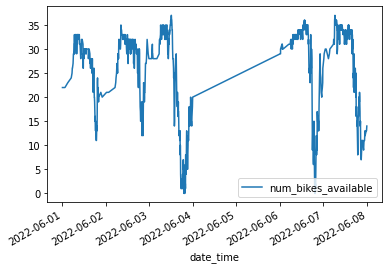

In [55]:
df_weekday_06 = df_weekday[(df_weekday['date_time']>='2022-06-01') & (df_weekday['date_time']<='2022-06-8') & 
             (df_weekday['station_name'].str.contains('Vesey Pl & River Terrace'))]
df_weekday_06['moving_avg'] = df_weekday_06['num_bikes_available'].rolling(2).mean()
df_weekday_06_327 = df_weekday_06.reset_index()
df_weekday_06_327[['num_bikes_available','date_time']].plot(x='date_time',y='num_bikes_available')

<AxesSubplot:xlabel='date_time'>

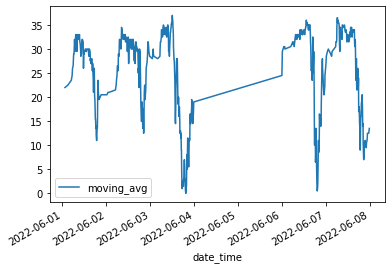

In [56]:
df_weekday_06_327[['moving_avg','date_time']].plot(x='date_time',y='moving_avg')